# Sales Analysis

### Libraries

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import time

import matplotlib.pyplot as plt
import matplotlib.animation as ani
import seaborn as sns
from plotnine import (
    ggplot, geom_line, geom_bar, geom_point, geom_text, geom_density, geom_histogram, geom_dotplot,
    geom_map, theme_void, geom_boxplot,
    aes, facet_wrap, labs, theme, xlab, ylab, coord_flip
)

import warnings
warnings.filterwarnings('ignore')

### Load Data

In [2]:
df = pd.read_csv(r'data/supermarket_sales - Sheet1.csv')

In [3]:
df.groupby('Payment').apply(lambda s: pd.Series({
    'transactions': s['Invoice ID'].count(),
    'avg_amt': round(s['cogs'].mean(), 2),
    'avg_qty': round(s['Quantity'].mean(), 2),
    'avg_tax': round(s['Tax 5%'].mean(), 2)
}))

transactions  avg_amt  avg_qty  avg_tax
Payment                                             
Cash                344.0   310.65     5.51    15.53
Credit card         311.0   308.58     5.54    15.43
Ewallet             345.0   303.64     5.48    15.18

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [5]:
total_gmv = df.Total.sum()
total_qty = df.Quantity.sum()

In [6]:
line1 = round(df.query('`Customer type`=="Member"').groupby('Product line').apply(lambda s: pd.Series({
    'GMV': s['Total'].sum()*100/total_gmv,
    'items_sold': s['Quantity'].sum()*100/total_qty,
    'avg_rating': s['Rating'].mean(),
    'frequency(30 days)': s['Invoice ID'].count()
})),2)
line1

GMV  items_sold  avg_rating  frequency(30 days)
Product line                                                            
Electronic accessories  7.59        7.79        6.95                78.0
Fashion accessories     8.15        7.97        6.95                86.0
Food and beverages      9.71        9.18        7.00                94.0
Health and beauty       8.00        7.77        7.08                73.0
Home and lifestyle      8.66        8.89        6.87                83.0
Sports and travel       8.74        8.95        6.82                87.0

## Gross Merchandise Value

In [7]:
time1 = df.groupby('Date')['Total'].sum().reset_index()
time1.columns = ['Date', 'Daily_GMV']
time1['month'] = time1.Date.apply(lambda x : x.split('/')[0])
time1.Date = pd.to_datetime(time1.Date)
time1.sort_values(by='Date', inplace=True)

gmv_list = []

for i in time1.month.unique():
    gmv_list.append(time1.query('month==@i').Daily_GMV.cumsum().to_list())

In [8]:
time1['GMV'] = gmv_list[0]+gmv_list[1]+gmv_list[2]

#### January 2019

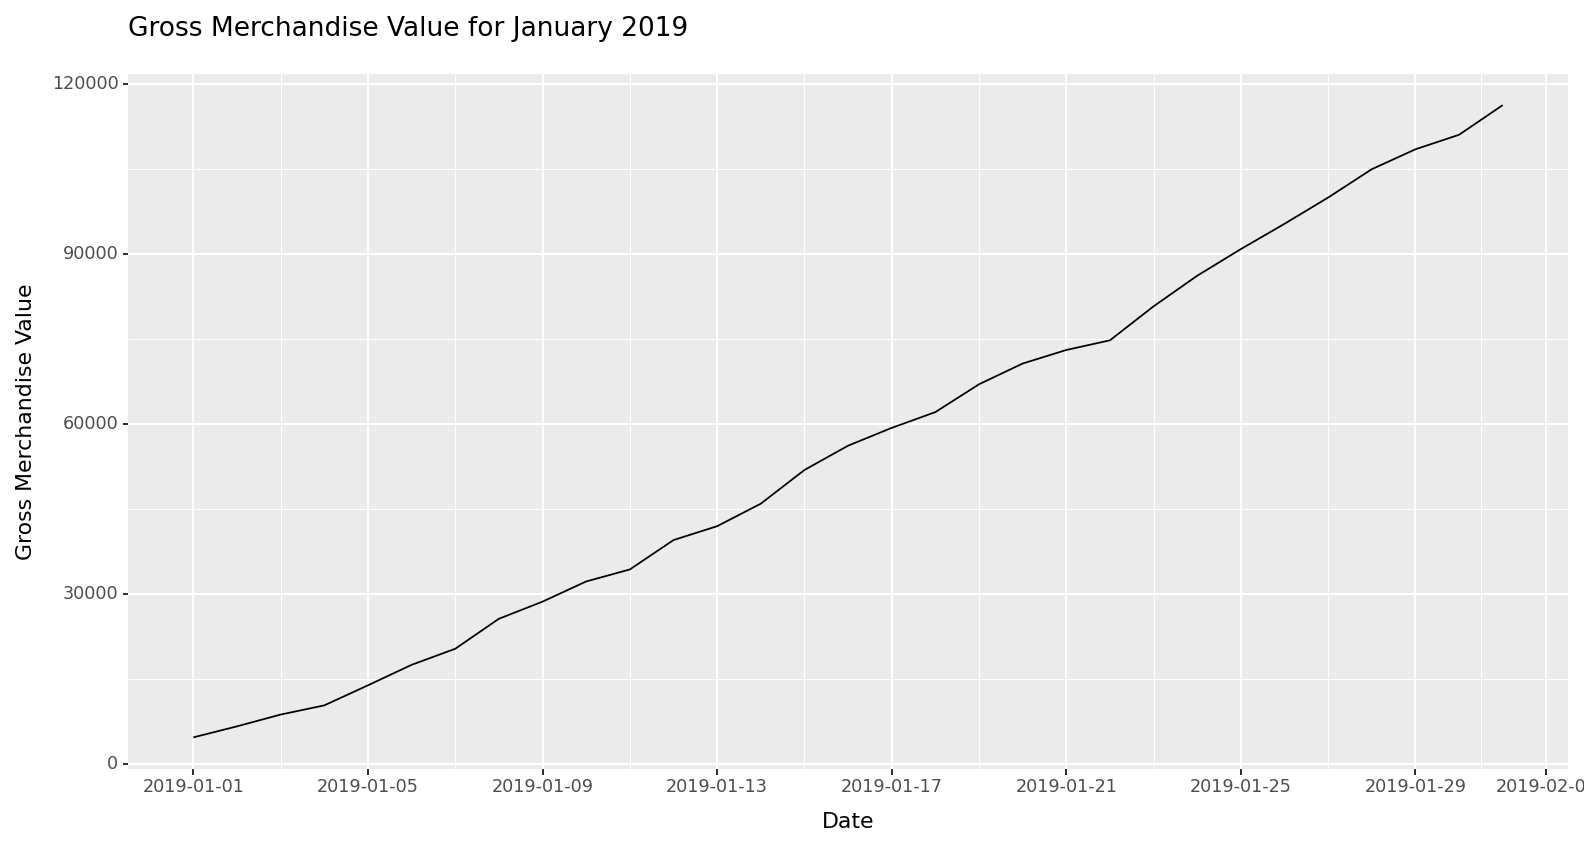

<Figure Size: (792 x 432)>

In [9]:
(
    ggplot(data=time1.query('month=="1"')) 
    + geom_line(aes(x='Date', y='GMV'))
    + labs(title='Gross Merchandise Value for January 2019')
    + ylab('Gross Merchandise Value')
    + theme(figure_size=(11,6))
)

#### February 2019

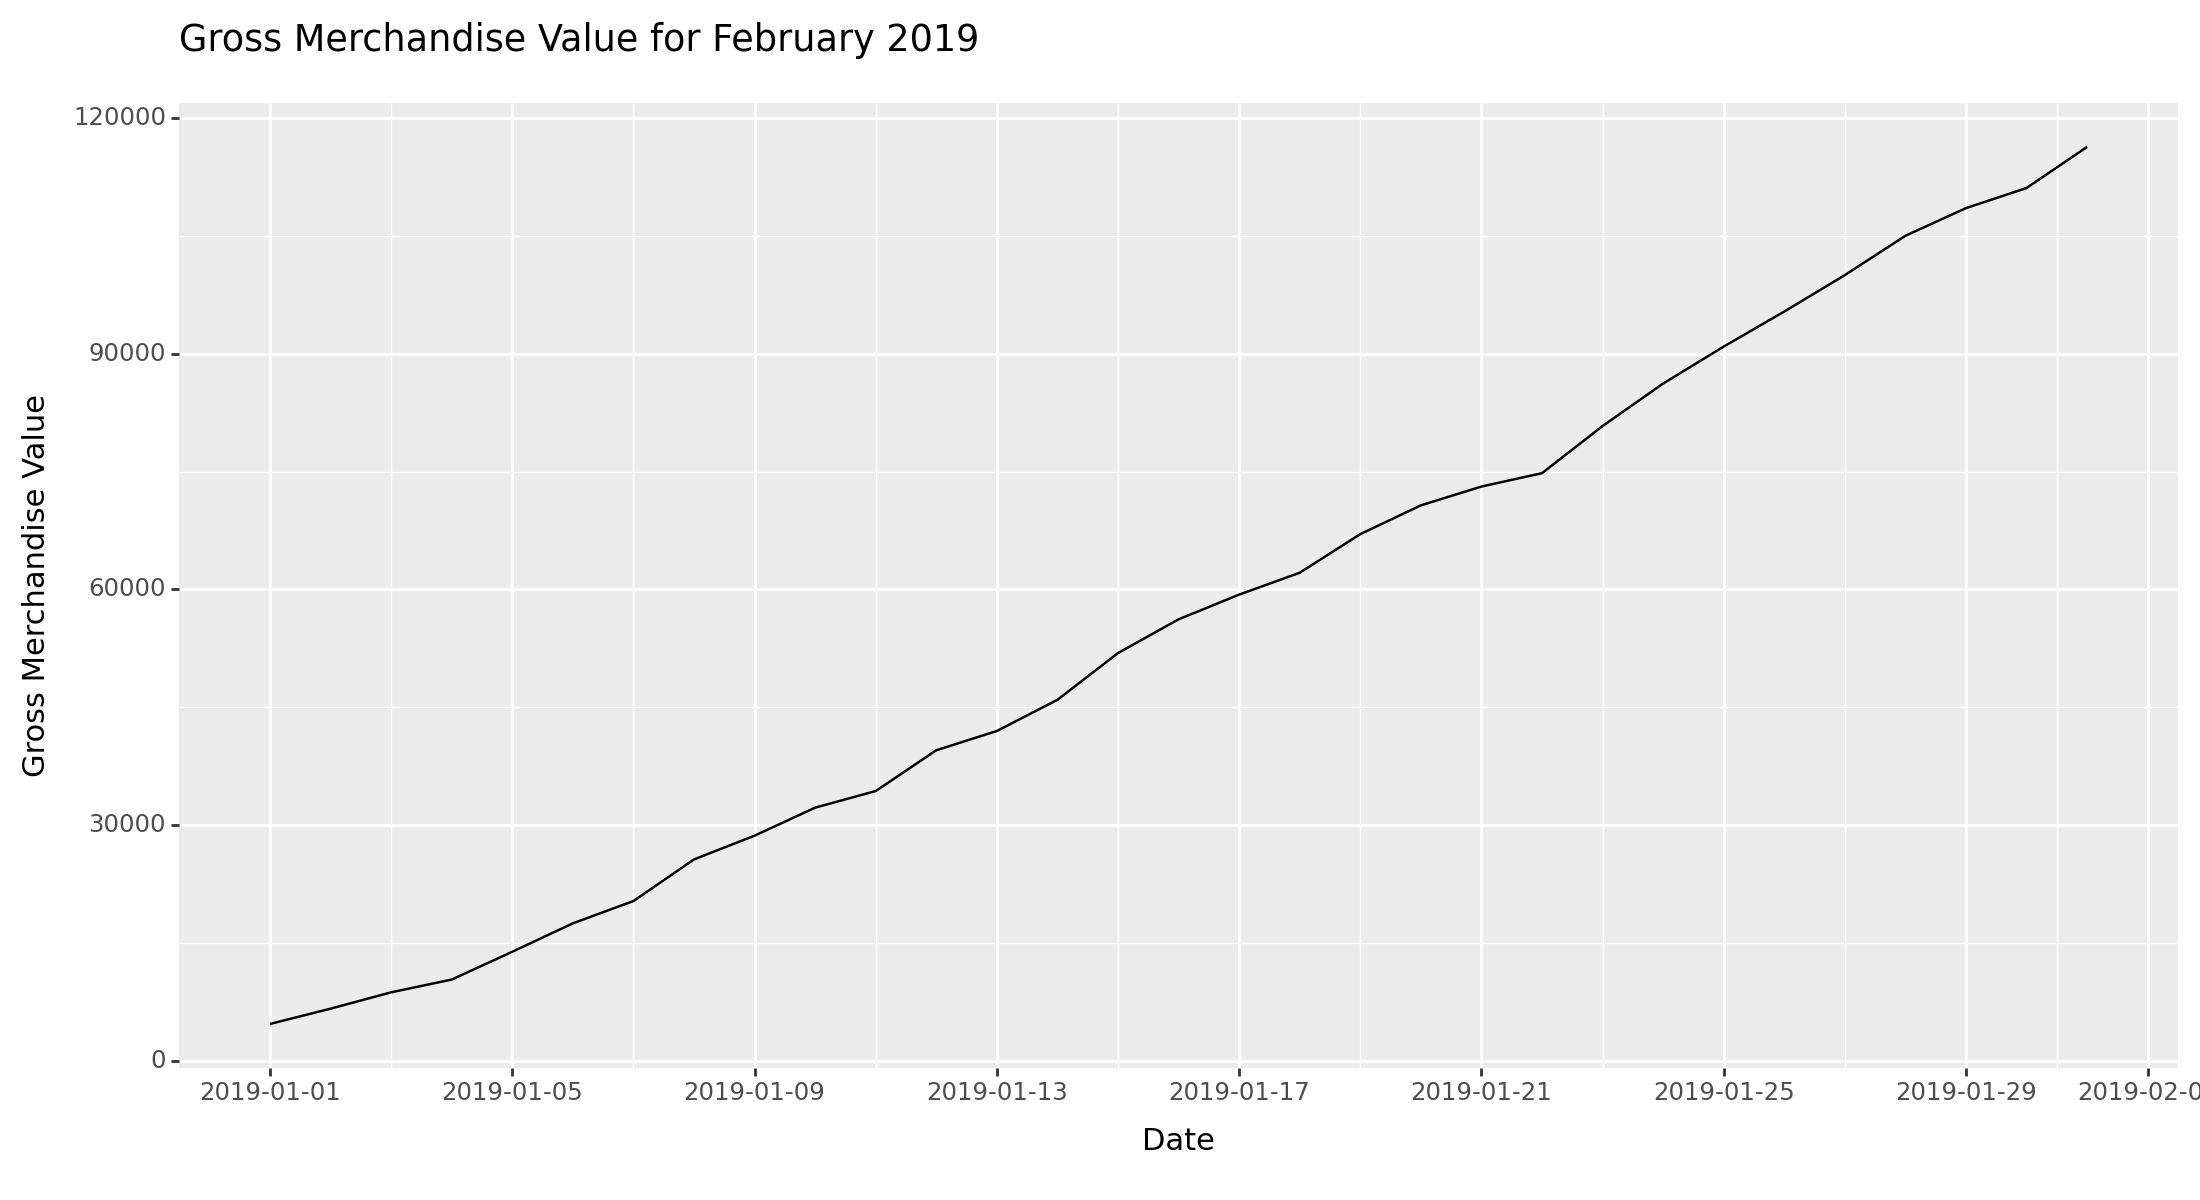

<Figure Size: (1100 x 600)>

In [10]:
(
    ggplot(data=time1.query('month=="1"')) 
    + geom_line(aes(x='Date', y='GMV'))
    + labs(title='Gross Merchandise Value for February 2019')
    + ylab('Gross Merchandise Value')
    + theme(figure_size=(11,6))
)

#### March 2019

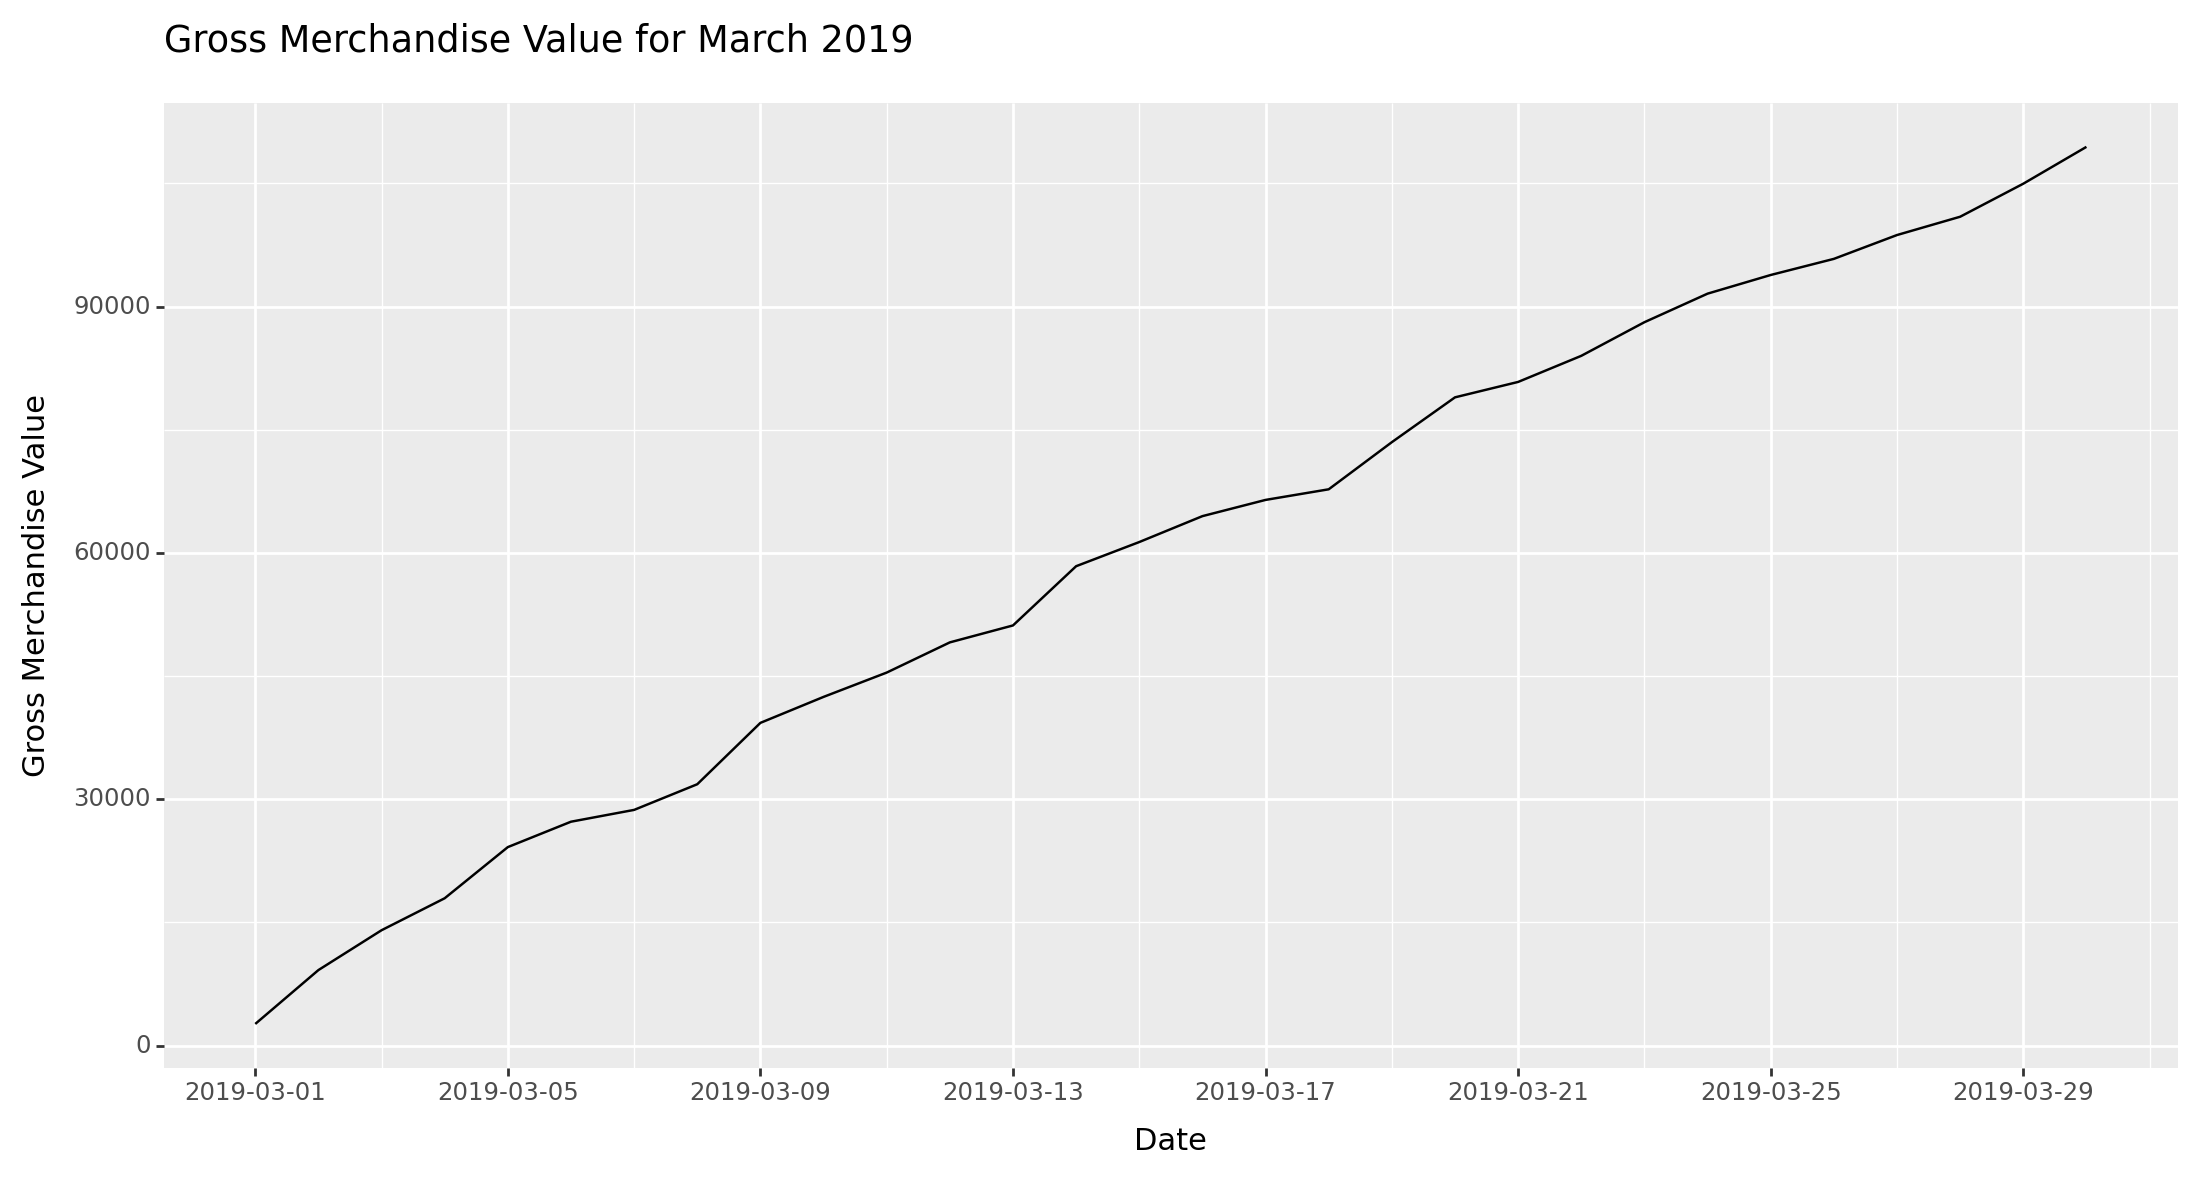

<Figure Size: (1100 x 600)>

In [11]:
(
    ggplot(data=time1.query('month=="3"')) 
    + geom_line(aes(x='Date', y='GMV'))
    + labs(title='Gross Merchandise Value for March 2019')
    + ylab('Gross Merchandise Value')
    + theme(figure_size=(11,6))
)

### Growth Rate

In [12]:
time1['Growth%'] = time1.Daily_GMV.pct_change()*100

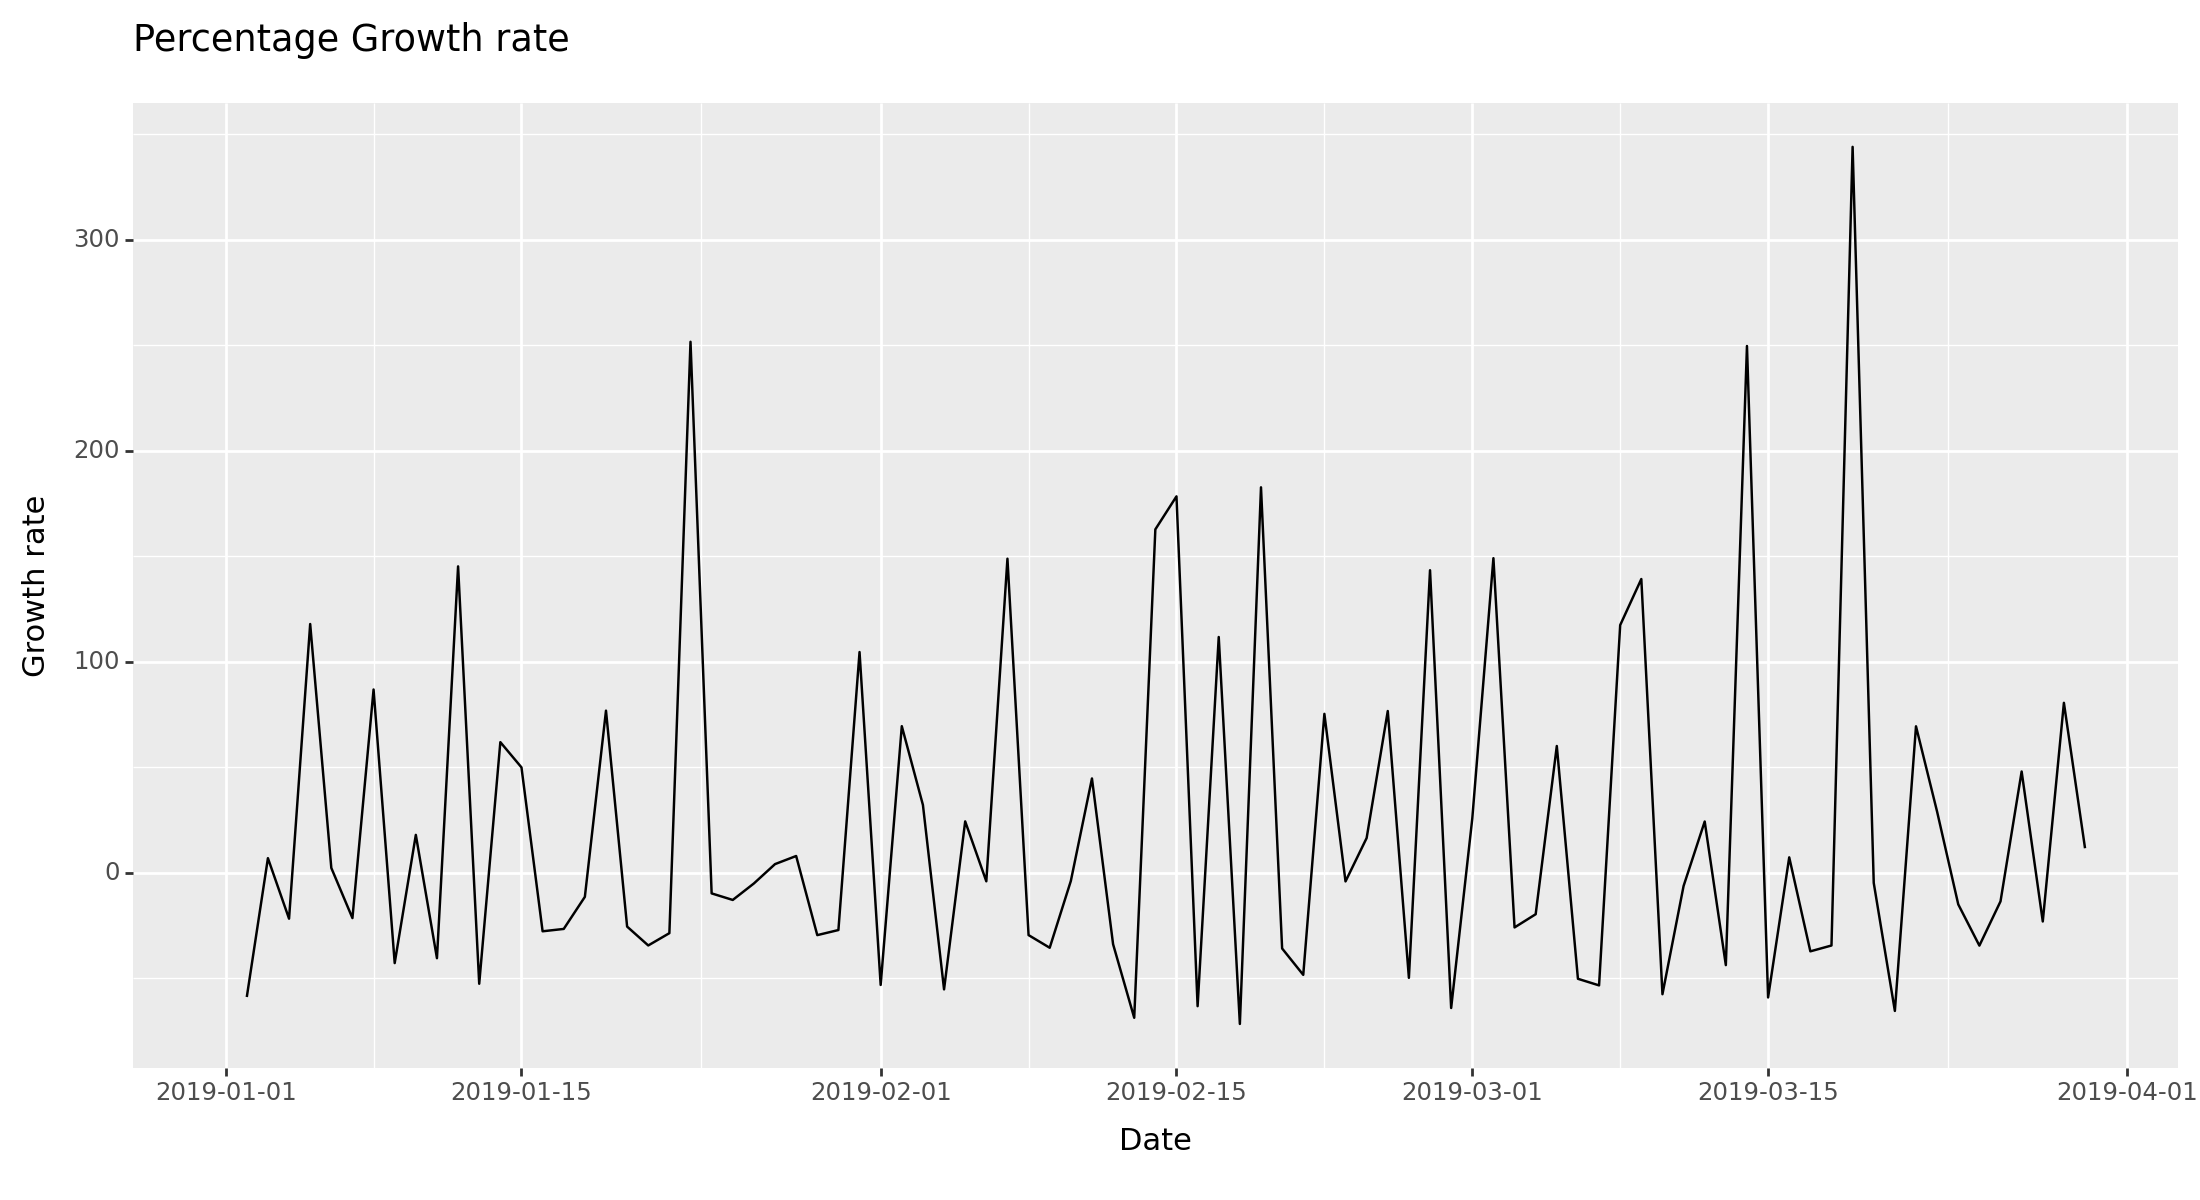

<Figure Size: (1100 x 600)>

In [13]:
(
    ggplot(data=time1) 
    + geom_line(aes(x='Date', y='Growth%'))
    + labs(title='Percentage Growth rate')
    + ylab('Growth rate')
    + theme(figure_size=(11,6))
)

### GMV : Product line

In [14]:
prod_gmv = df['Total'].sum()
bar0 = round(df.groupby('Product line').apply(lambda s : pd.Series({
    'GMV': s['Total'].sum(),
    'GMV%': s['Total'].sum()*100/prod_gmv
})), 2).reset_index()

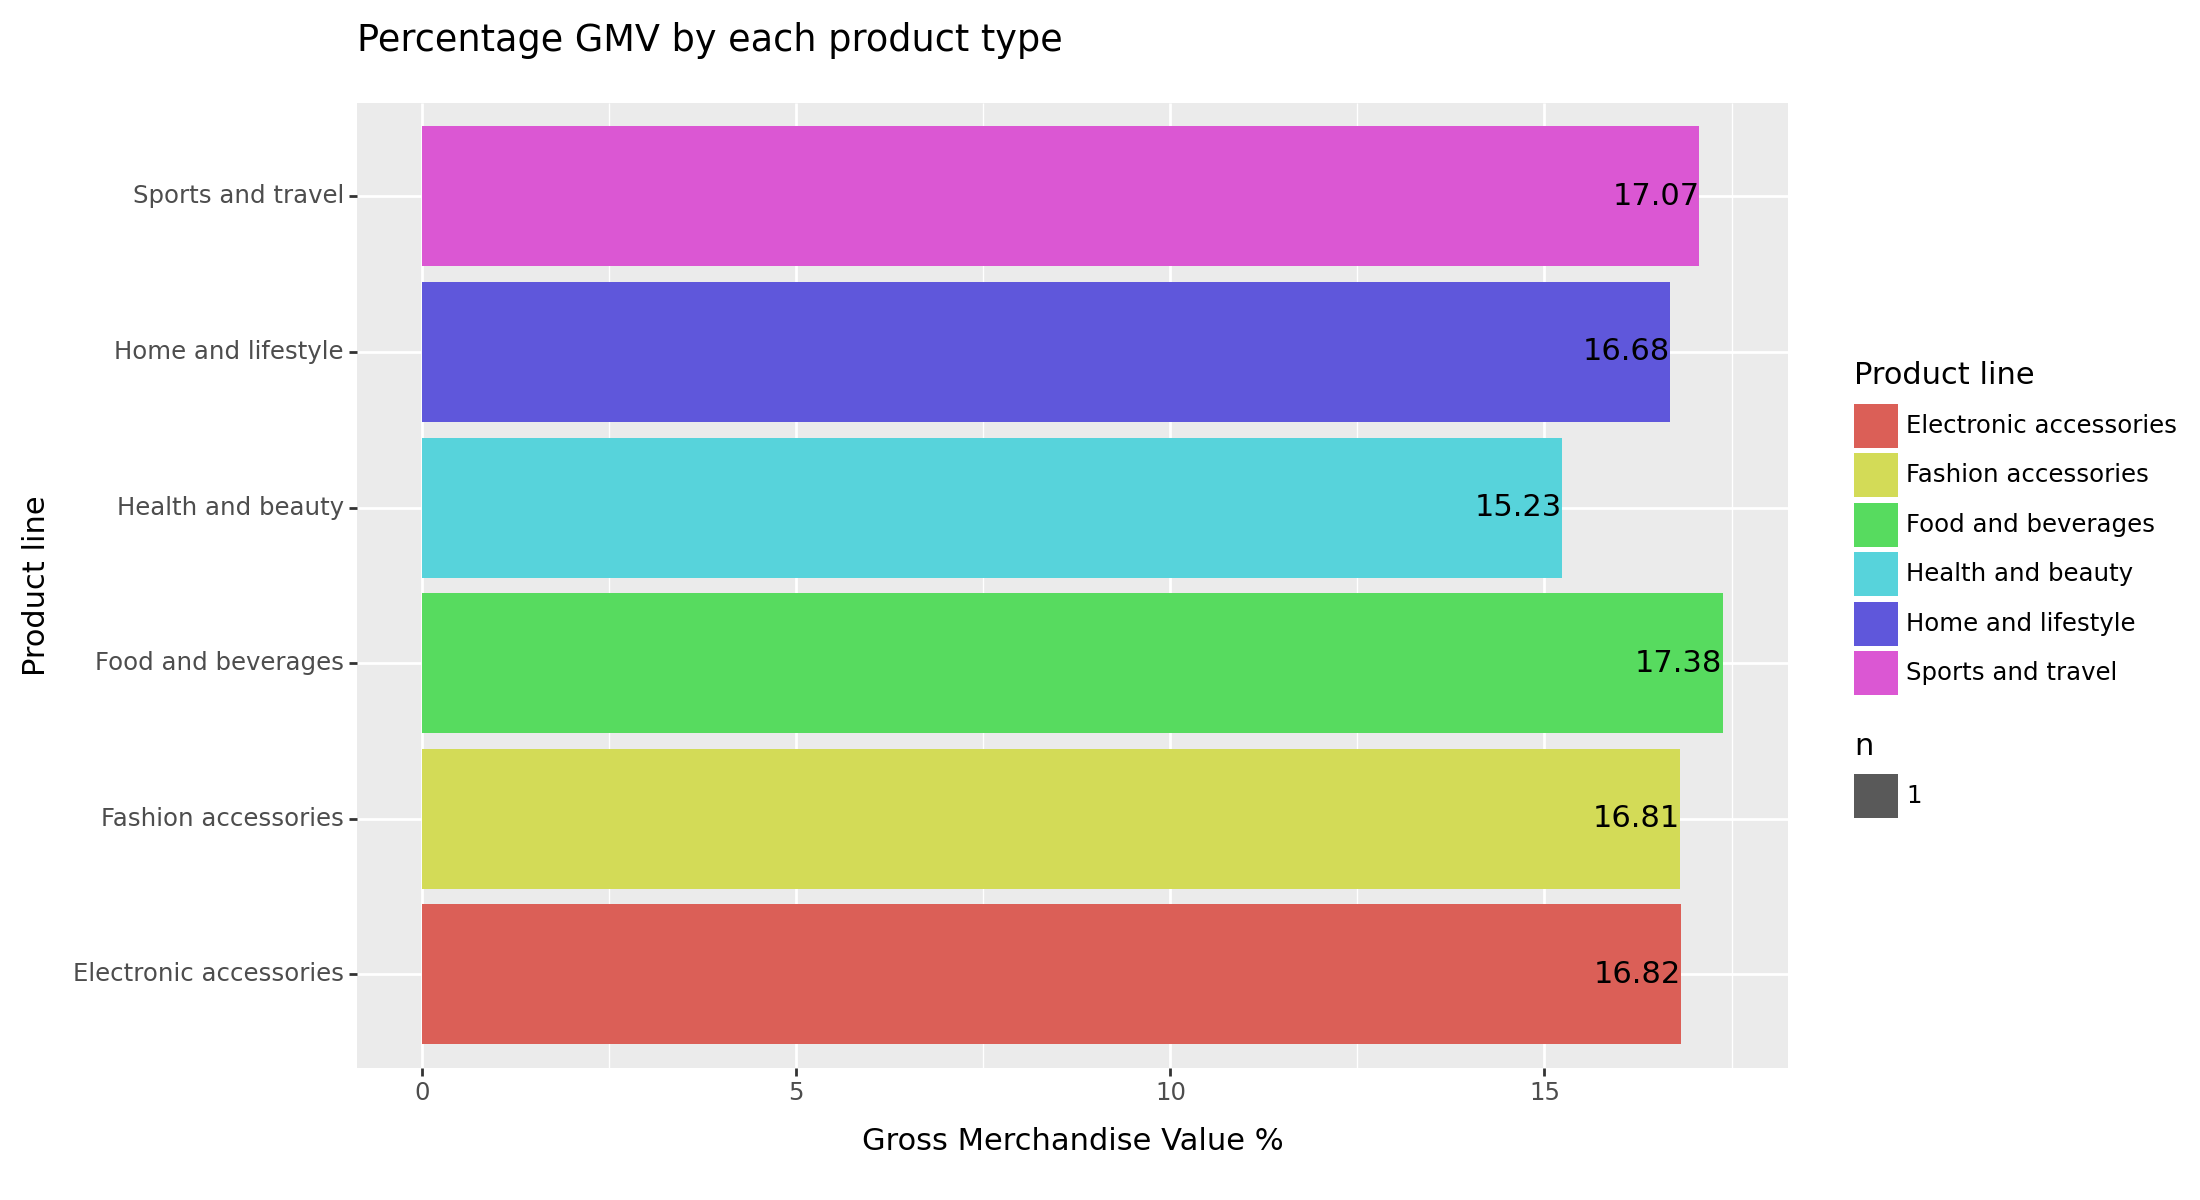

<Figure Size: (1100 x 600)>

In [15]:
(
    ggplot(data=bar0) 
    + geom_bar(aes(x='Product line', y='GMV%', fill='Product line'), stat='sum')
    + geom_text(aes(x='Product line', y='GMV%', label='GMV%'), va='center',ha='right')
    + coord_flip()
    + labs(title='Percentage GMV by each product type')
    + ylab('Gross Merchandise Value %')
    + theme(figure_size=(11,6))
)

#### Subdivision : Customer type

In [16]:
bar1 = round(df.groupby(['Product line', 'Customer type']).apply(lambda s : pd.Series({
    'GMV': s['Total'].sum(),
    'GMV%': s['Total'].sum()*100/prod_gmv
})), 2).reset_index()

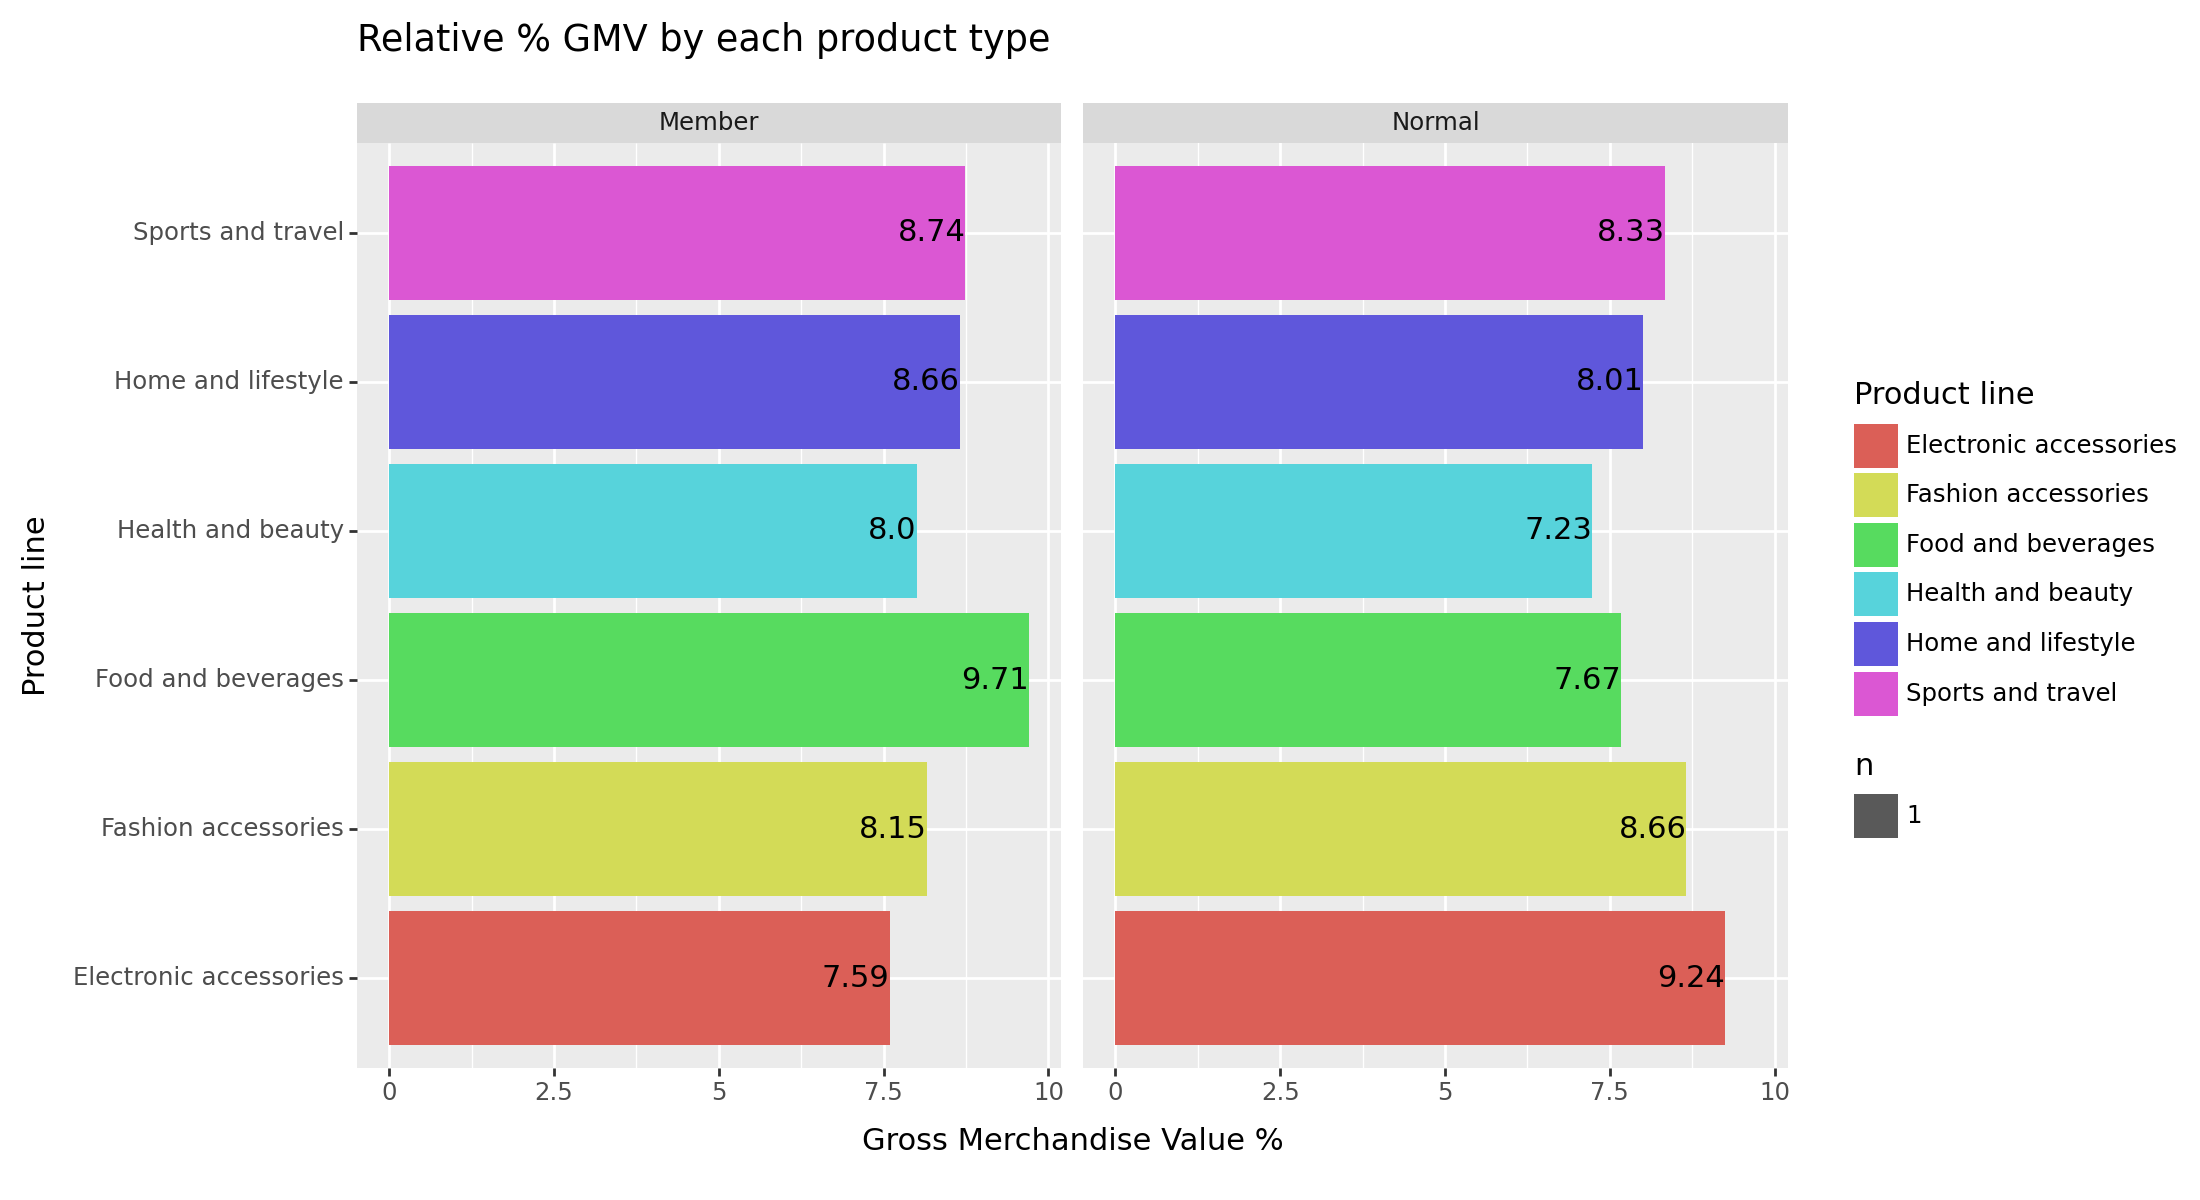

<Figure Size: (1100 x 600)>

In [17]:
(
    ggplot(data=bar1) 
    + geom_bar(aes(x='Product line', y='GMV%', fill='Product line'), stat='sum')
    + geom_text(aes(x='Product line', y='GMV%', label='GMV%'), va='center',ha='right')
    + coord_flip()
    + facet_wrap('Customer type')
    + labs(title='Relative % GMV by each product type')
    + ylab('Gross Merchandise Value %')
    + theme(figure_size=(11,6))
)

#### Subdivision : Gender

In [18]:
bar2 = round(df.groupby(['Product line', 'Gender']).apply(lambda s : pd.Series({
    'GMV': s['Total'].sum(),
    'GMV%': s['Total'].sum()*100/prod_gmv
})), 2).reset_index()

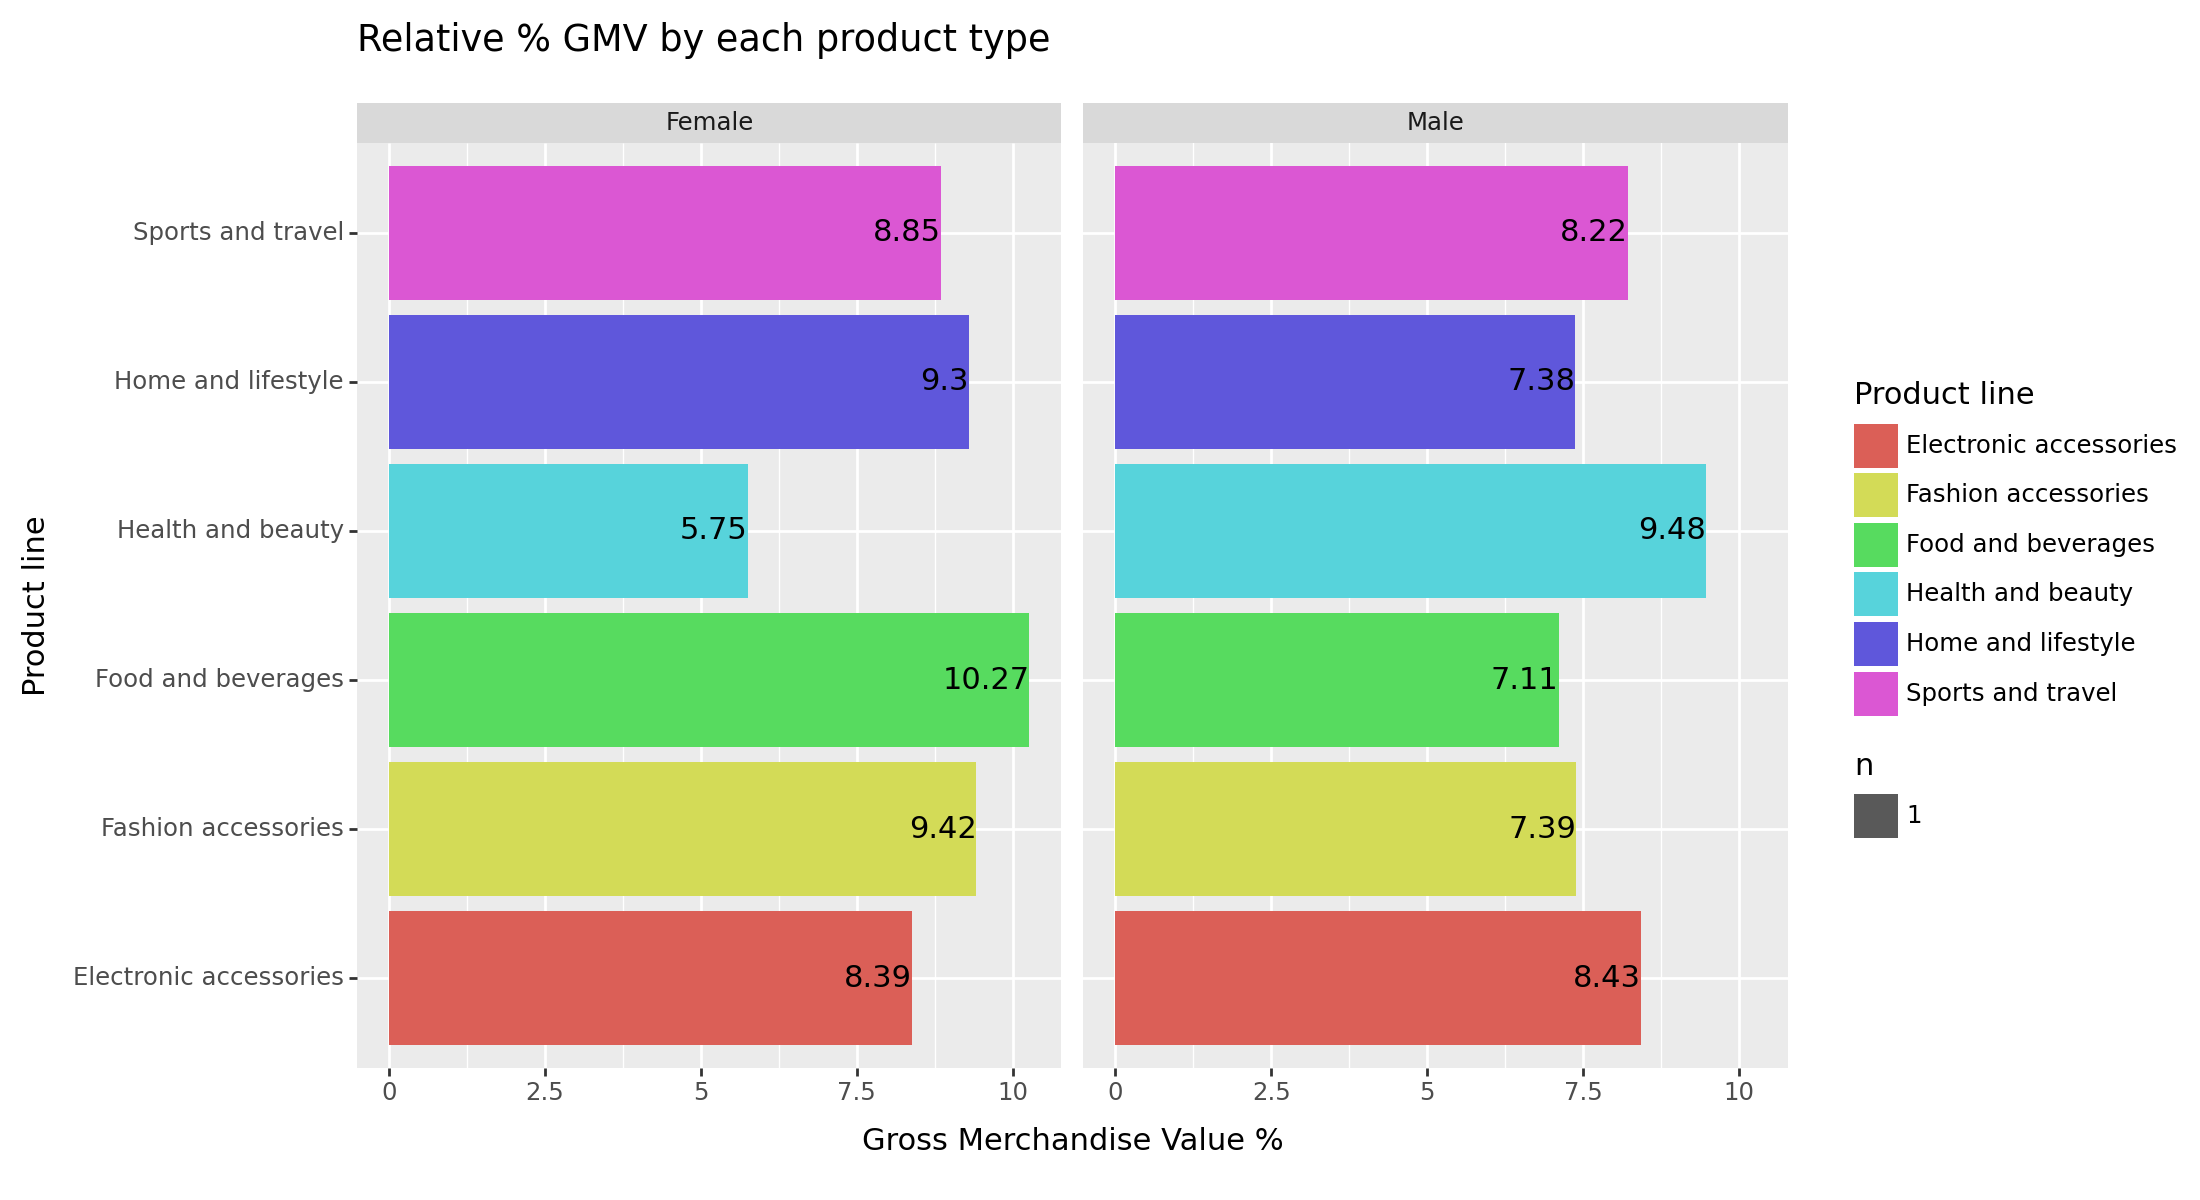

<Figure Size: (1100 x 600)>

In [19]:
(
    ggplot(data=bar2) 
    + geom_bar(aes(x='Product line', y='GMV%', fill='Product line'), stat='sum')
    + geom_text(aes(x='Product line', y='GMV%', label='GMV%'), va='center',ha='right')
    + coord_flip()
    + facet_wrap('Gender')
    + labs(title='Relative % GMV by each product type')
    + ylab('Gross Merchandise Value %')
    + theme(figure_size=(11,6))
)

### GMV : Citywise

In [20]:
bar3 = round(df.groupby(['City']).apply(lambda s : pd.Series({
    'GMV': s['Total'].sum(),
    'GMV%': s['Total'].sum()*100/prod_gmv
})), 2).reset_index()

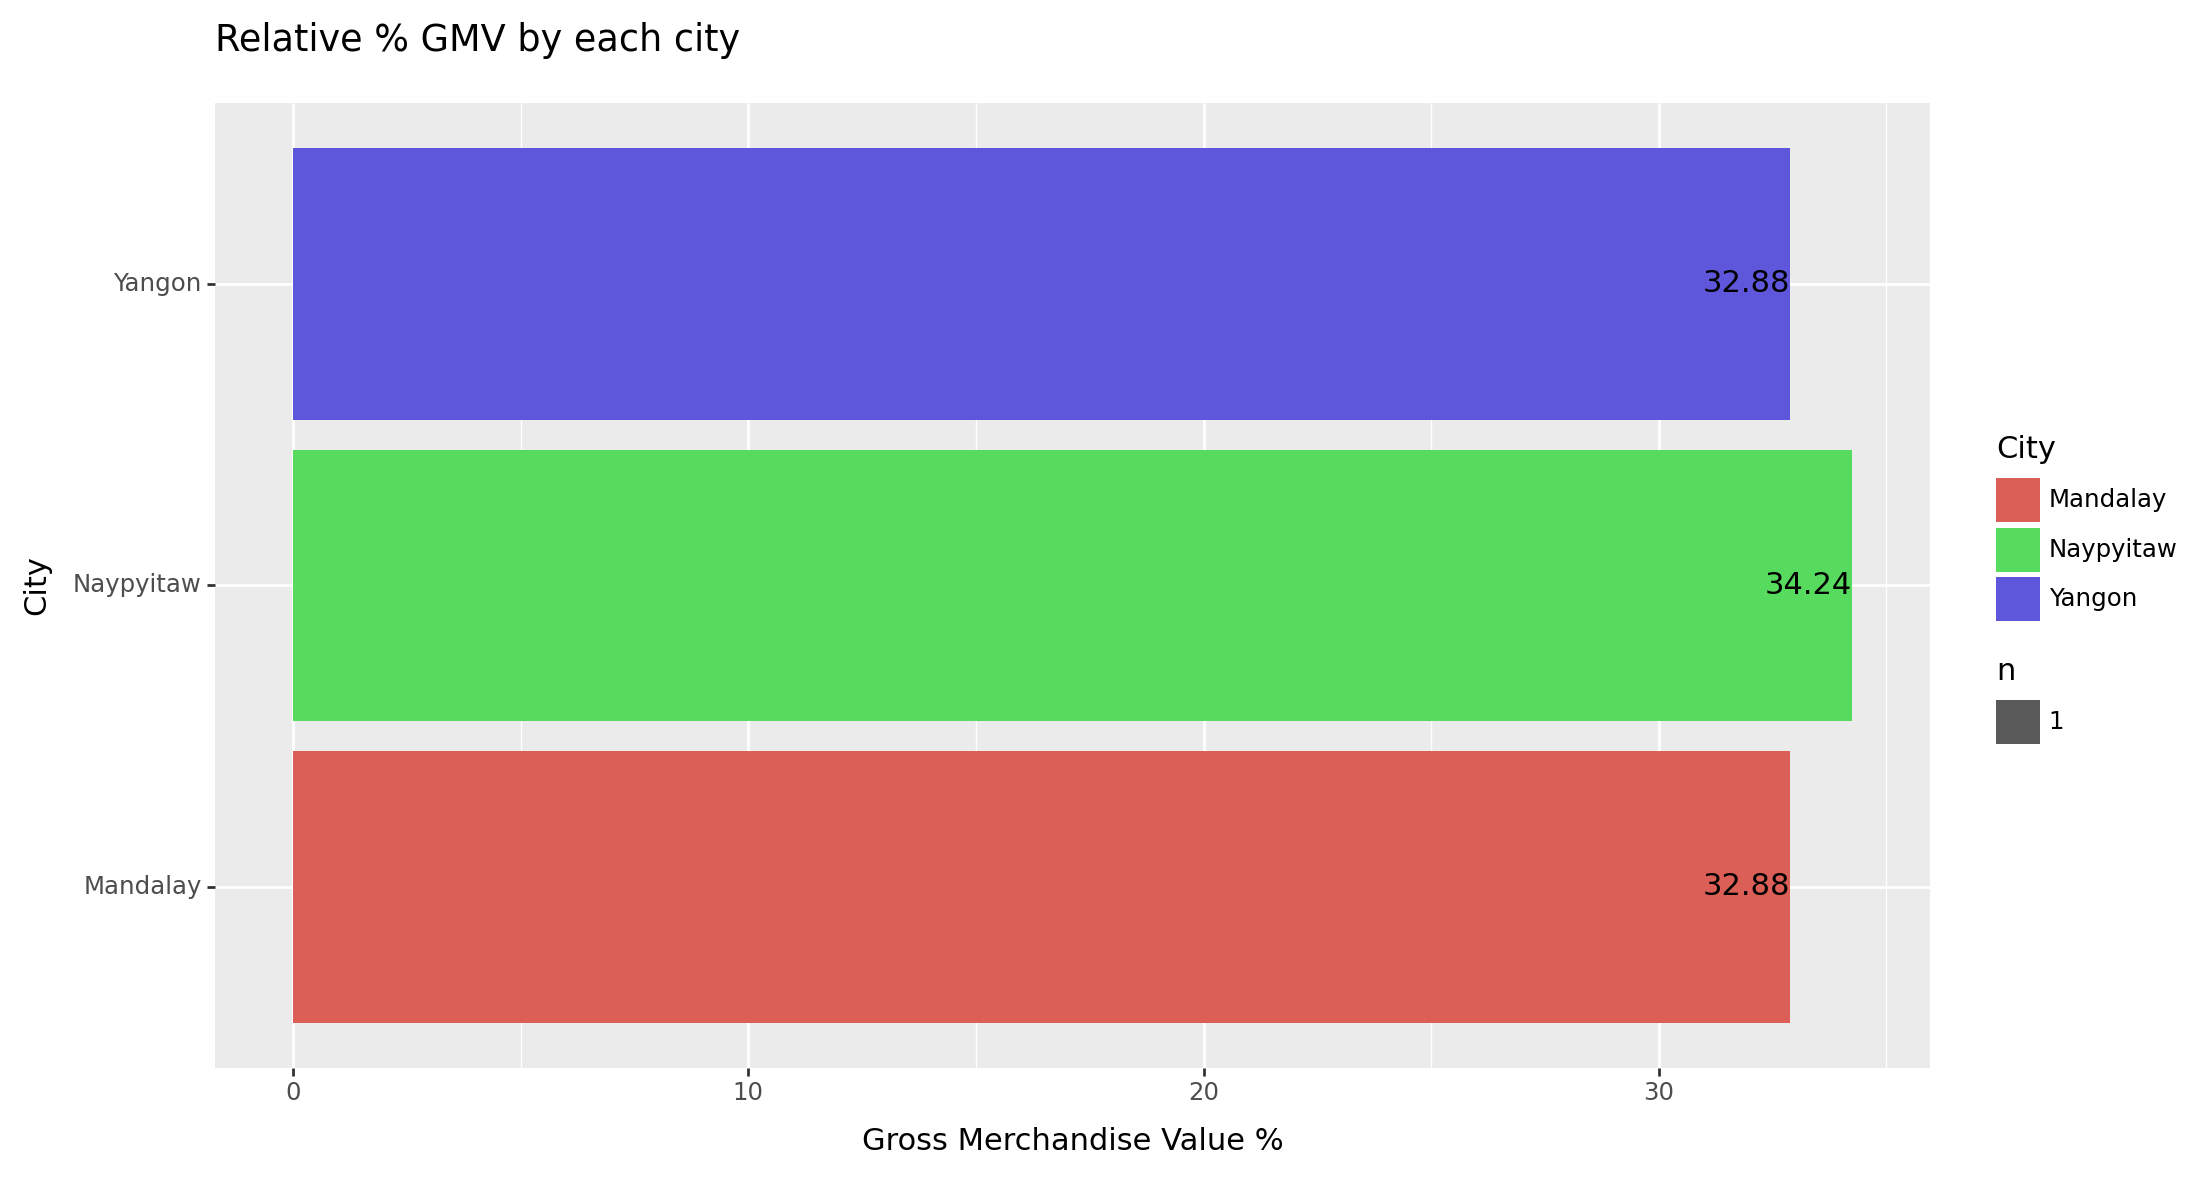

<Figure Size: (1100 x 600)>

In [21]:
(
    ggplot(data=bar3) 
    + geom_bar(aes(x='City', y='GMV%', fill='City'), stat='sum')
    + geom_text(aes(x='City', y='GMV%', label='GMV%'), va='center',ha='right')
    + coord_flip()
    + labs(title='Relative % GMV by each city')
    + ylab('Gross Merchandise Value %')
    + theme(figure_size=(11,6))
)

### GMV : Paymentwise

In [22]:
bar4 = round(df.groupby('Payment').apply(lambda s : pd.Series({
    'GMV': s['Total'].sum(),
    'GMV%': s['Total'].sum()*100/prod_gmv
})), 2).reset_index()

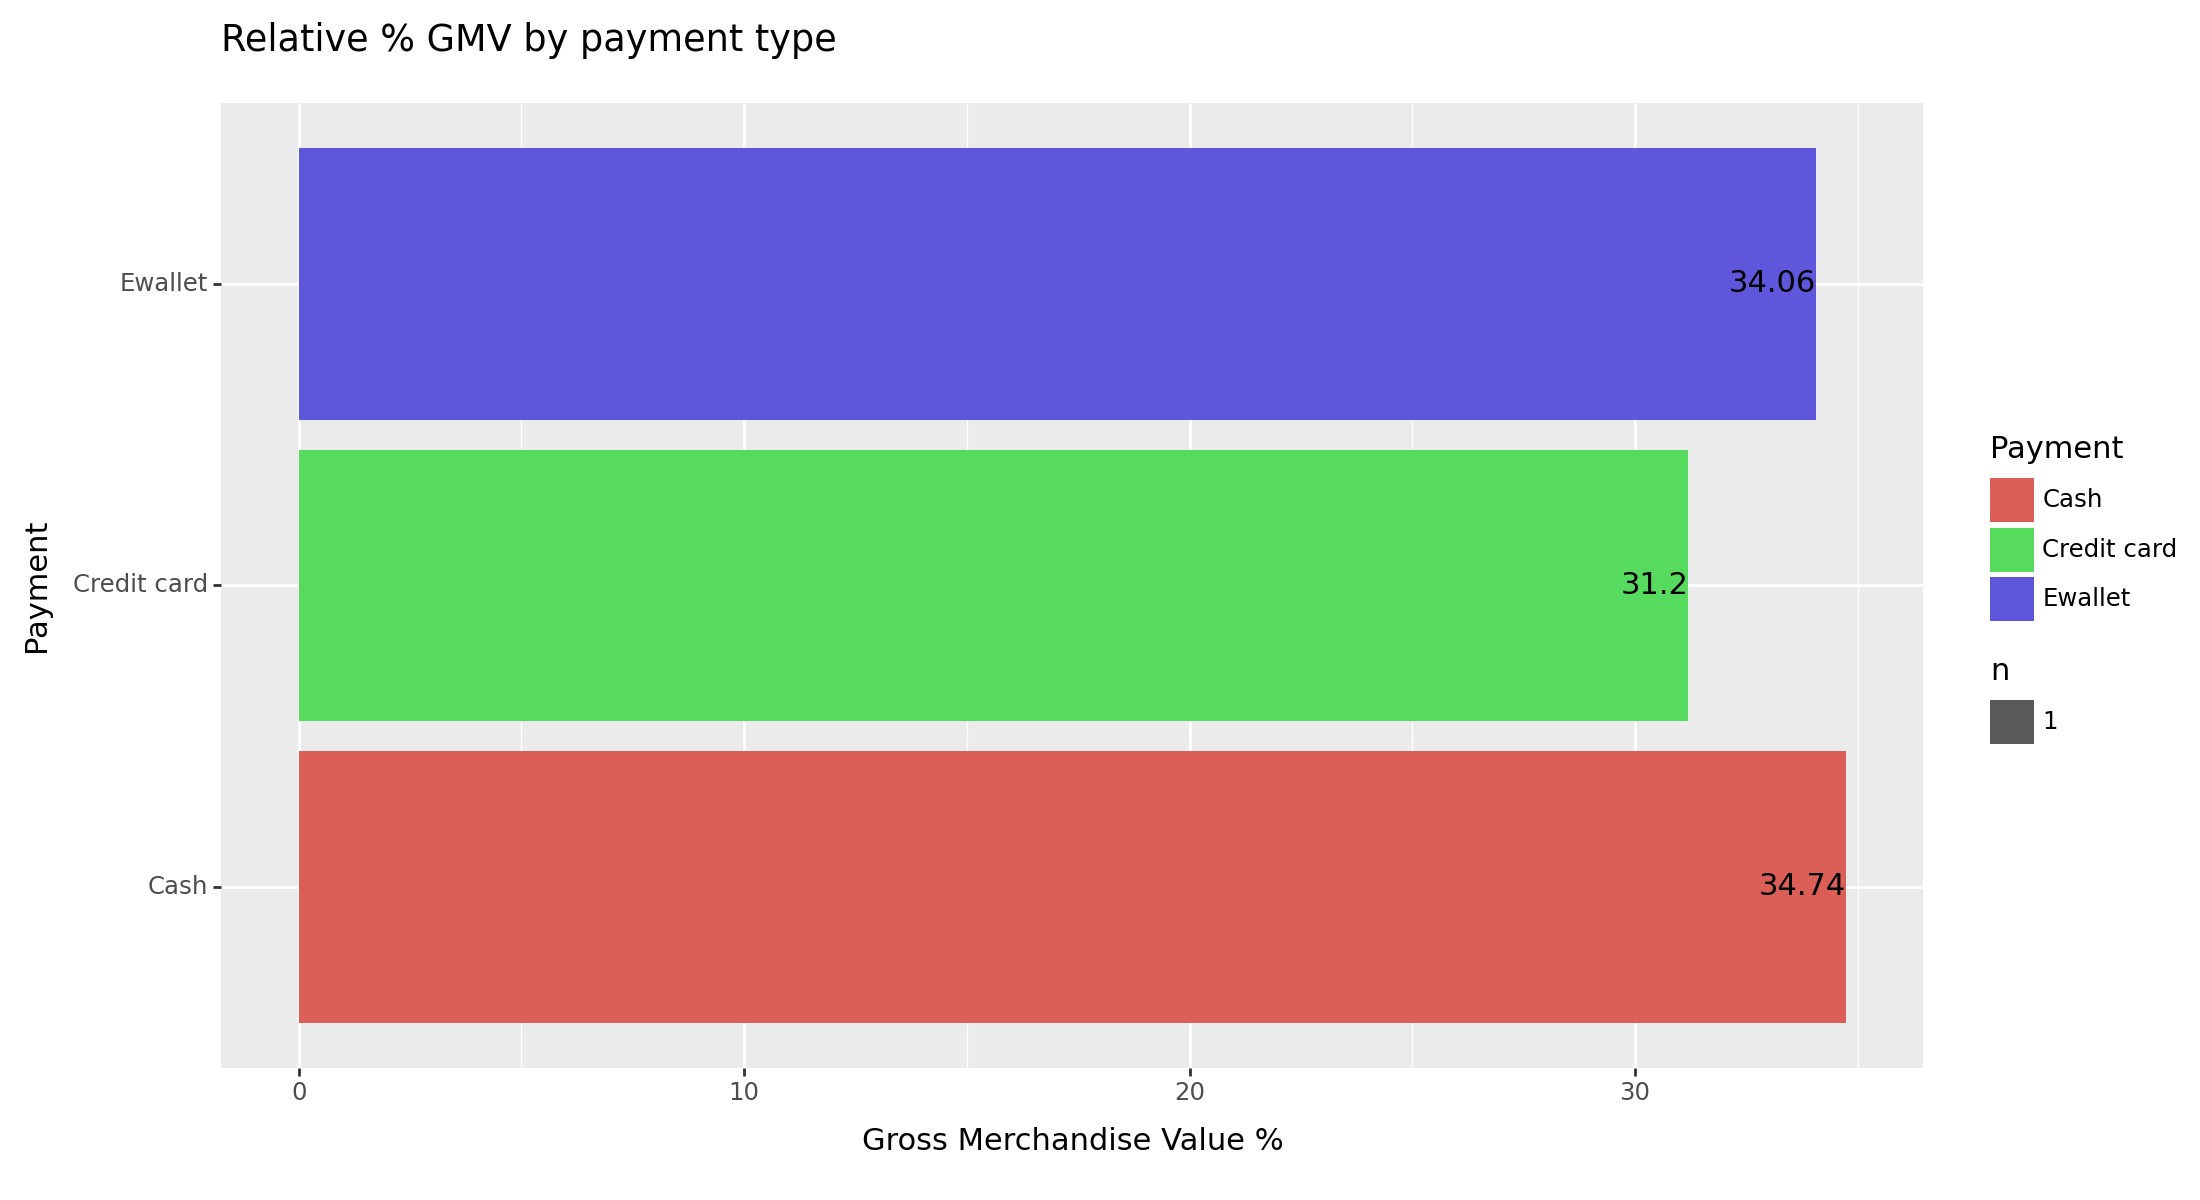

<Figure Size: (1100 x 600)>

In [23]:
(
    ggplot(data=bar4) 
    + geom_bar(aes(x='Payment', y='GMV%', fill='Payment'), stat='sum')
    + geom_text(aes(x='Payment', y='GMV%', label='GMV%'), va='center',ha='right')
    + coord_flip()
    + labs(title='Relative % GMV by payment type')
    + ylab('Gross Merchandise Value %')
    + theme(figure_size=(11,6))
)

#### GMV : Citywise : Paymentwise

In [24]:
bar5 = round(df.groupby(['City', 'Payment']).apply(lambda s : pd.Series({
    'GMV': s['Total'].sum(),
    'GMV%': s['Total'].sum()*100/prod_gmv
})), 2).reset_index()

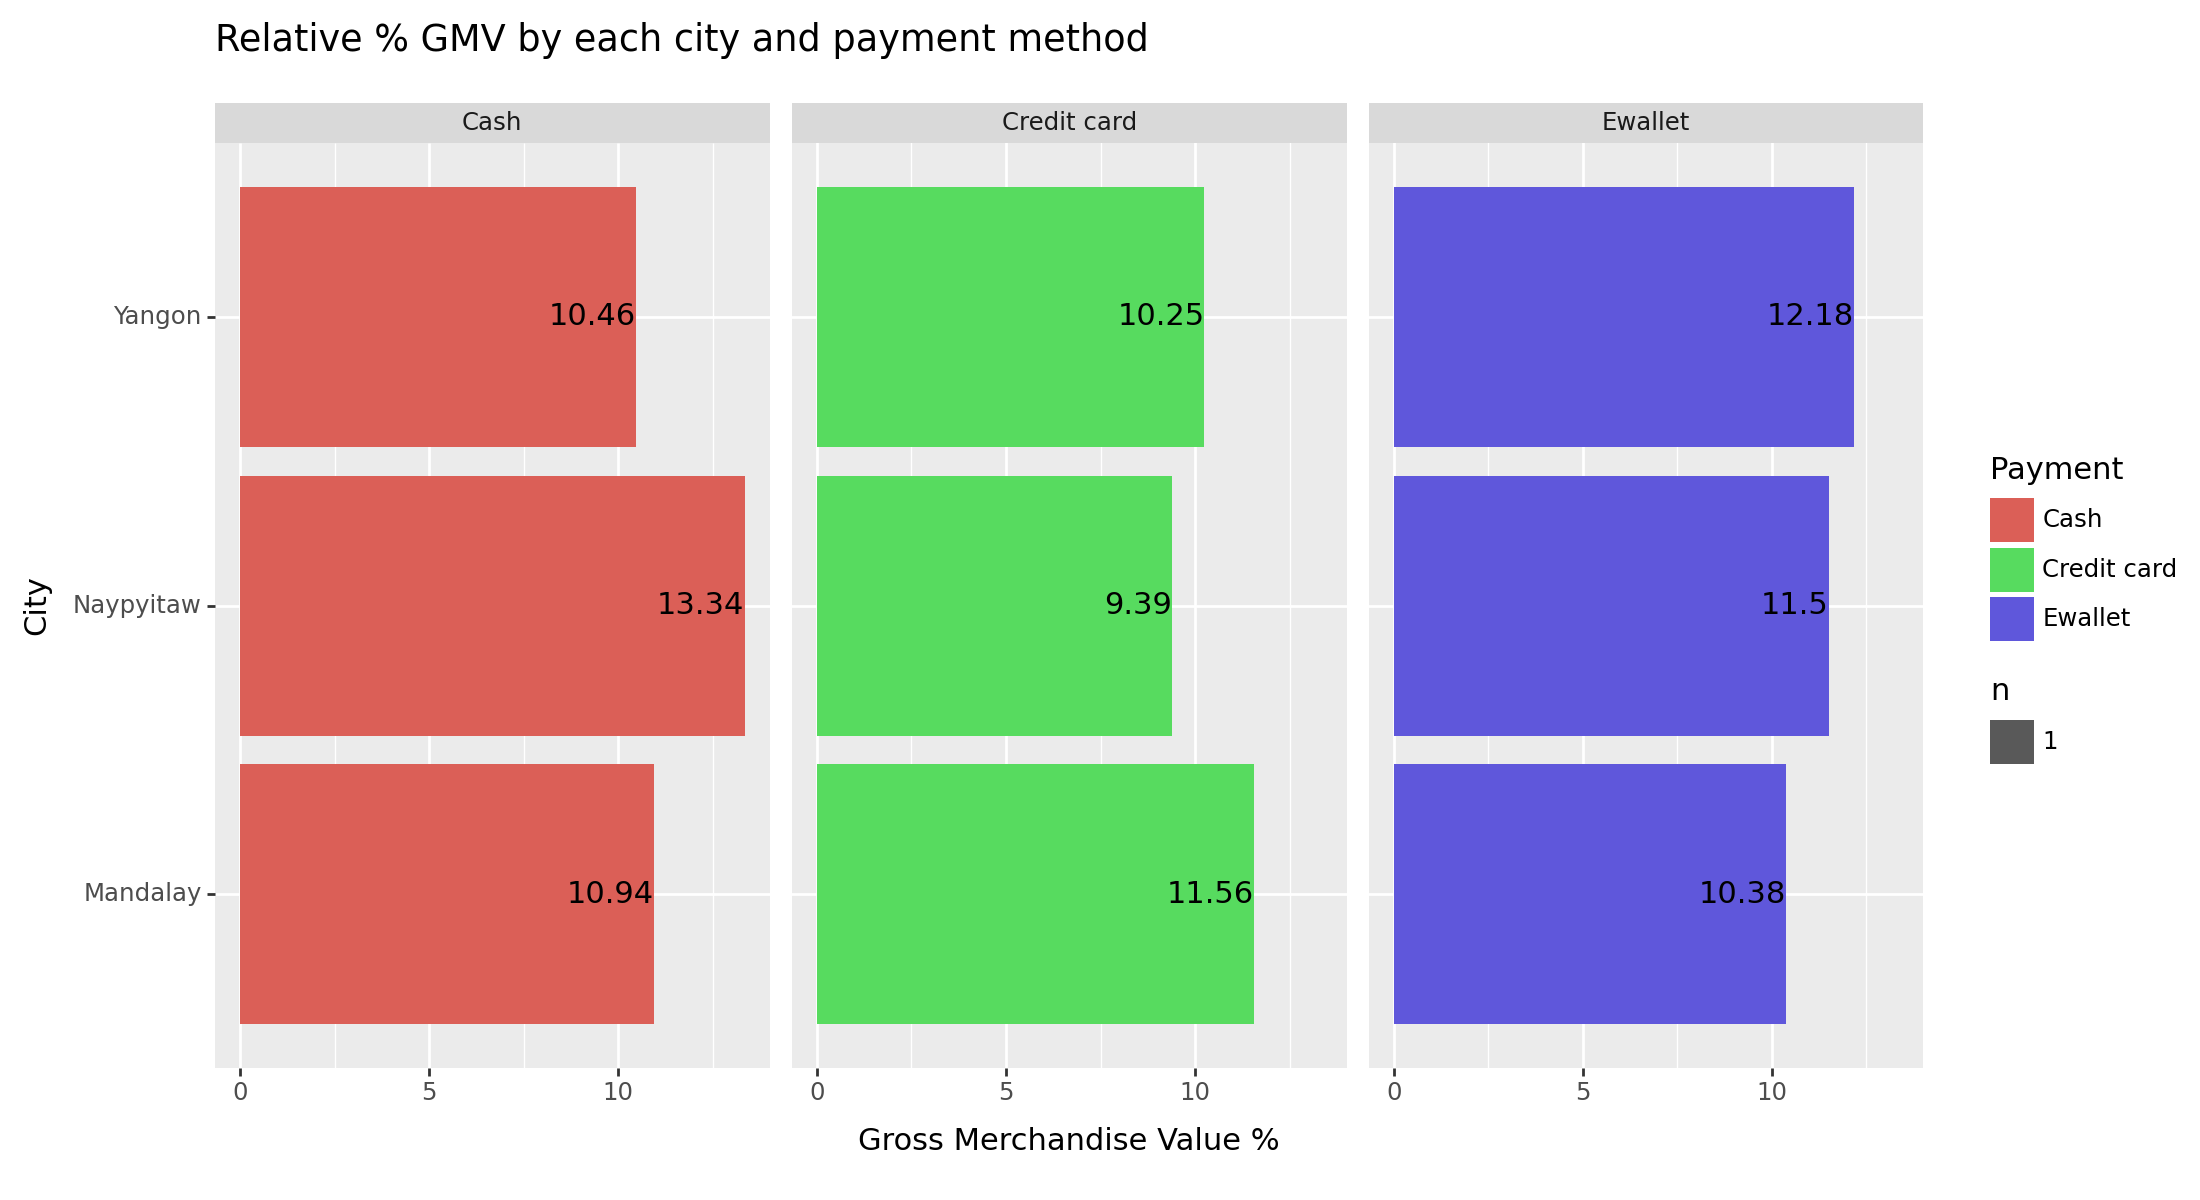

<Figure Size: (1100 x 600)>

In [25]:
(
    ggplot(data=bar5) 
    + geom_bar(aes(x='City', y='GMV%', fill='Payment'), stat='sum')
    + geom_text(aes(x='City', y='GMV%', label='GMV%'), va='center',ha='right')
    + coord_flip()
    + facet_wrap('Payment')
    + labs(title='Relative % GMV by each city and payment method')
    + ylab('Gross Merchandise Value %')
    + theme(figure_size=(11,6))
)

## GMV Distribution

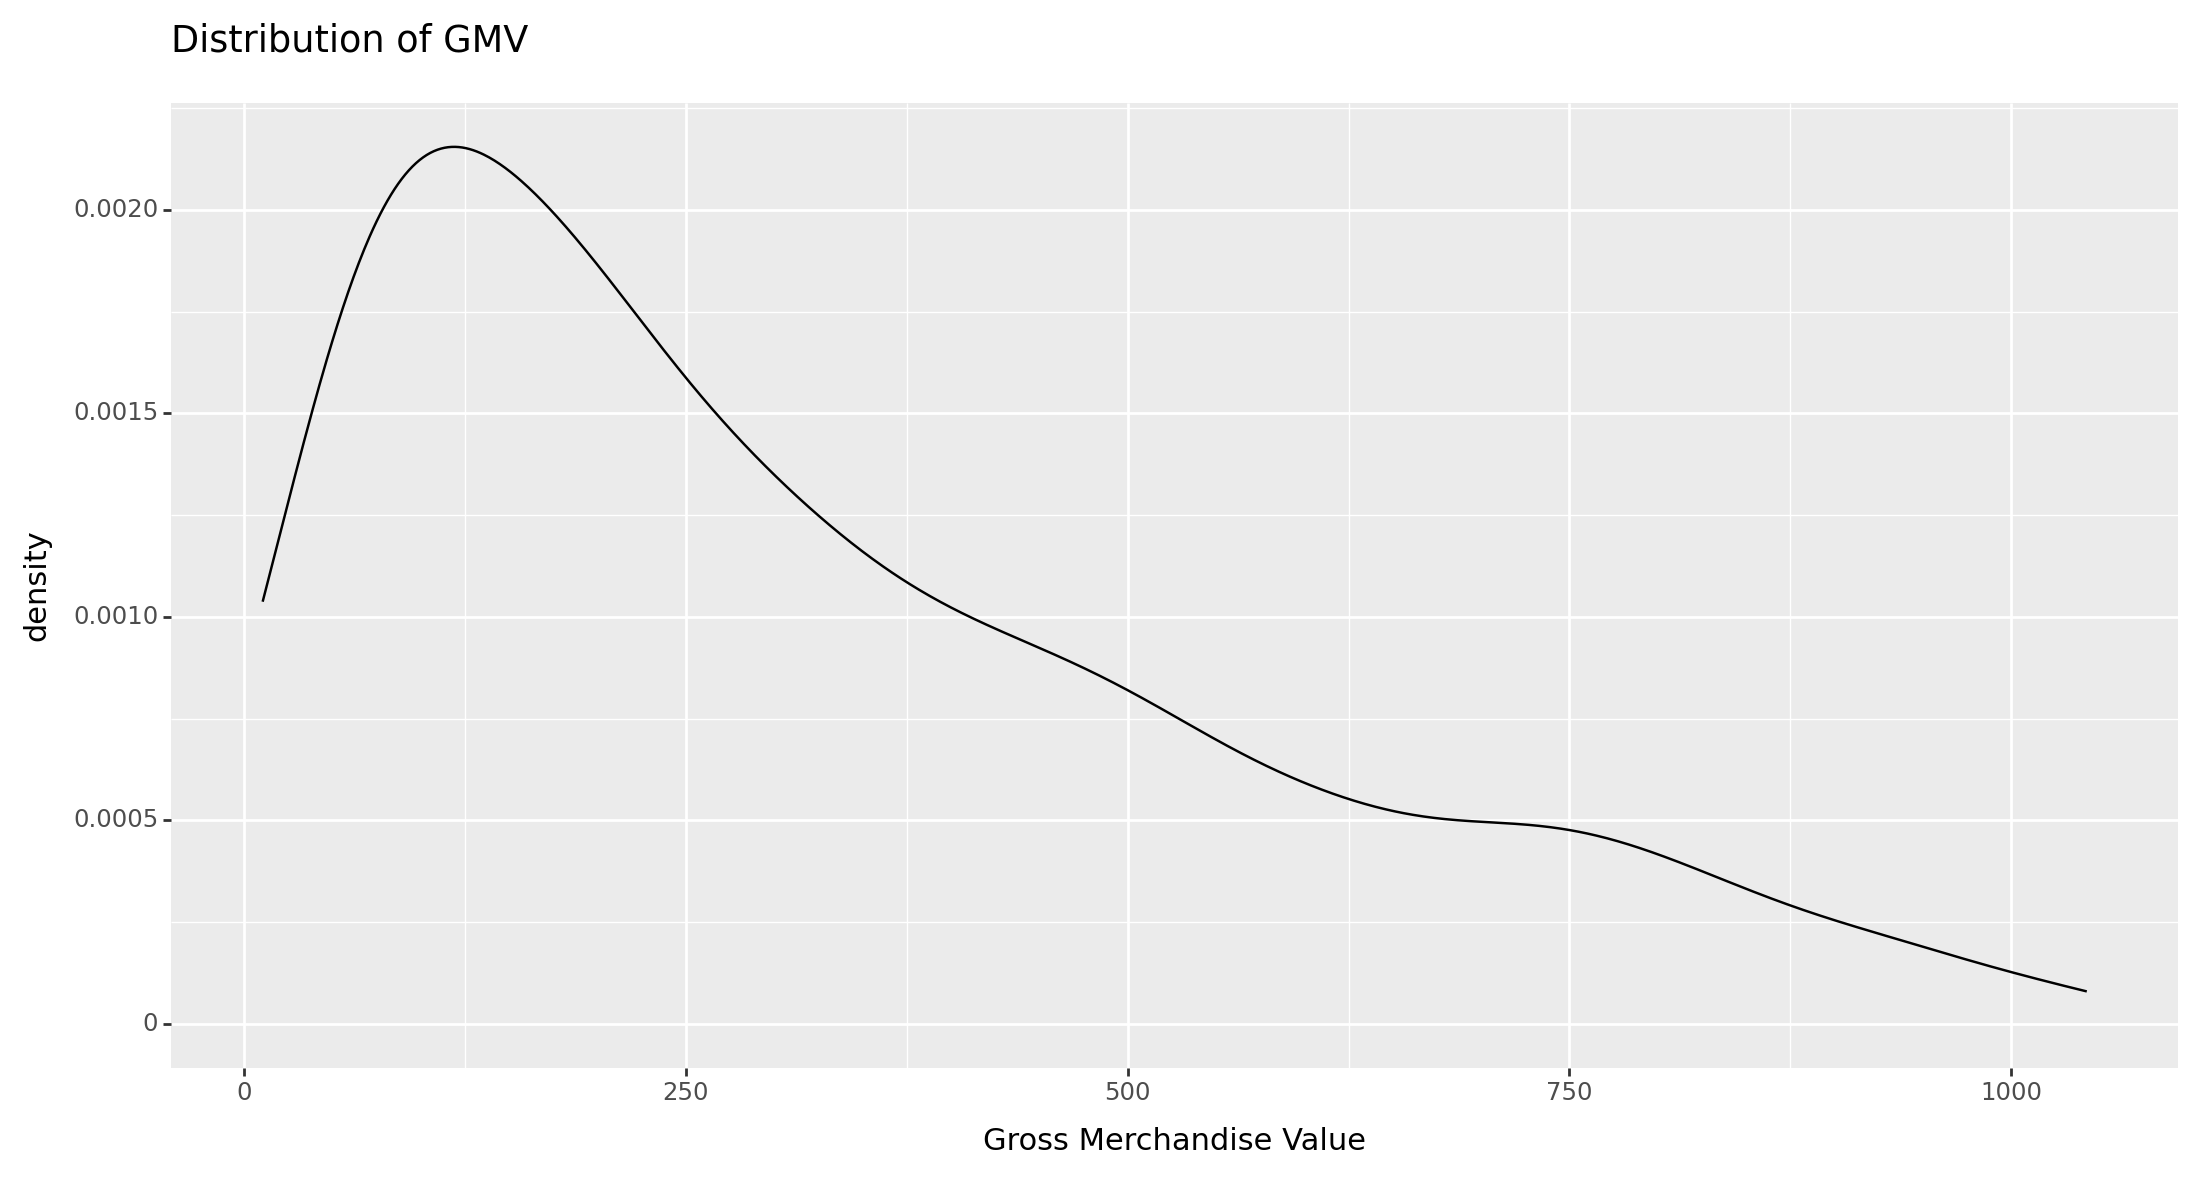

<Figure Size: (1100 x 600)>

In [26]:
(
    ggplot(data=df)
    + geom_density(aes(x='Total'))
    + labs(title='Distribution of GMV')
    + xlab('Gross Merchandise Value')
    + theme(figure_size=(11,6))
)

### GMV Distribution : Product line

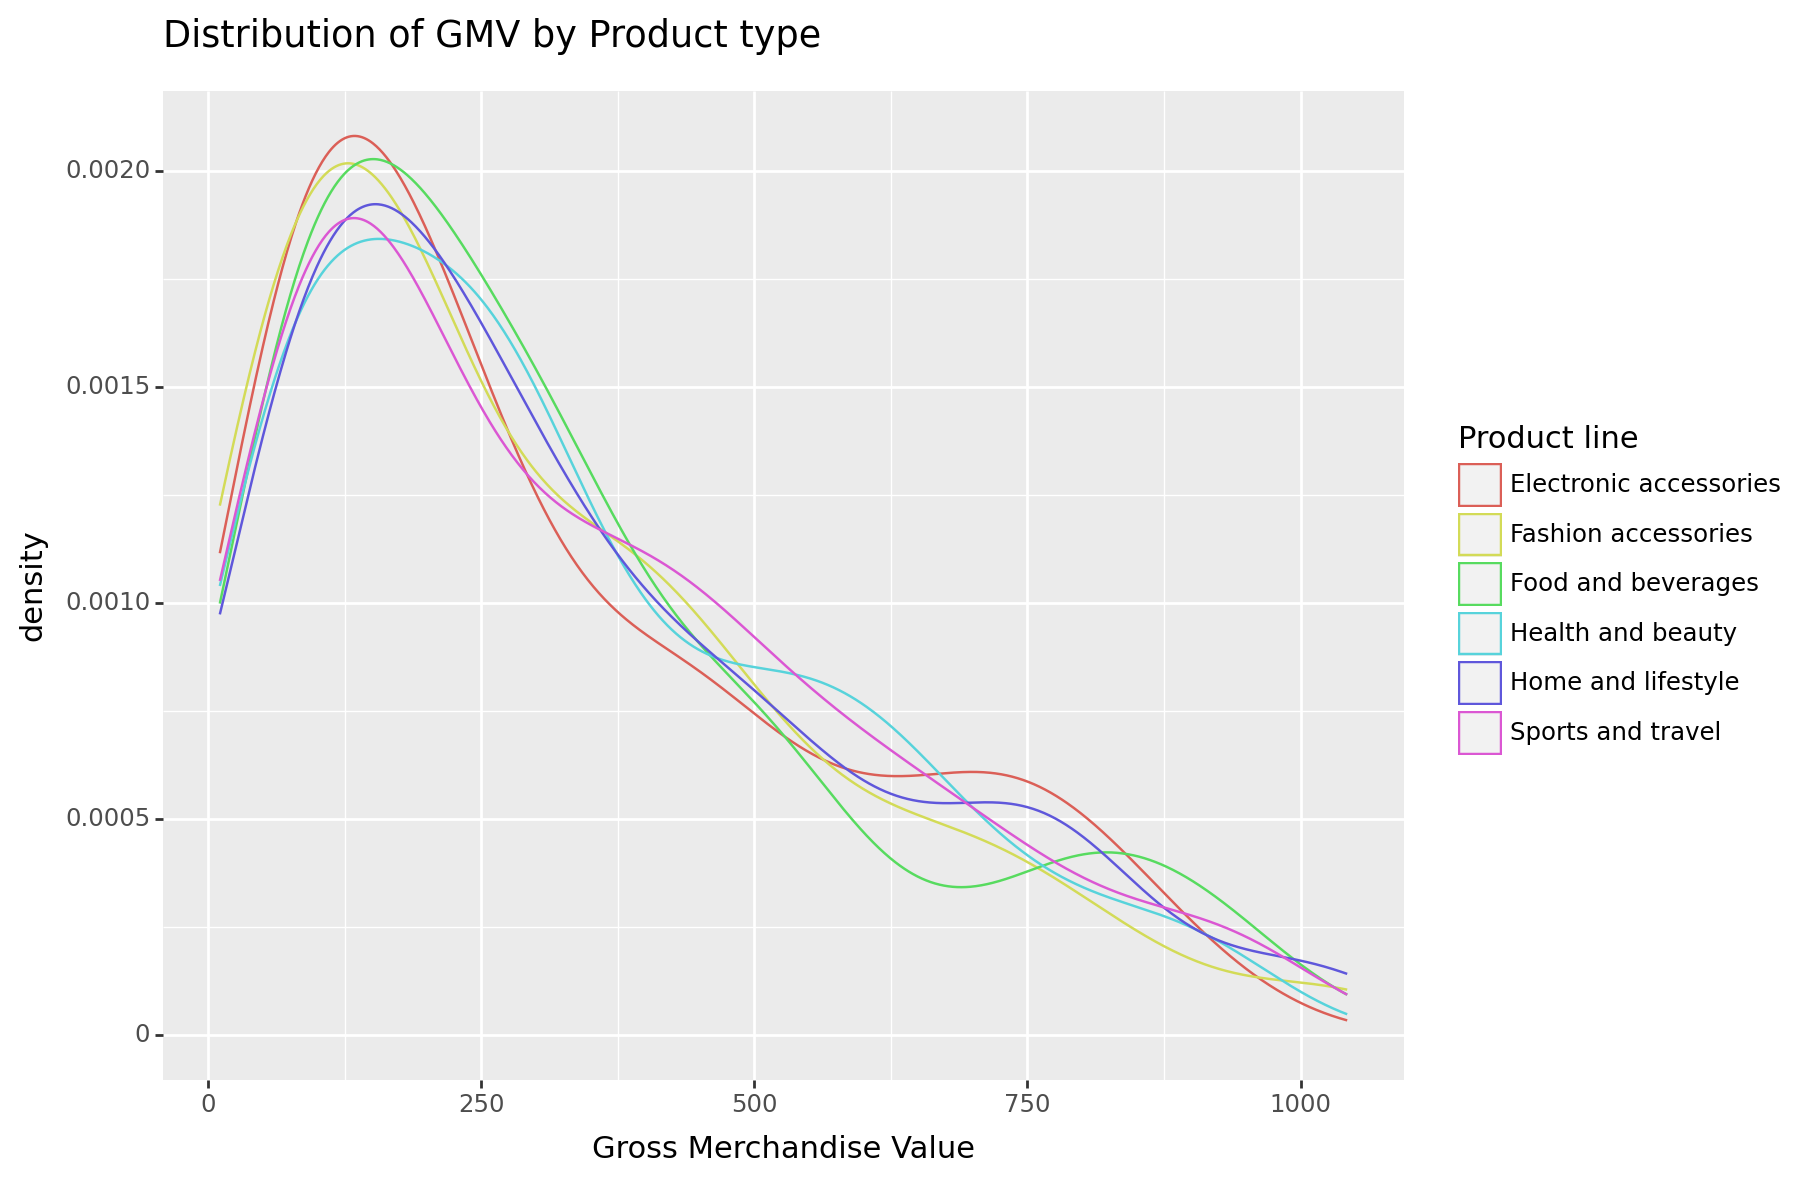

<Figure Size: (900 x 600)>

In [27]:
(
    ggplot(data=df)
    + geom_density(aes(x='Total', color='Product line'))
    + labs(title='Distribution of GMV by Product type')
    + xlab('Gross Merchandise Value')
    + theme(figure_size=(9,6))
)

### GMV Distribution : Citywise

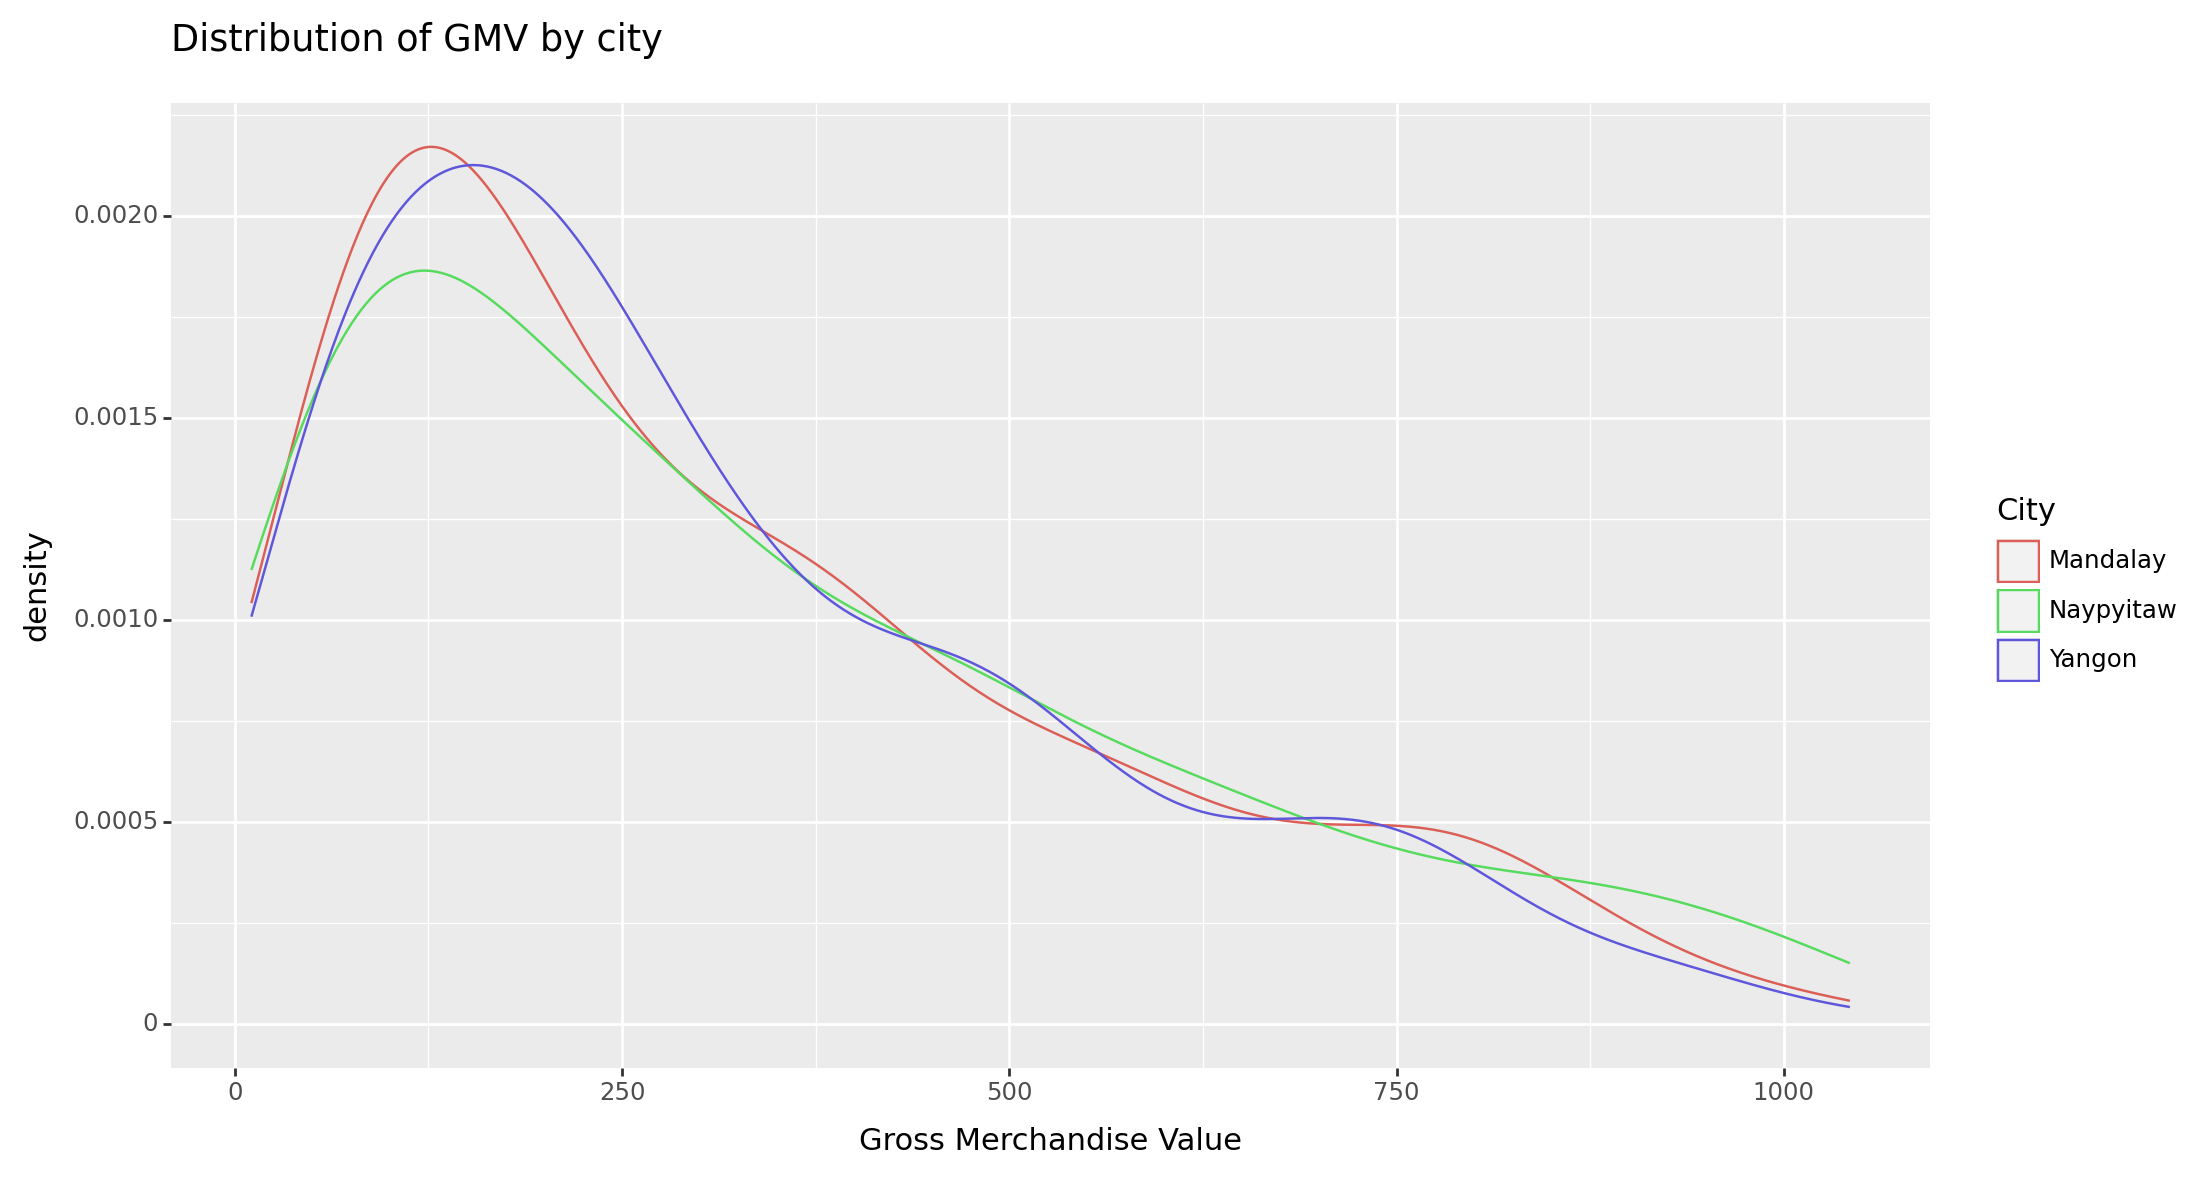

<Figure Size: (1100 x 600)>

In [28]:
(
    ggplot(data=df)
    + geom_density(aes(x='Total', color='City'))
    + labs(title='Distribution of GMV by city')
    + xlab('Gross Merchandise Value')
    + theme(figure_size=(11,6))
)

### GMV Distribution : Gender

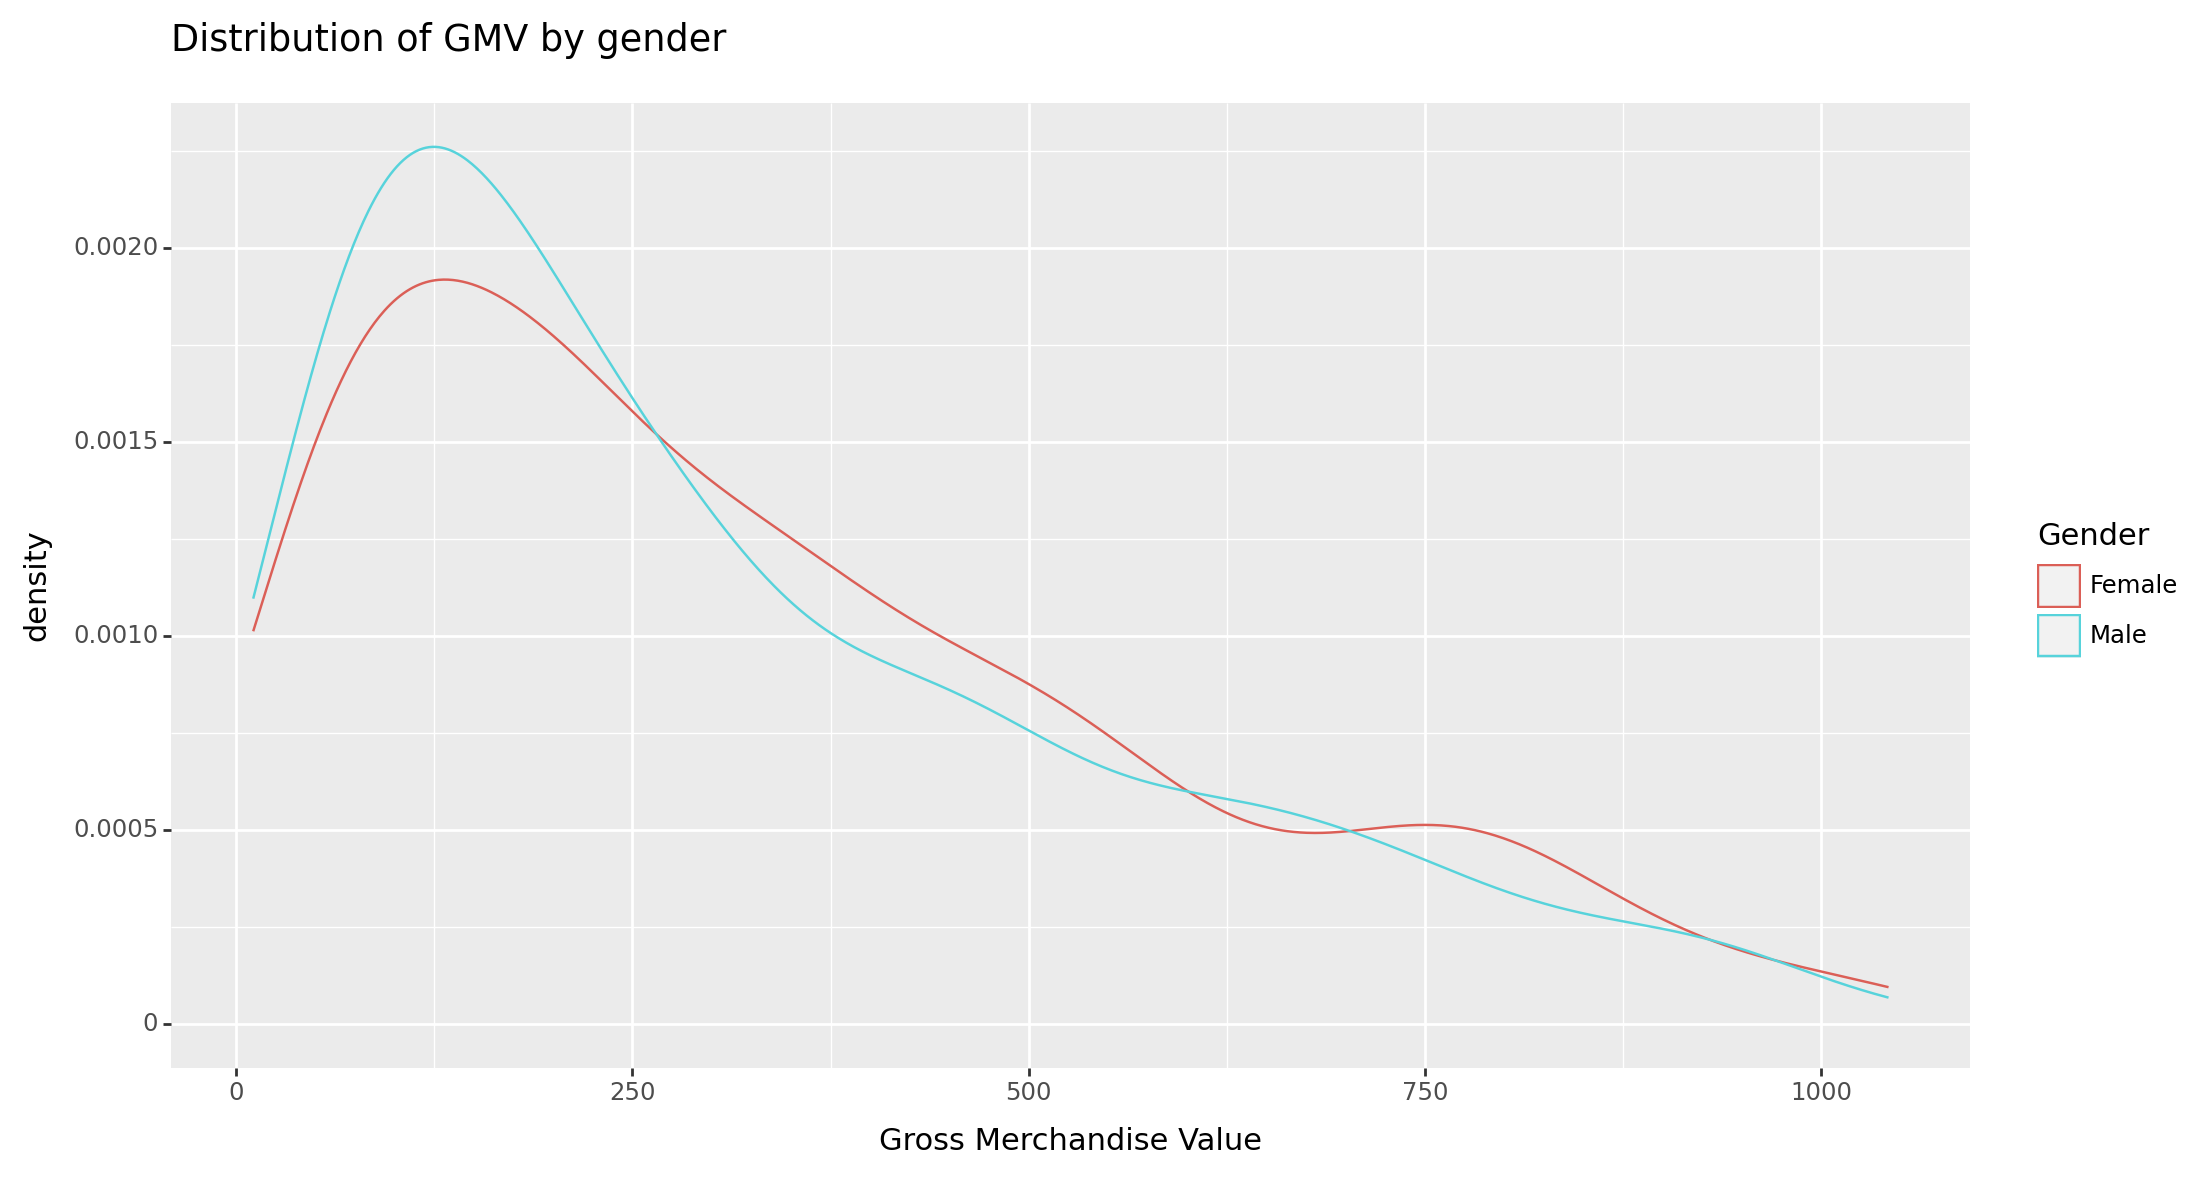

<Figure Size: (1100 x 600)>

In [29]:
(
    ggplot(data=df)
    + geom_density(aes(x='Total', color='Gender'))
    + labs(title='Distribution of GMV by gender')
    + xlab('Gross Merchandise Value')
    + theme(figure_size=(11,6))
)

### GMV Distribution : Customer type

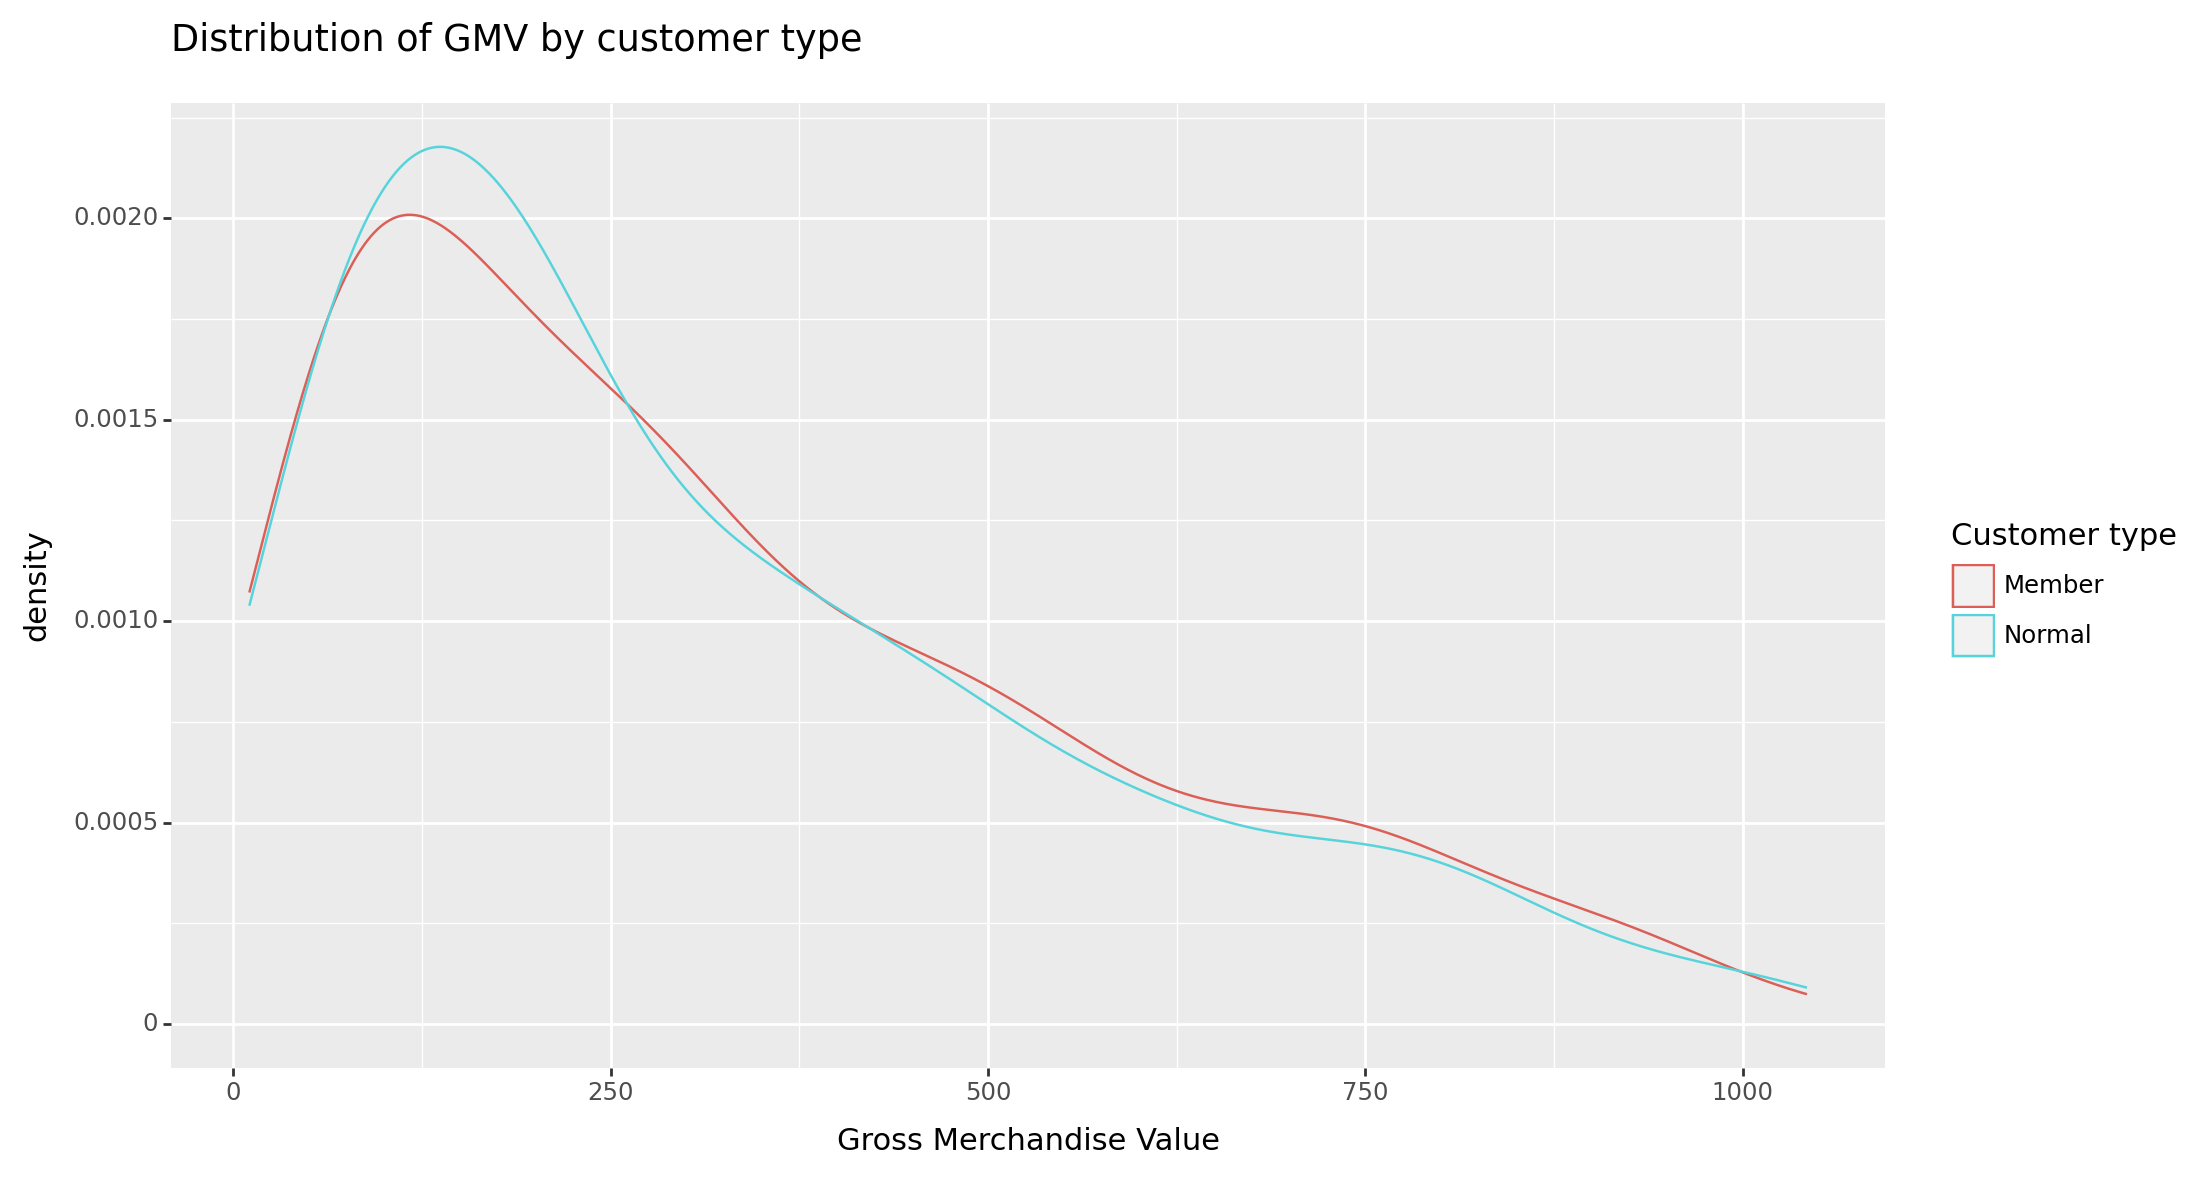

<Figure Size: (1100 x 600)>

In [30]:
(
    ggplot(data=df)
    + geom_density(aes(x='Total', color='Customer type'))
    + labs(title='Distribution of GMV by customer type')
    + xlab('Gross Merchandise Value')
    + theme(figure_size=(11,6))
)

## Rating

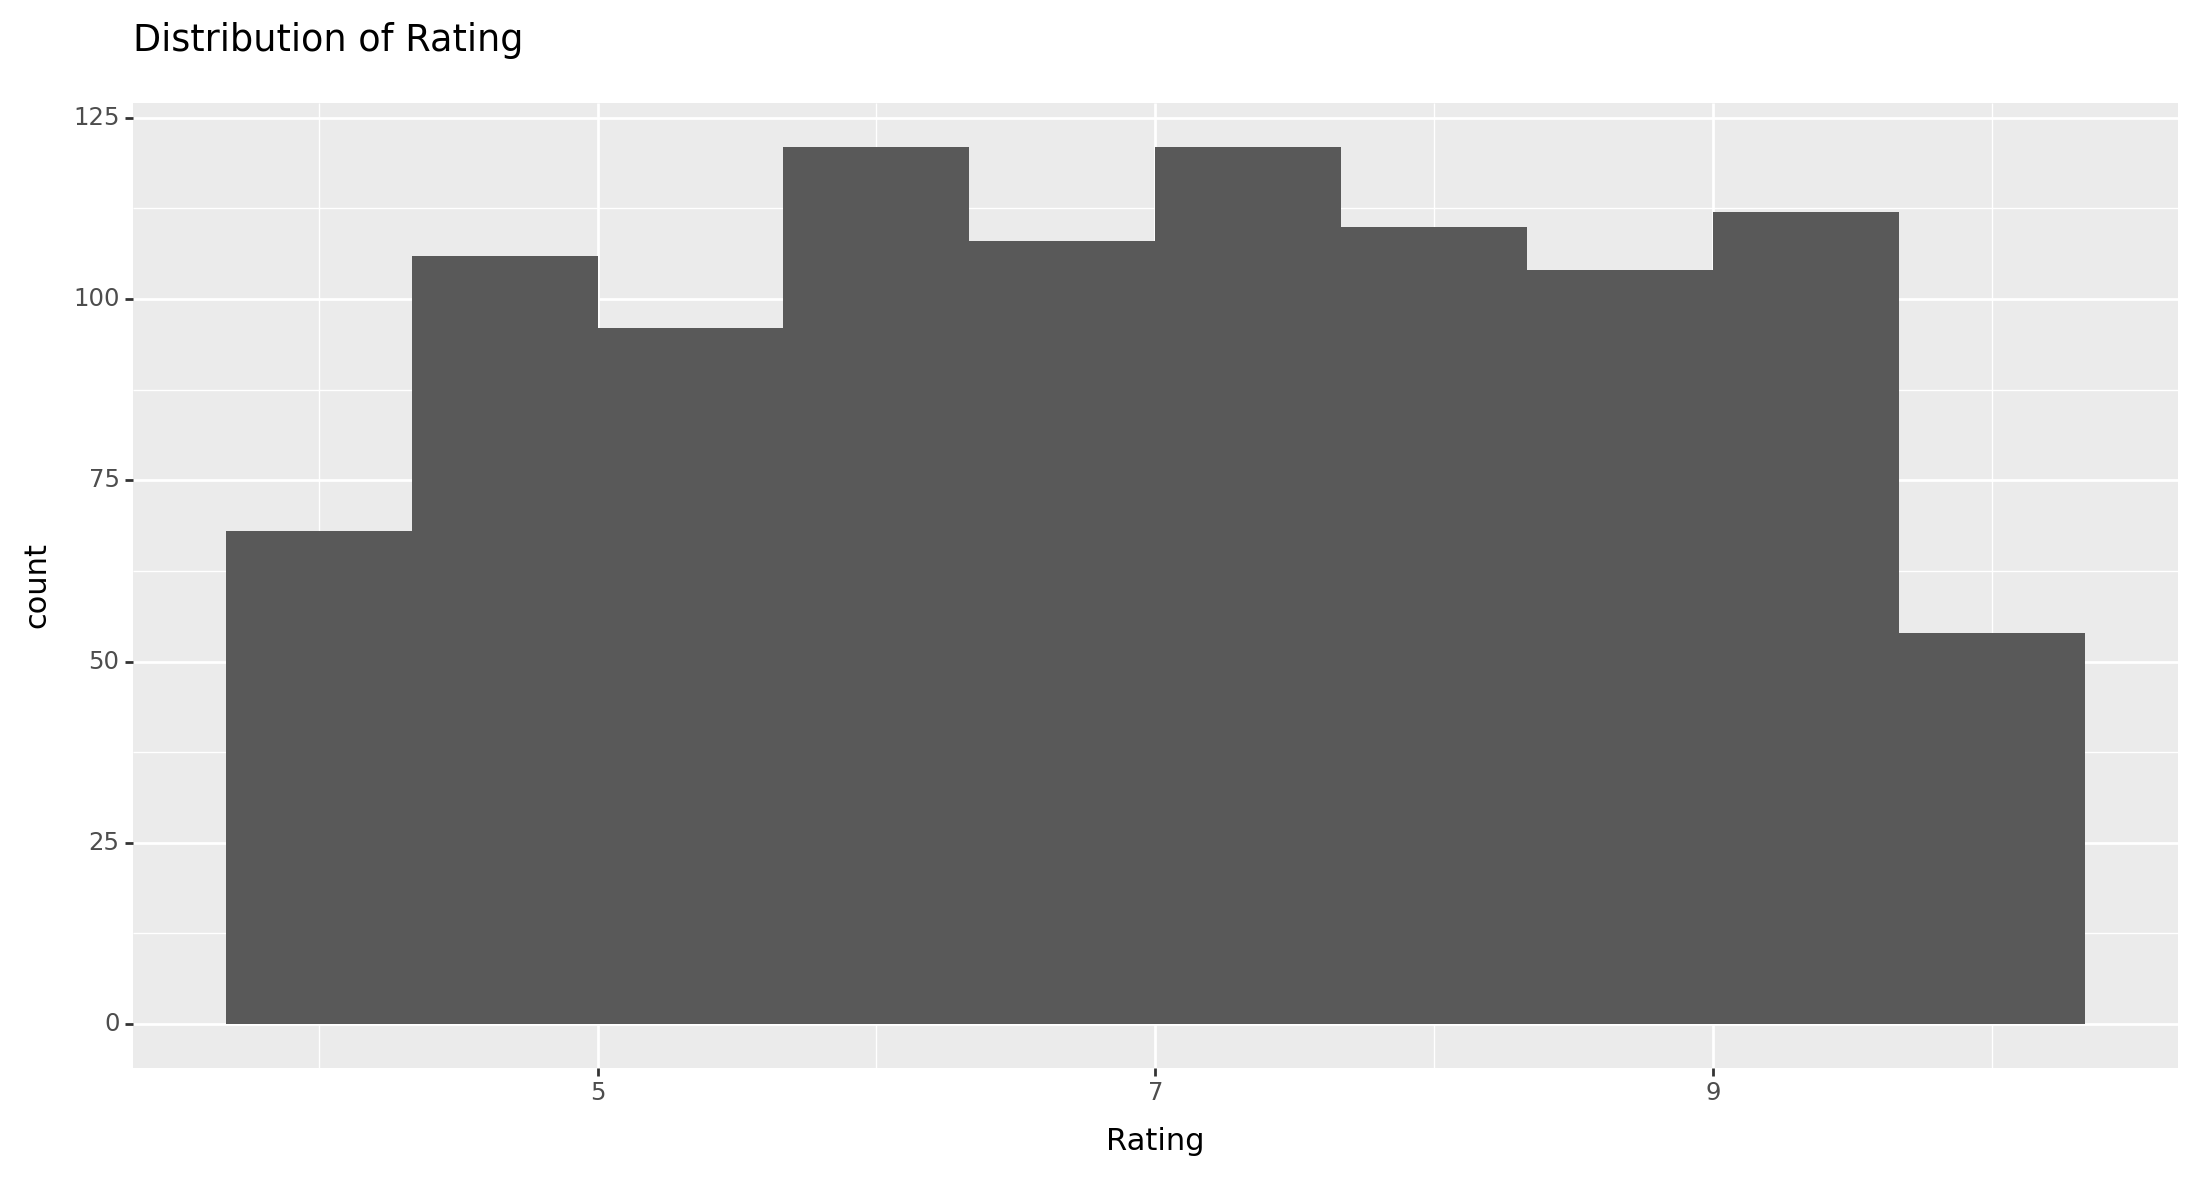

<Figure Size: (1100 x 600)>

In [31]:
(
    ggplot(data=df)
    + geom_histogram(aes(x='Rating'))
    + labs(title='Distribution of Rating')
    + xlab('Rating')
    + theme(figure_size=(11,6))
)

### Rating : Customer type

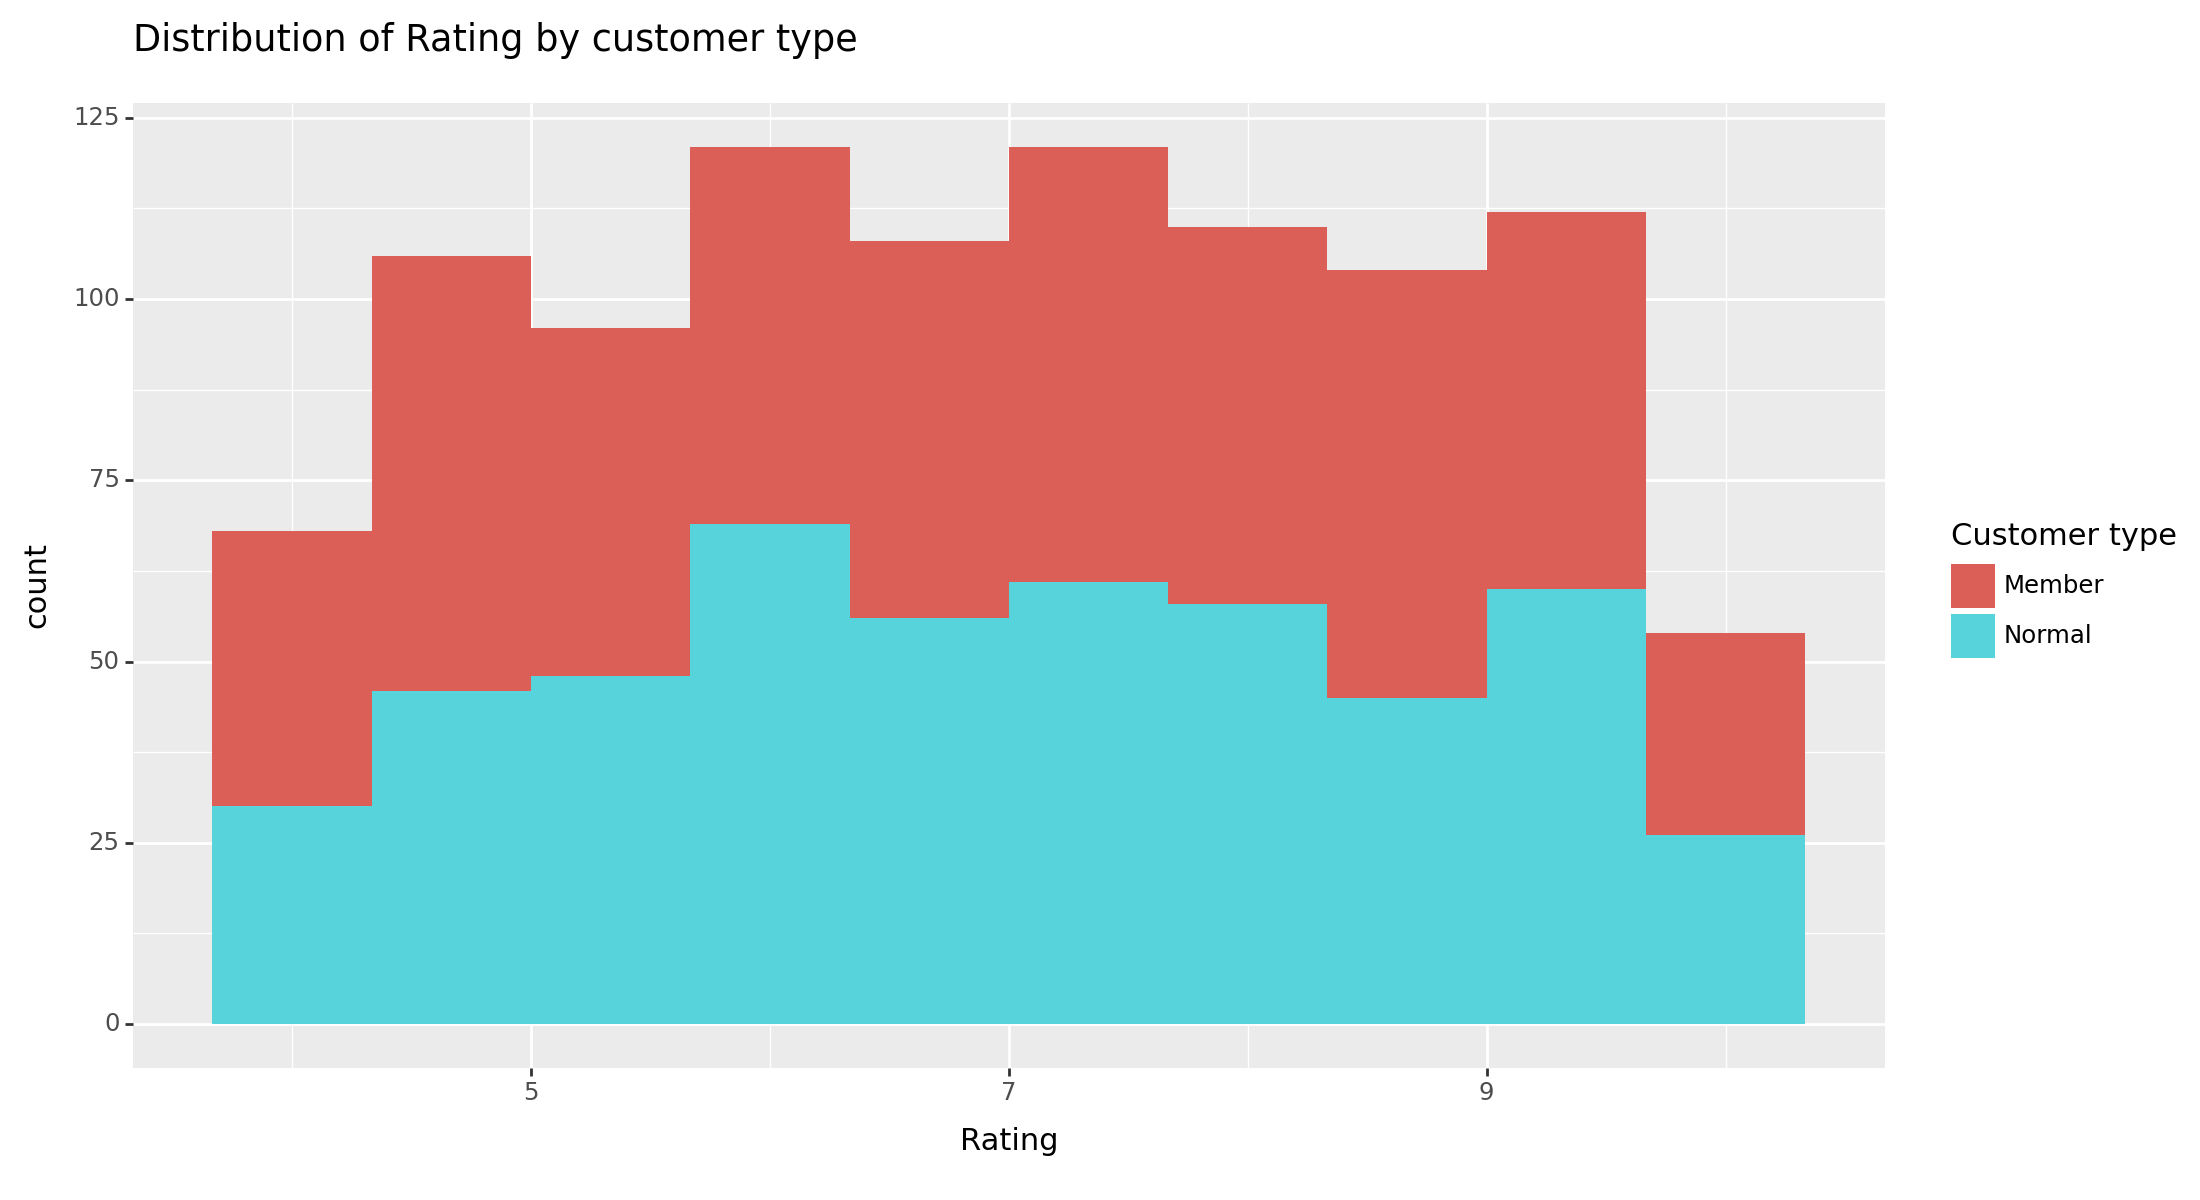

<Figure Size: (1100 x 600)>

In [32]:
(
    ggplot(data=df)
    + geom_histogram(aes(x='Rating', fill='Customer type'))
    + labs(title='Distribution of Rating by customer type')
    + xlab('Rating')
    + theme(figure_size=(11,6))
)

### Rating : Citywise

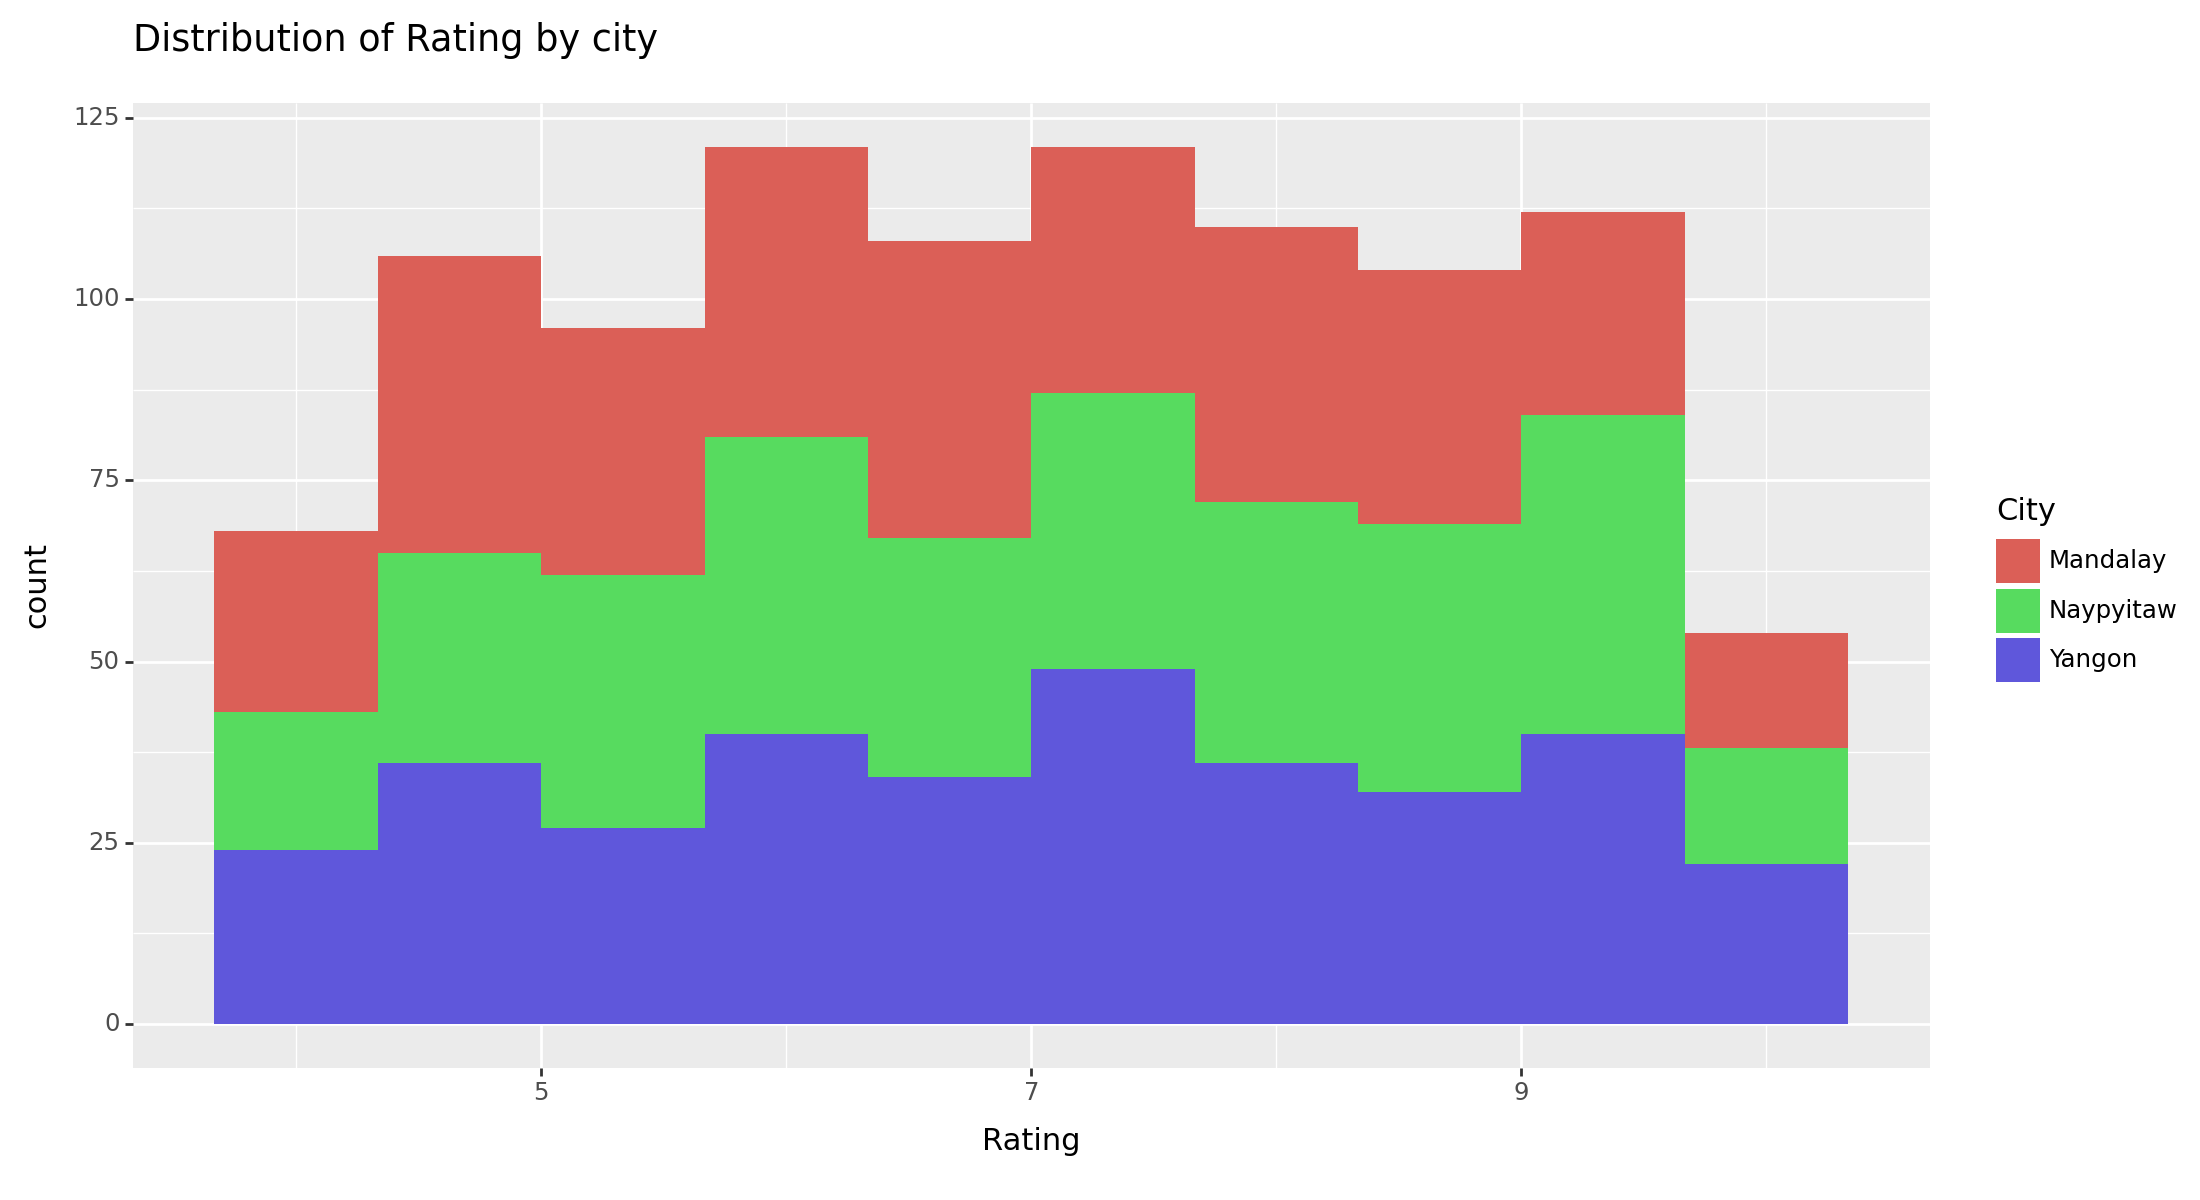

<Figure Size: (1100 x 600)>

In [33]:
(
    ggplot(data=df)
    + geom_histogram(aes(x='Rating', fill='City'))
    + labs(title='Distribution of Rating by city')
    + xlab('Rating')
    + theme(figure_size=(11,6))
)

## Token Size

In [35]:
df1 = df
df1['Date'] = pd.to_datetime(df1.Date)
df1['month'] = df.Date.dt.month
df1['day'] = df.Date.dt.day
df1.sort_values(by=['month', 'day'], ascending=True, inplace=True)

In [36]:
token_df = round(df1.groupby(['Date', 'month'])['Total'].mean()).reset_index()

#### January 2019

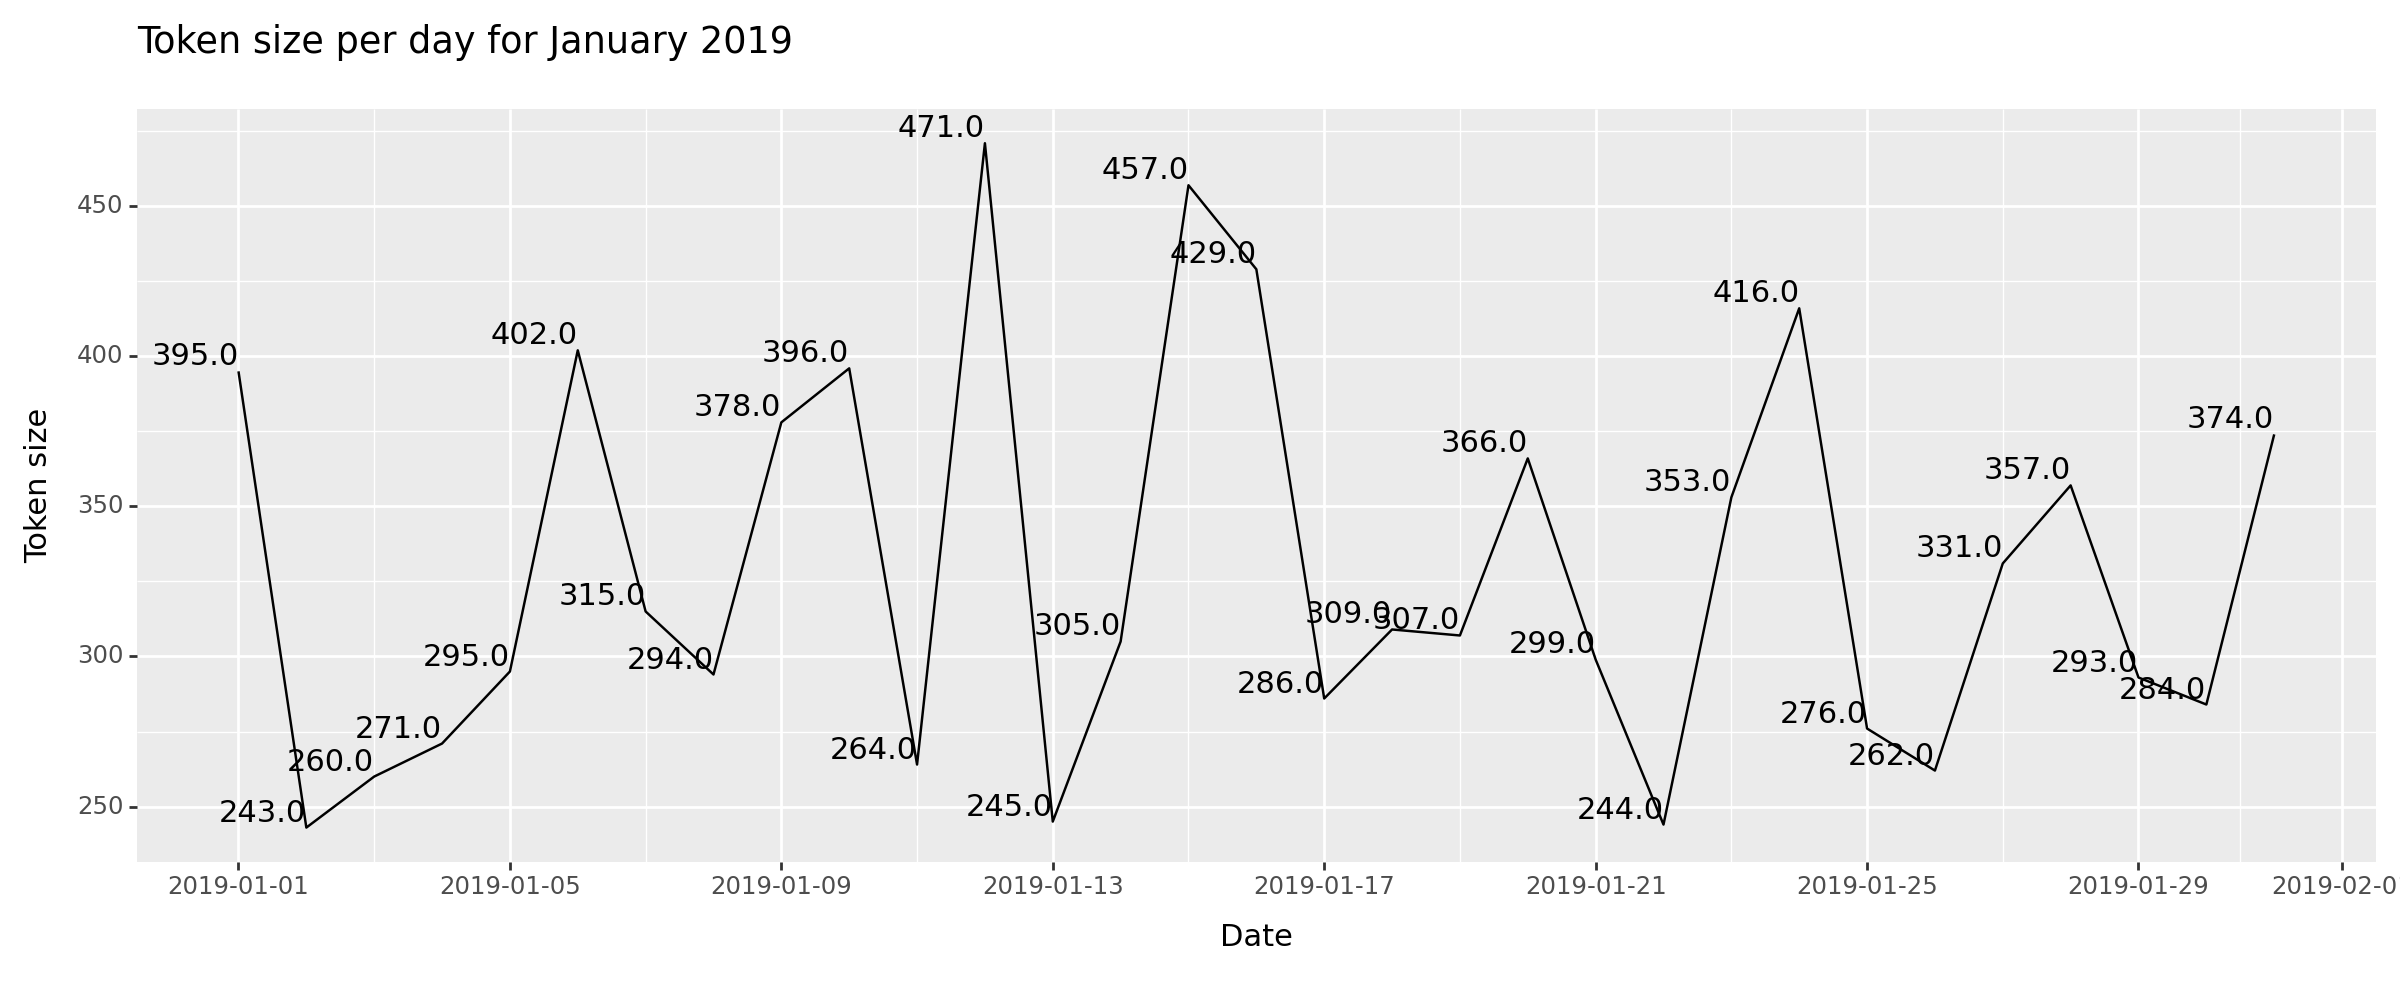

<Figure Size: (1200 x 500)>

In [37]:
(
    ggplot(token_df.query('month==1'))
    + geom_line(aes(x='Date', y='Total'))
    + geom_text(aes(x='Date', y='Total', label='Total'), ha='right', va='bottom')
    + labs(title='Token size per day for January 2019')
    + ylab('Token size')
    + theme(figure_size=(12,5))
)

#### February 2019

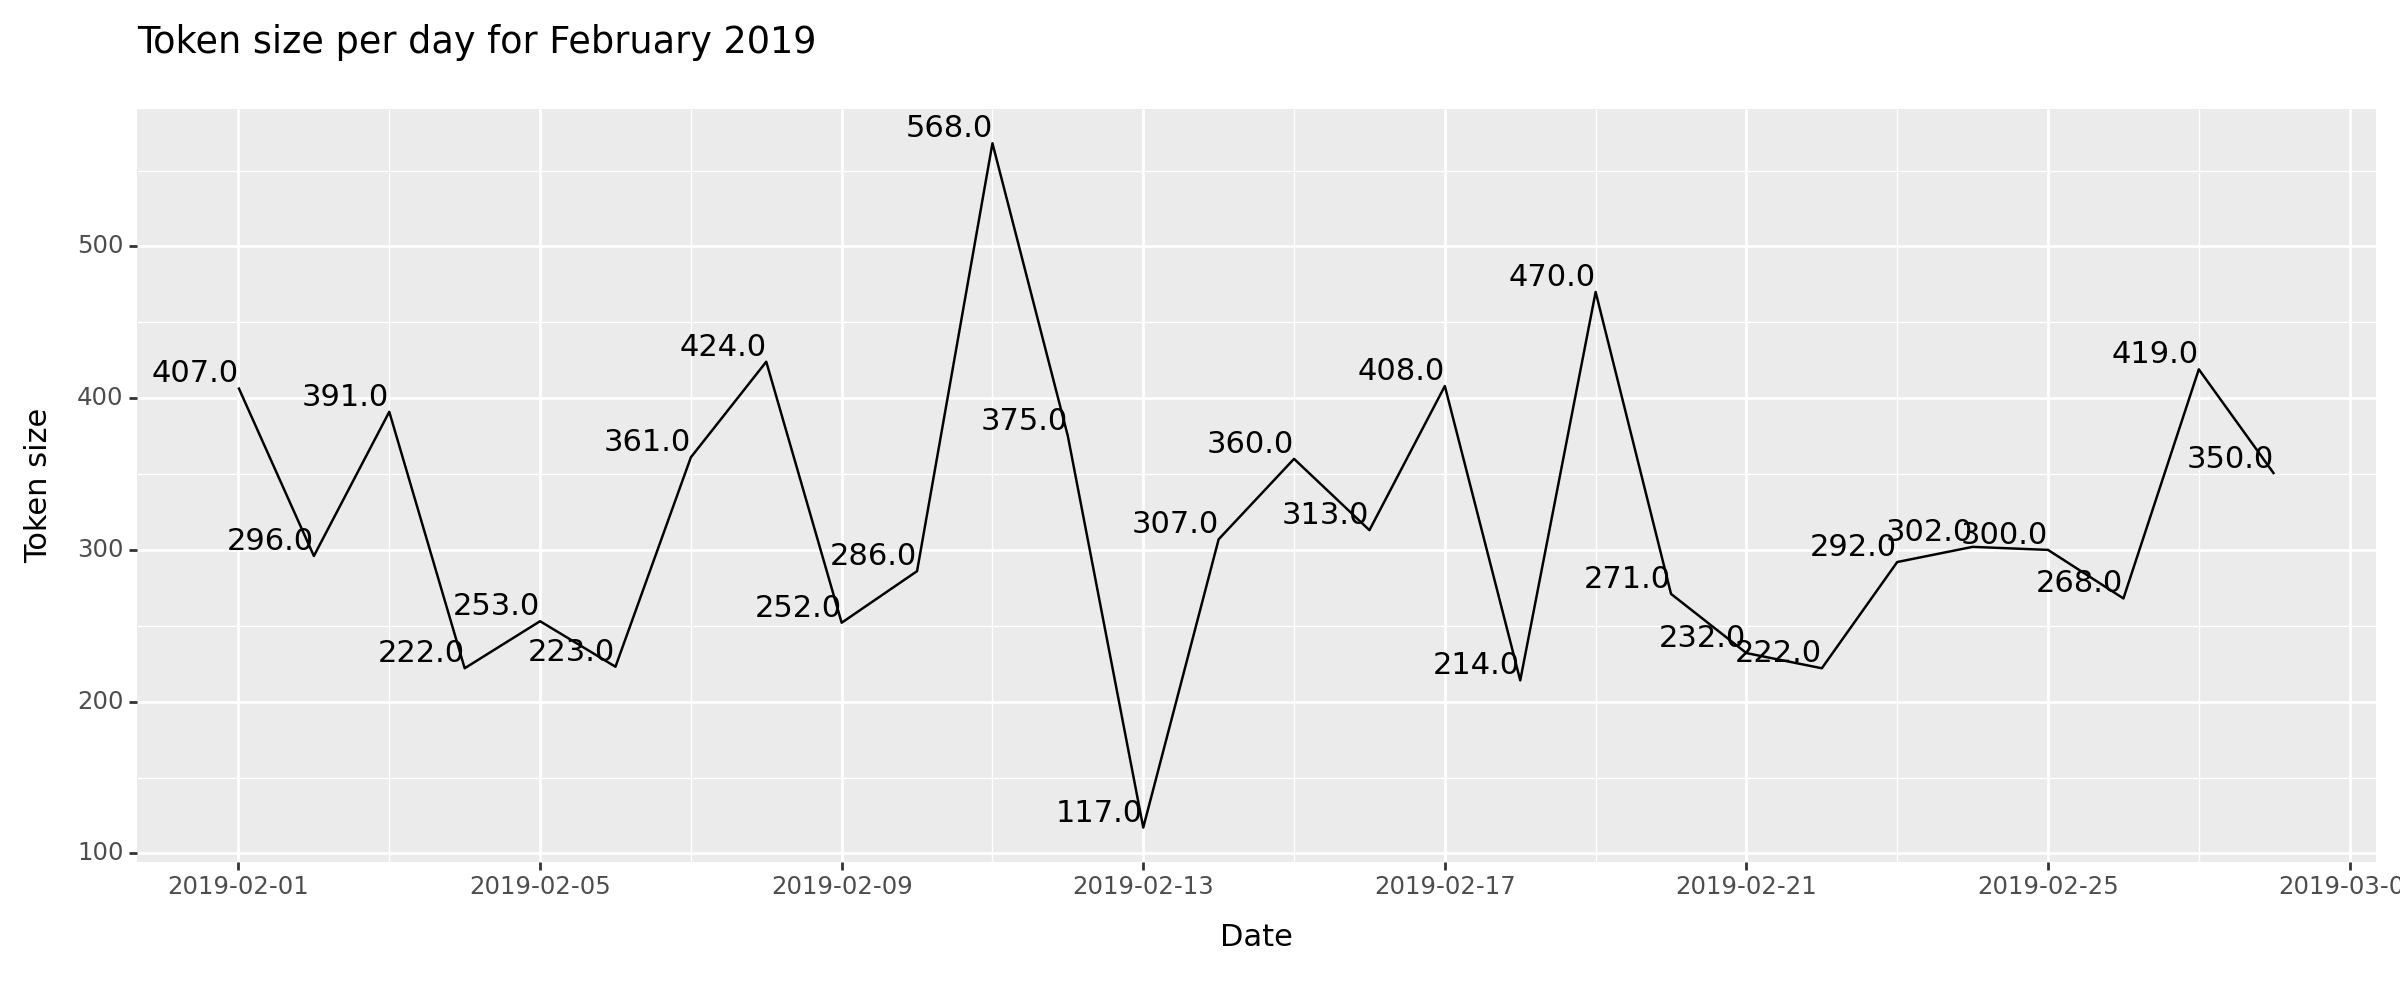

<Figure Size: (1200 x 500)>

In [38]:
(
    ggplot(token_df.query('month==2'))
    + geom_line(aes(x='Date', y='Total'))
    + geom_text(aes(x='Date', y='Total', label='Total'), ha='right', va='bottom')
    + labs(title='Token size per day for February 2019')
    + ylab('Token size')
    + theme(figure_size=(12,5))
)

#### March 2019

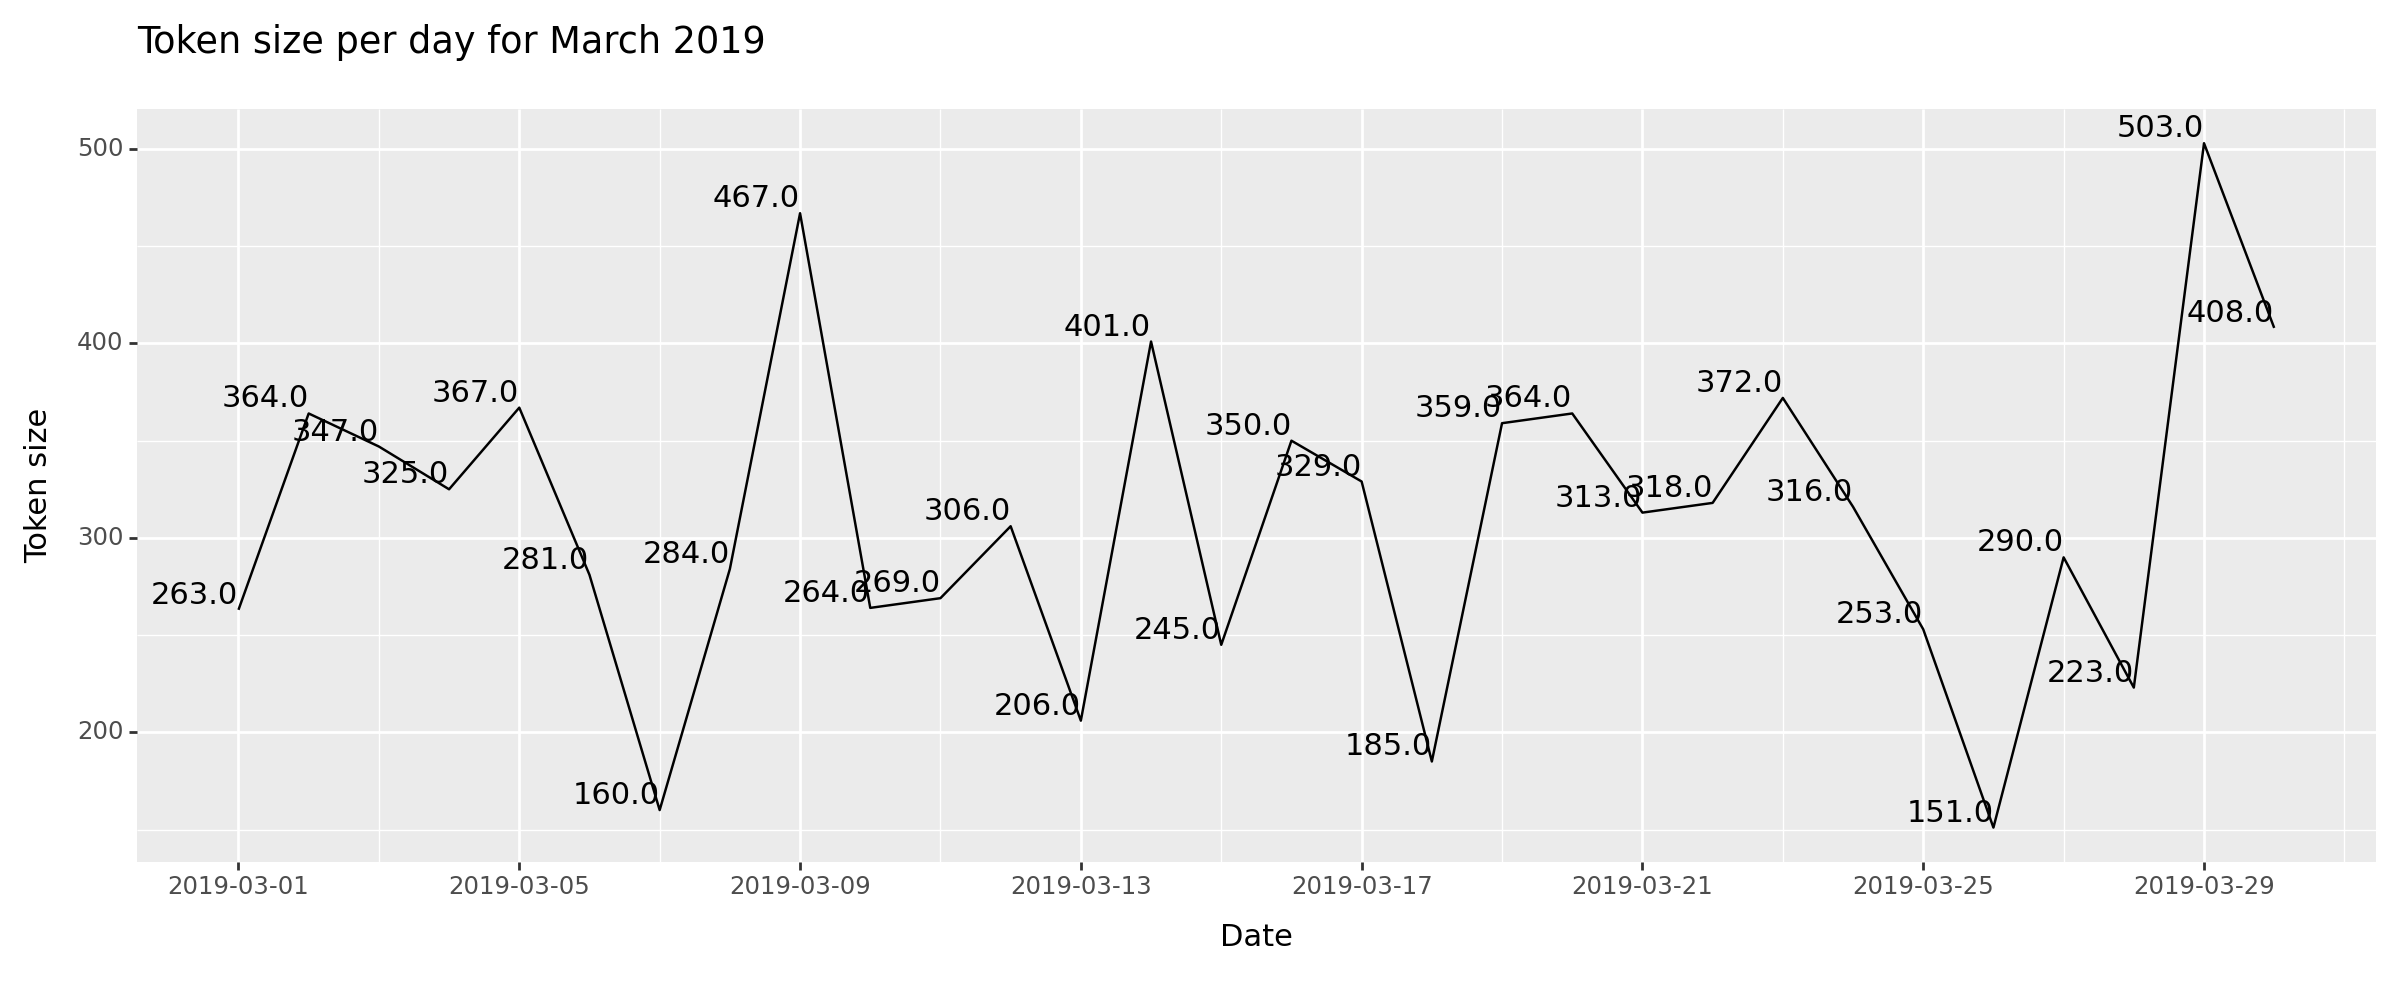

<Figure Size: (1200 x 500)>

In [39]:
(
    ggplot(token_df.query('month==3'))
    + geom_line(aes(x='Date', y='Total'))
    + geom_text(aes(x='Date', y='Total', label='Total'), ha='right', va='bottom')
    + labs(title='Token size per day for March 2019')
    + ylab('Token size')
    + theme(figure_size=(12,5))
)

### Token Size : Product line

In [40]:
token_df1 = df1.groupby(['Date', 'month', 'Product line'])['Total'].mean().reset_index()

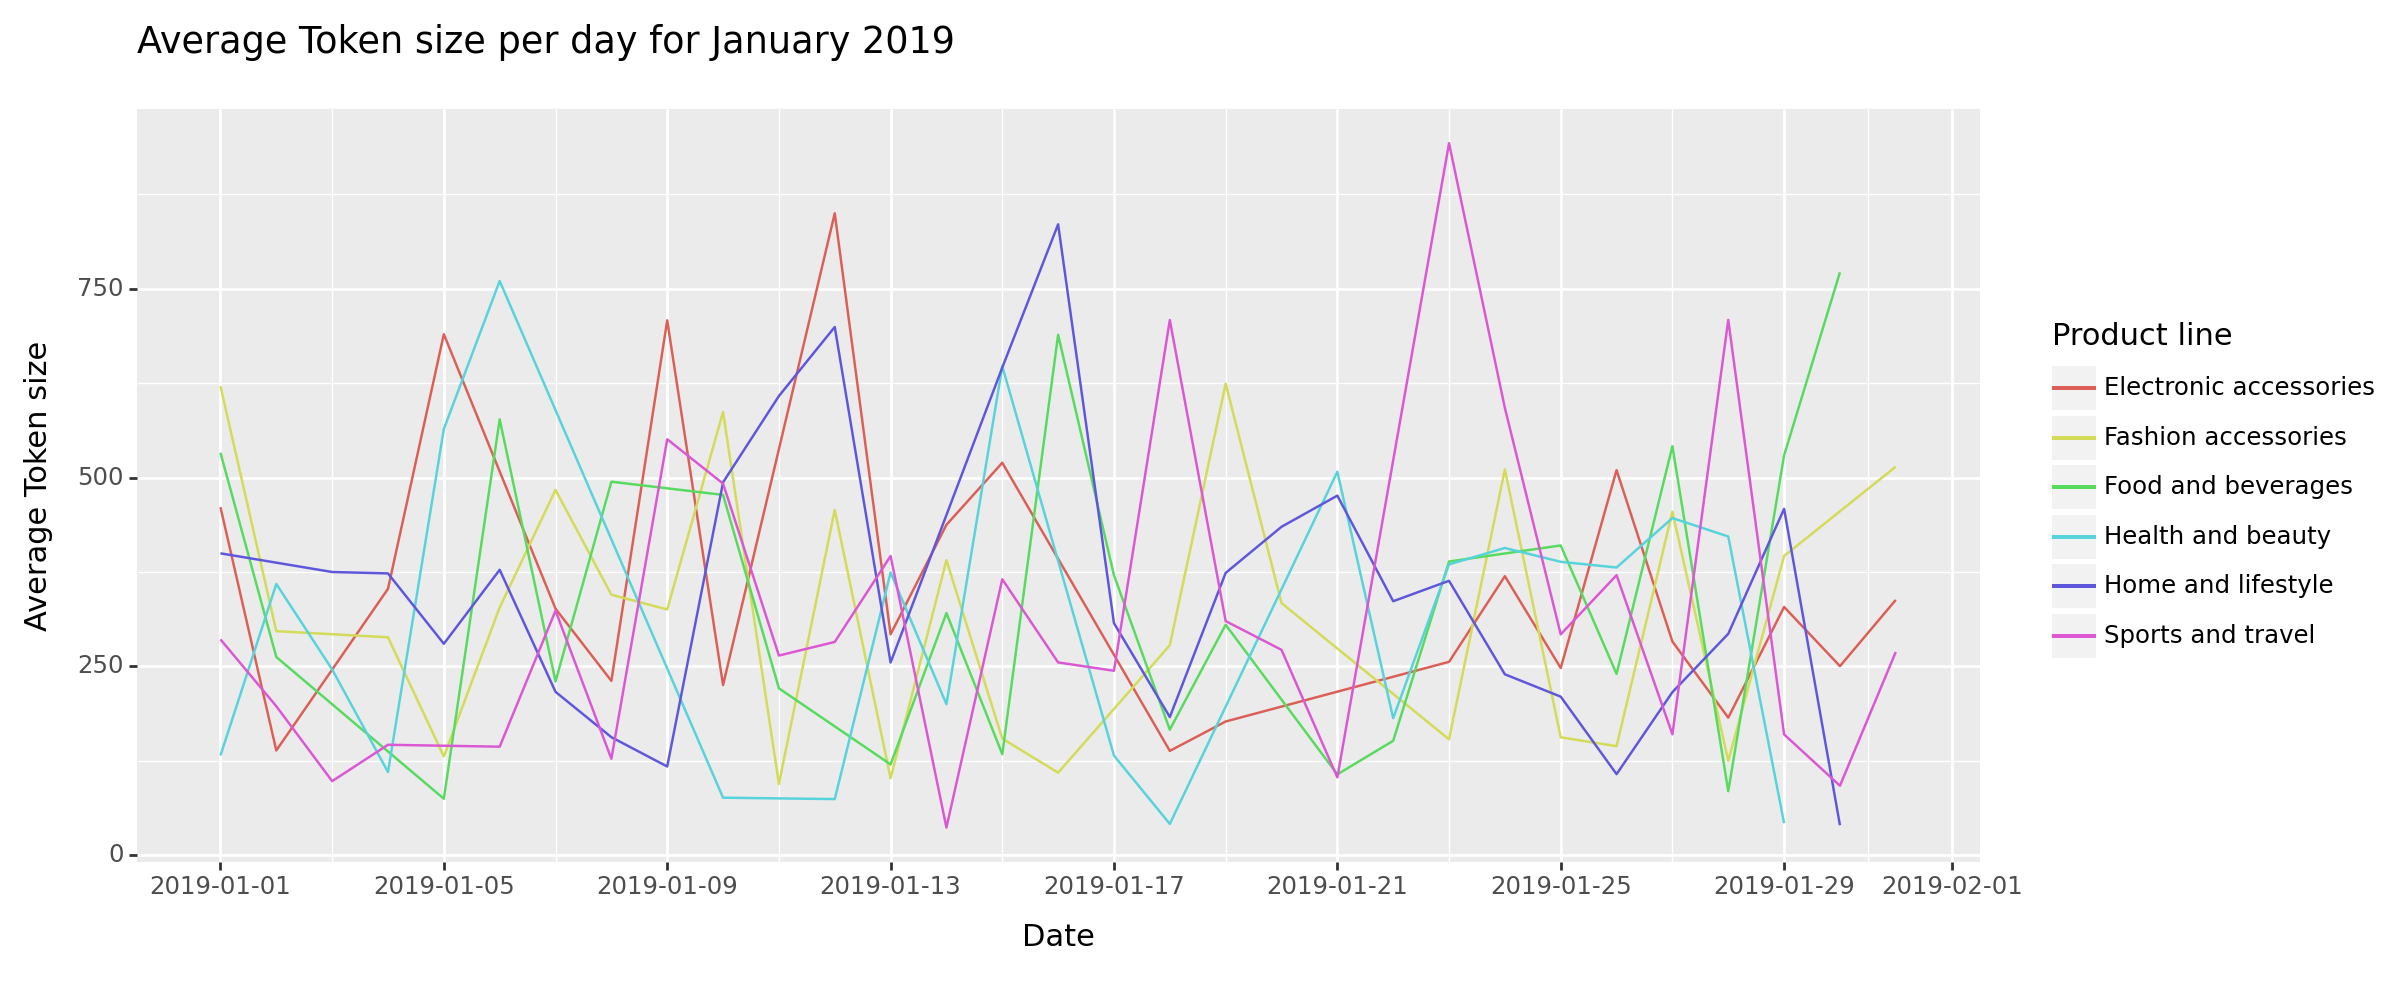

<Figure Size: (1200 x 500)>

In [41]:
(
    ggplot(token_df1.query('month==1'))
    + geom_line(aes(x='Date', y='Total', color='Product line'))
    + labs(title='Average Token size per day for January 2019')
    + ylab('Average Token size')
    + theme(figure_size=(12,5))
)

## Frequency

In [42]:
df2 = df
df.Date = pd.to_datetime(df.Date)
freq_df = df[['Date', 'month']].value_counts().reset_index().sort_values(by='Date')

#### January 2019

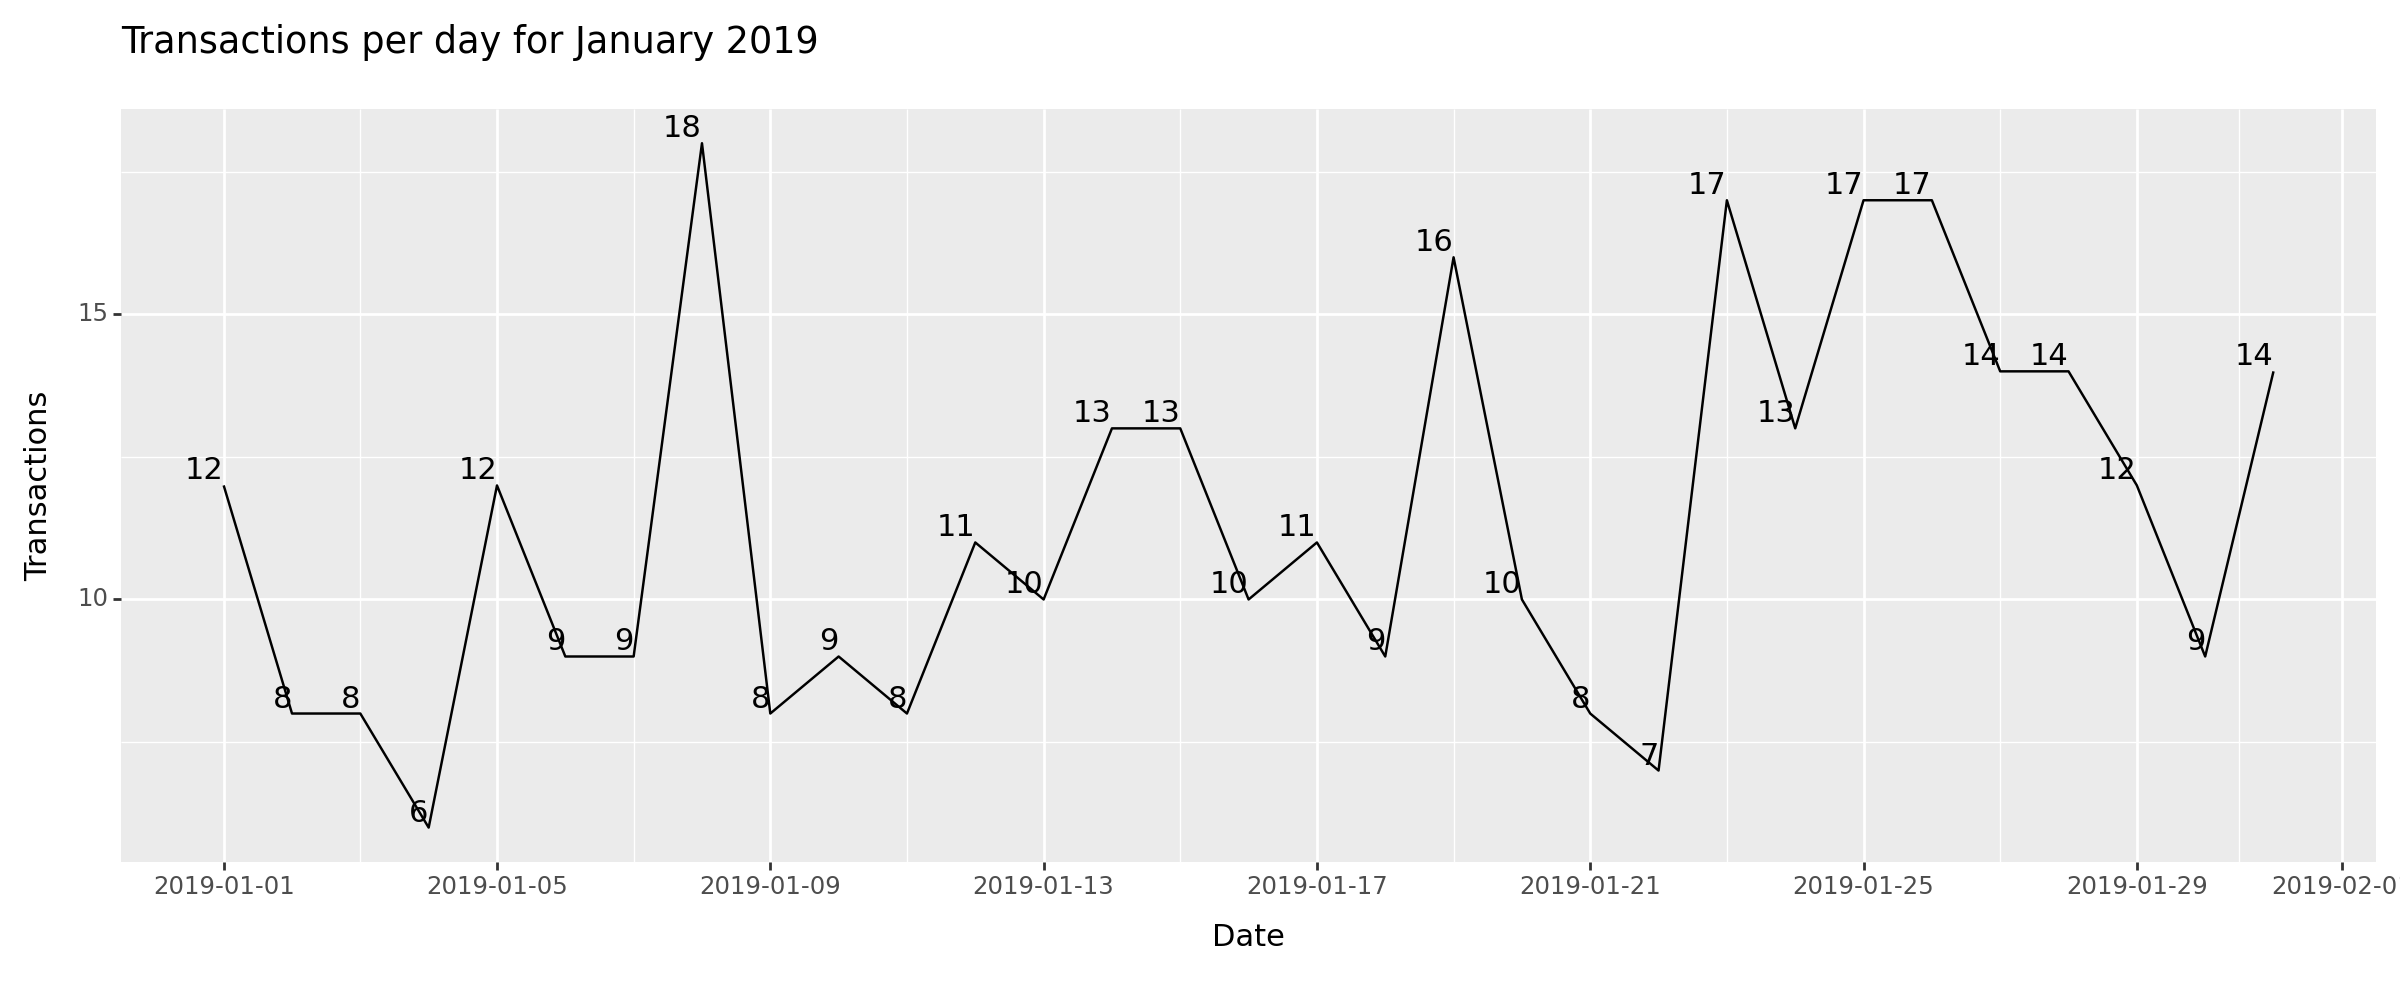

<Figure Size: (1200 x 500)>

In [43]:
(
    ggplot(freq_df.query('month==1'))
    + geom_line(aes(x='Date', y='count'))
    + geom_text(aes(x='Date', y='count', label='count'), ha='right', va='bottom')
    + labs(title='Transactions per day for January 2019')
    + ylab('Transactions')
    + theme(figure_size=(12, 5))
)

#### February 2019

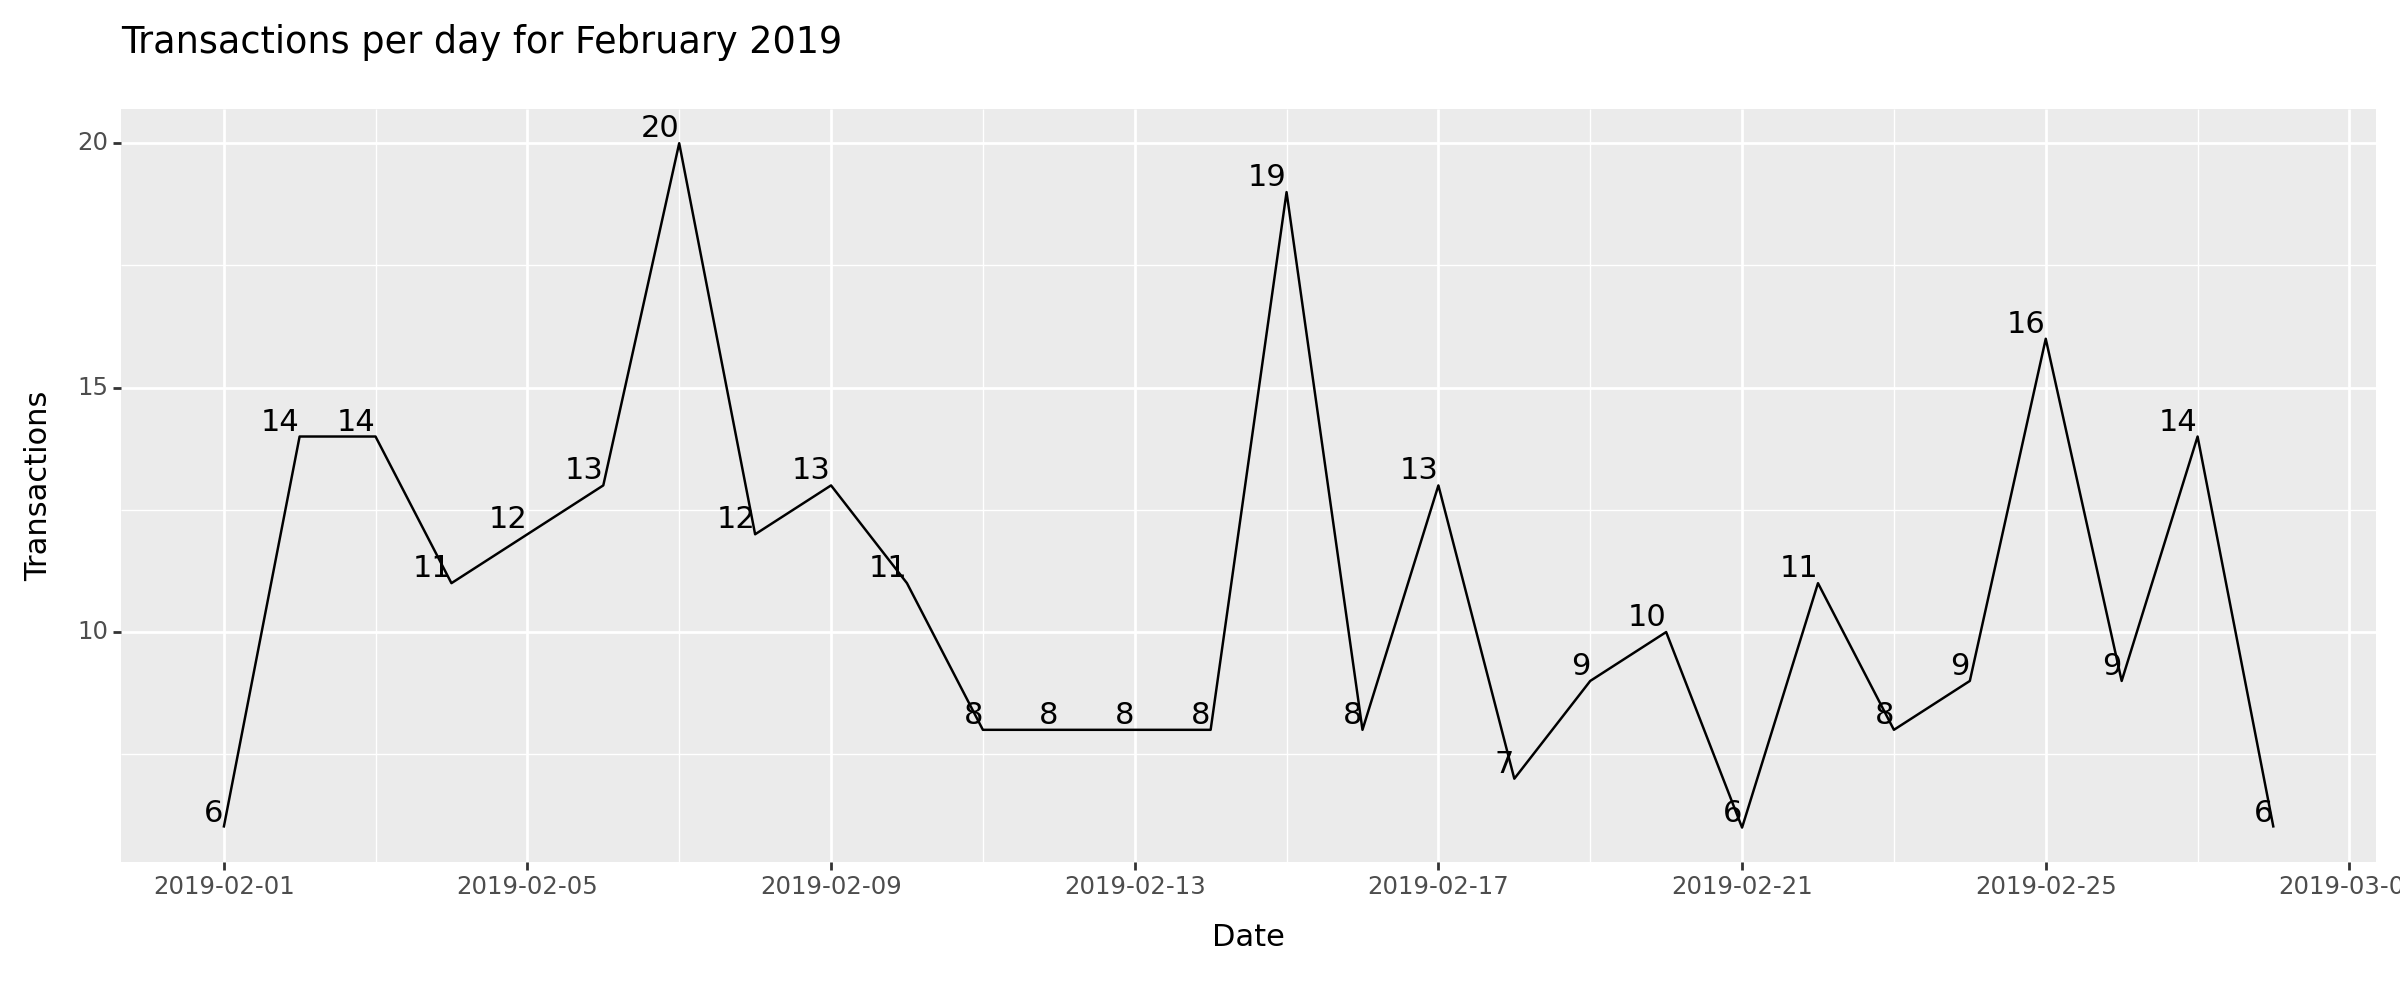

<Figure Size: (1200 x 500)>

In [44]:
(
    ggplot(freq_df.query('month==2'))
    + geom_line(aes(x='Date', y='count'))
    + geom_text(aes(x='Date', y='count', label='count'), ha='right', va='bottom')
    + labs(title='Transactions per day for February 2019')
    + ylab('Transactions')
    + theme(figure_size=(12, 5))
)

#### March 2019

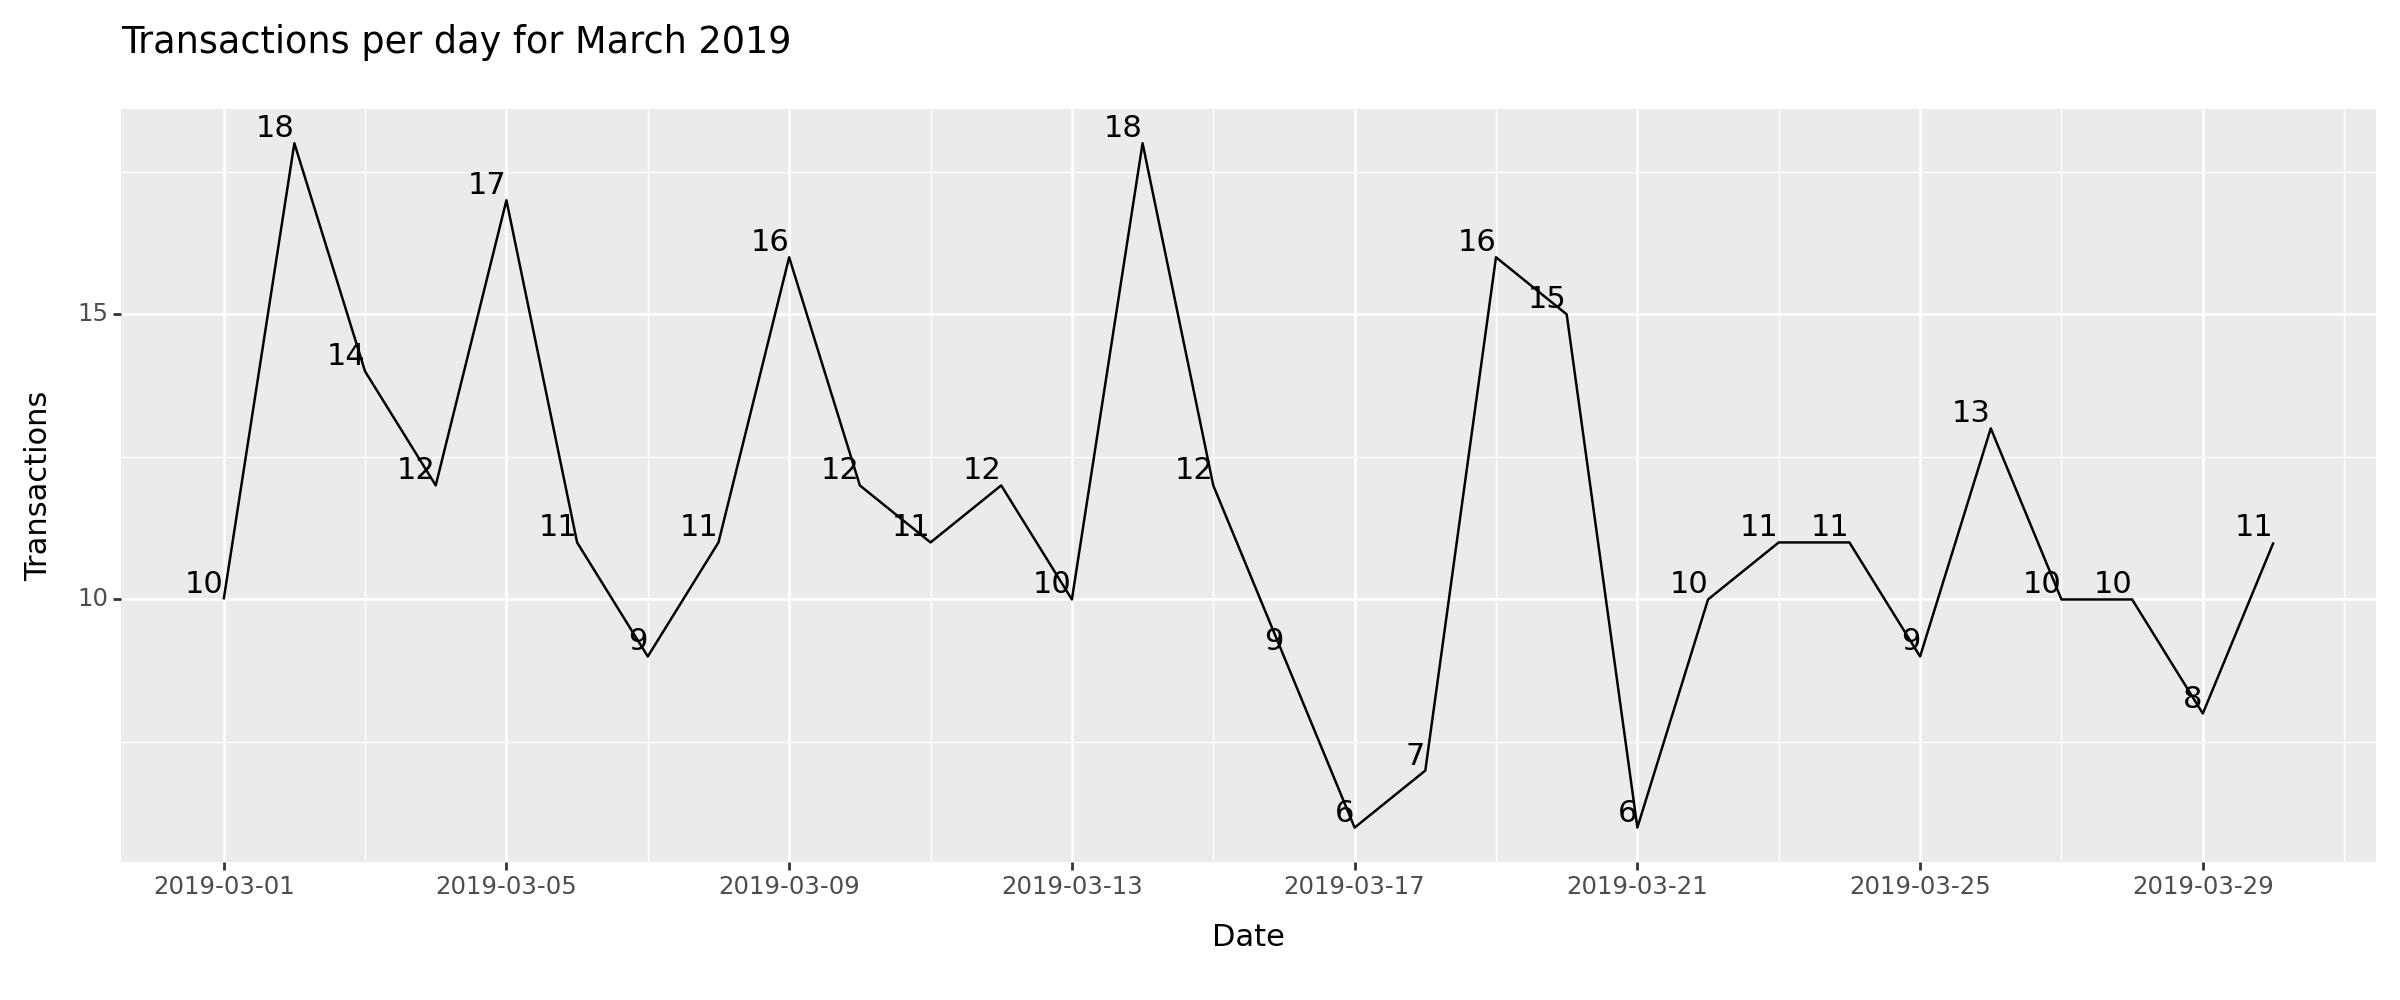

<Figure Size: (1200 x 500)>

In [45]:
(
    ggplot(freq_df.query('month==3'))
    + geom_line(aes(x='Date', y='count'))
    + geom_text(aes(x='Date', y='count', label='count'), ha='right', va='bottom')
    + labs(title='Transactions per day for March 2019')
    + ylab('Transactions')
    + theme(figure_size=(12, 5))
)

## Transactions : Member to normal customer ratio

In [46]:
df.Date = pd.to_datetime(df.Date)
cust_ra = df[['Date', 'month', 'Customer type']].value_counts().reset_index().sort_values(by='Date')

In [47]:
cust_ra = pd.pivot(data=cust_ra, 
                   index=['Date', 'month'], 
                   columns='Customer type', 
                   values='count').reset_index()

In [48]:
cust_ra['ratio'] = round(cust_ra['Member'] / cust_ra['Normal'], 1)

#### January 2019

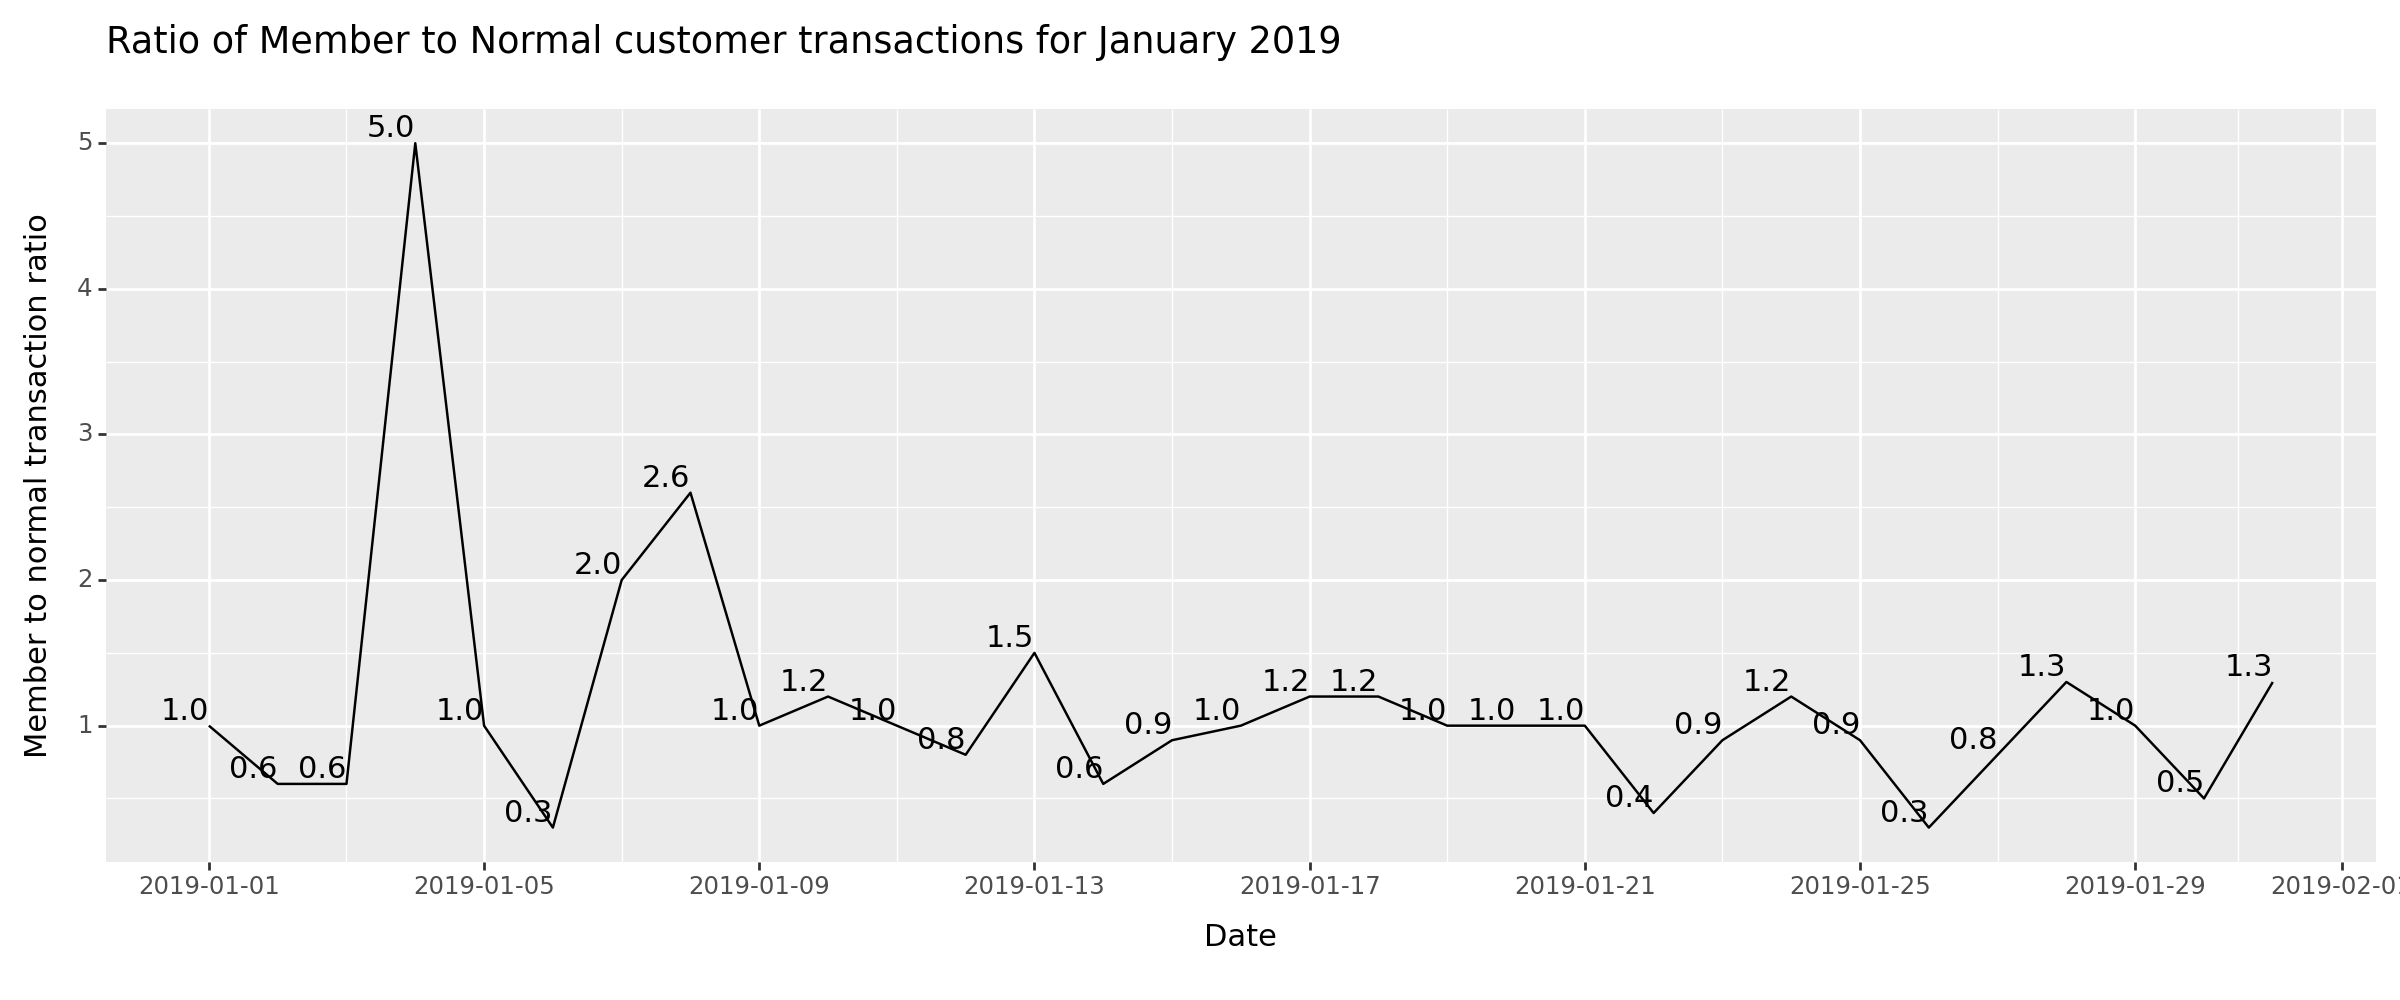

<Figure Size: (1200 x 500)>

In [49]:
(
    ggplot(data=cust_ra.query('month==1'))
    + geom_line(aes(x='Date', y='ratio'))
    + geom_text(aes(x='Date', y='ratio', label='ratio'), ha='right', va='bottom')
    + labs(title='Ratio of Member to Normal customer transactions for January 2019')
    + ylab('Member to normal transaction ratio')
    + theme(figure_size=(12, 5))
)

#### February 2019

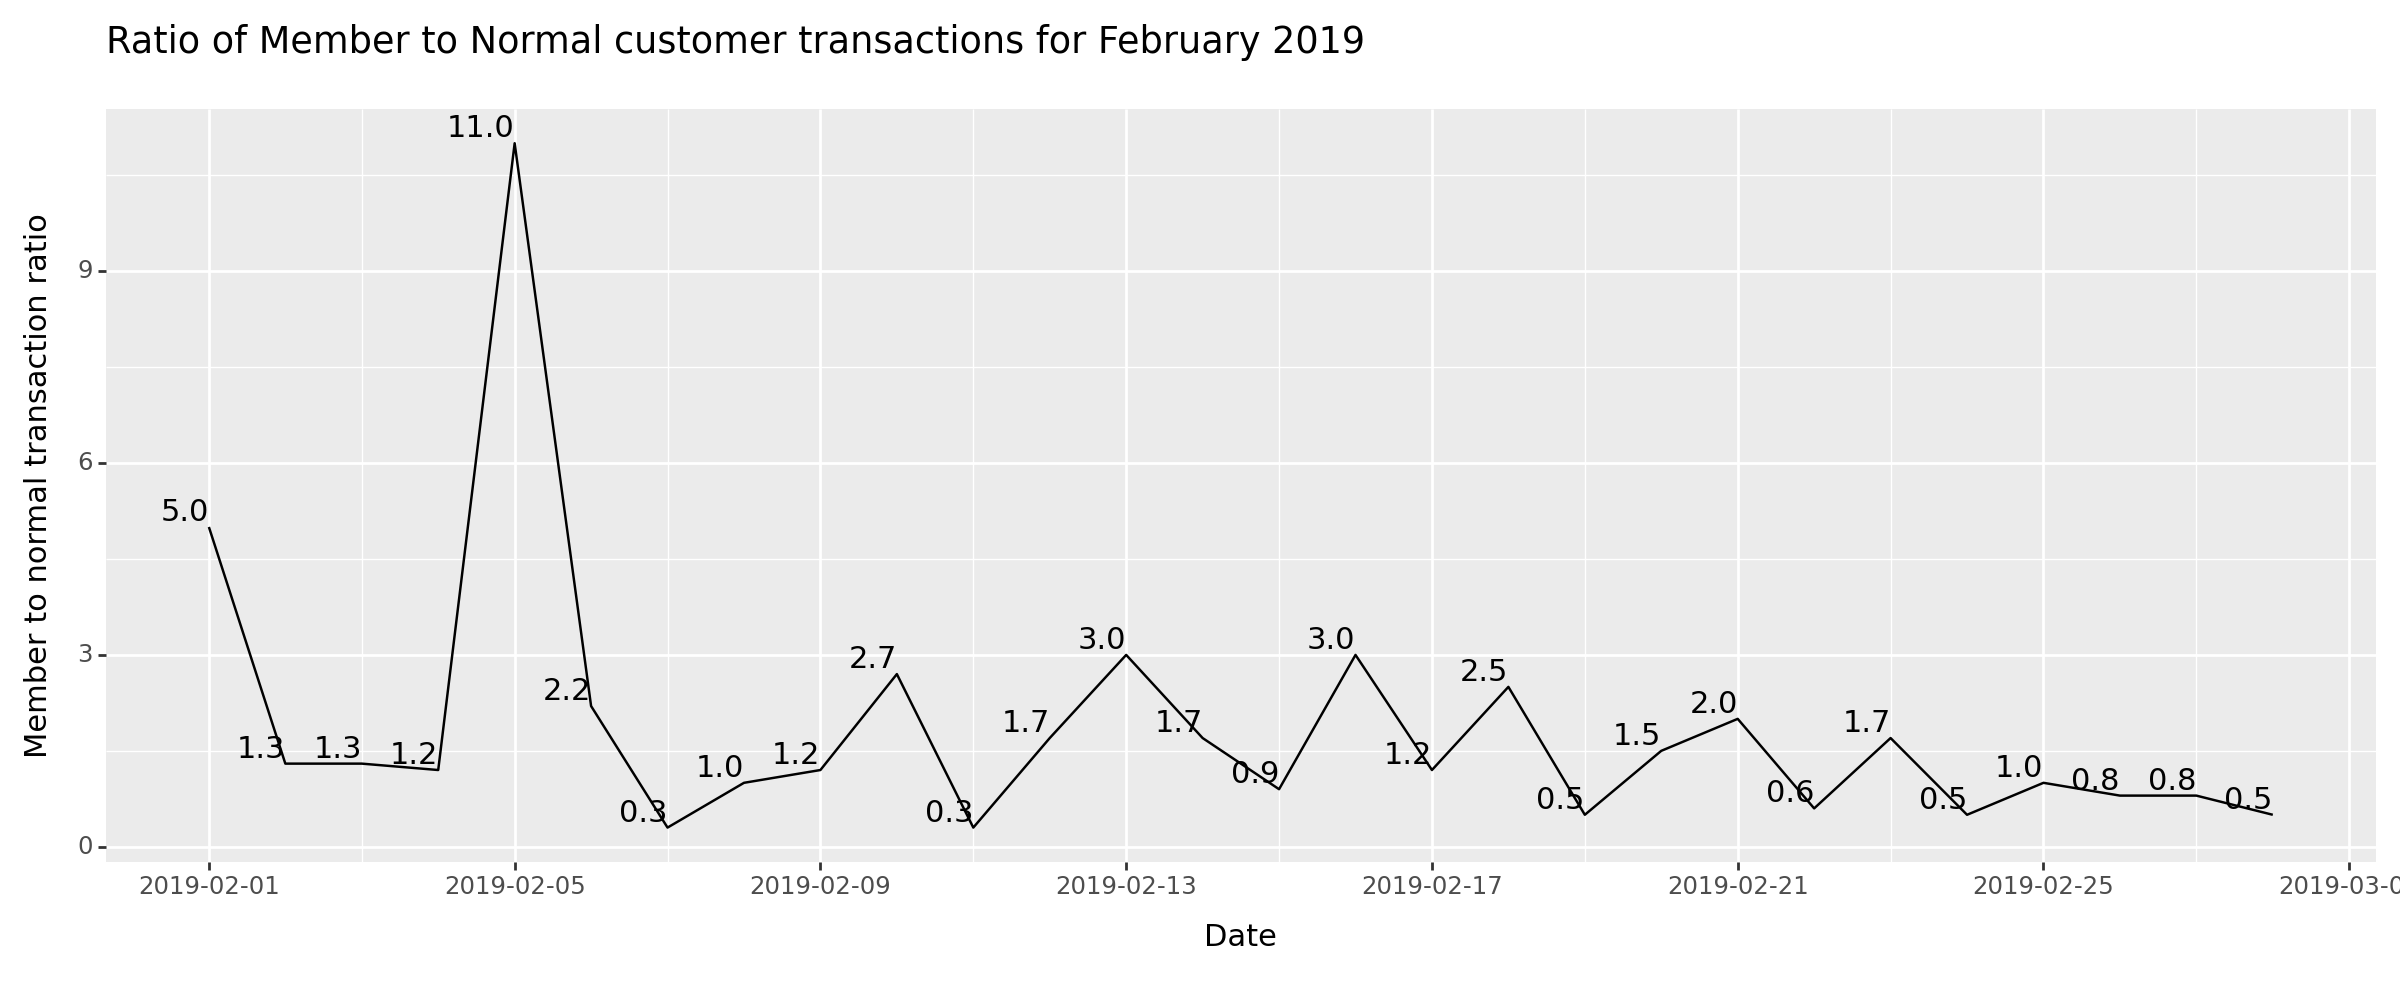

<Figure Size: (1200 x 500)>

In [50]:
(
    ggplot(data=cust_ra.query('month==2'))
    + geom_line(aes(x='Date', y='ratio'))
    + geom_text(aes(x='Date', y='ratio', label='ratio'), ha='right', va='bottom')
    + labs(title='Ratio of Member to Normal customer transactions for February 2019')
    + ylab('Member to normal transaction ratio')
    + theme(figure_size=(12, 5))
)

#### March 2019

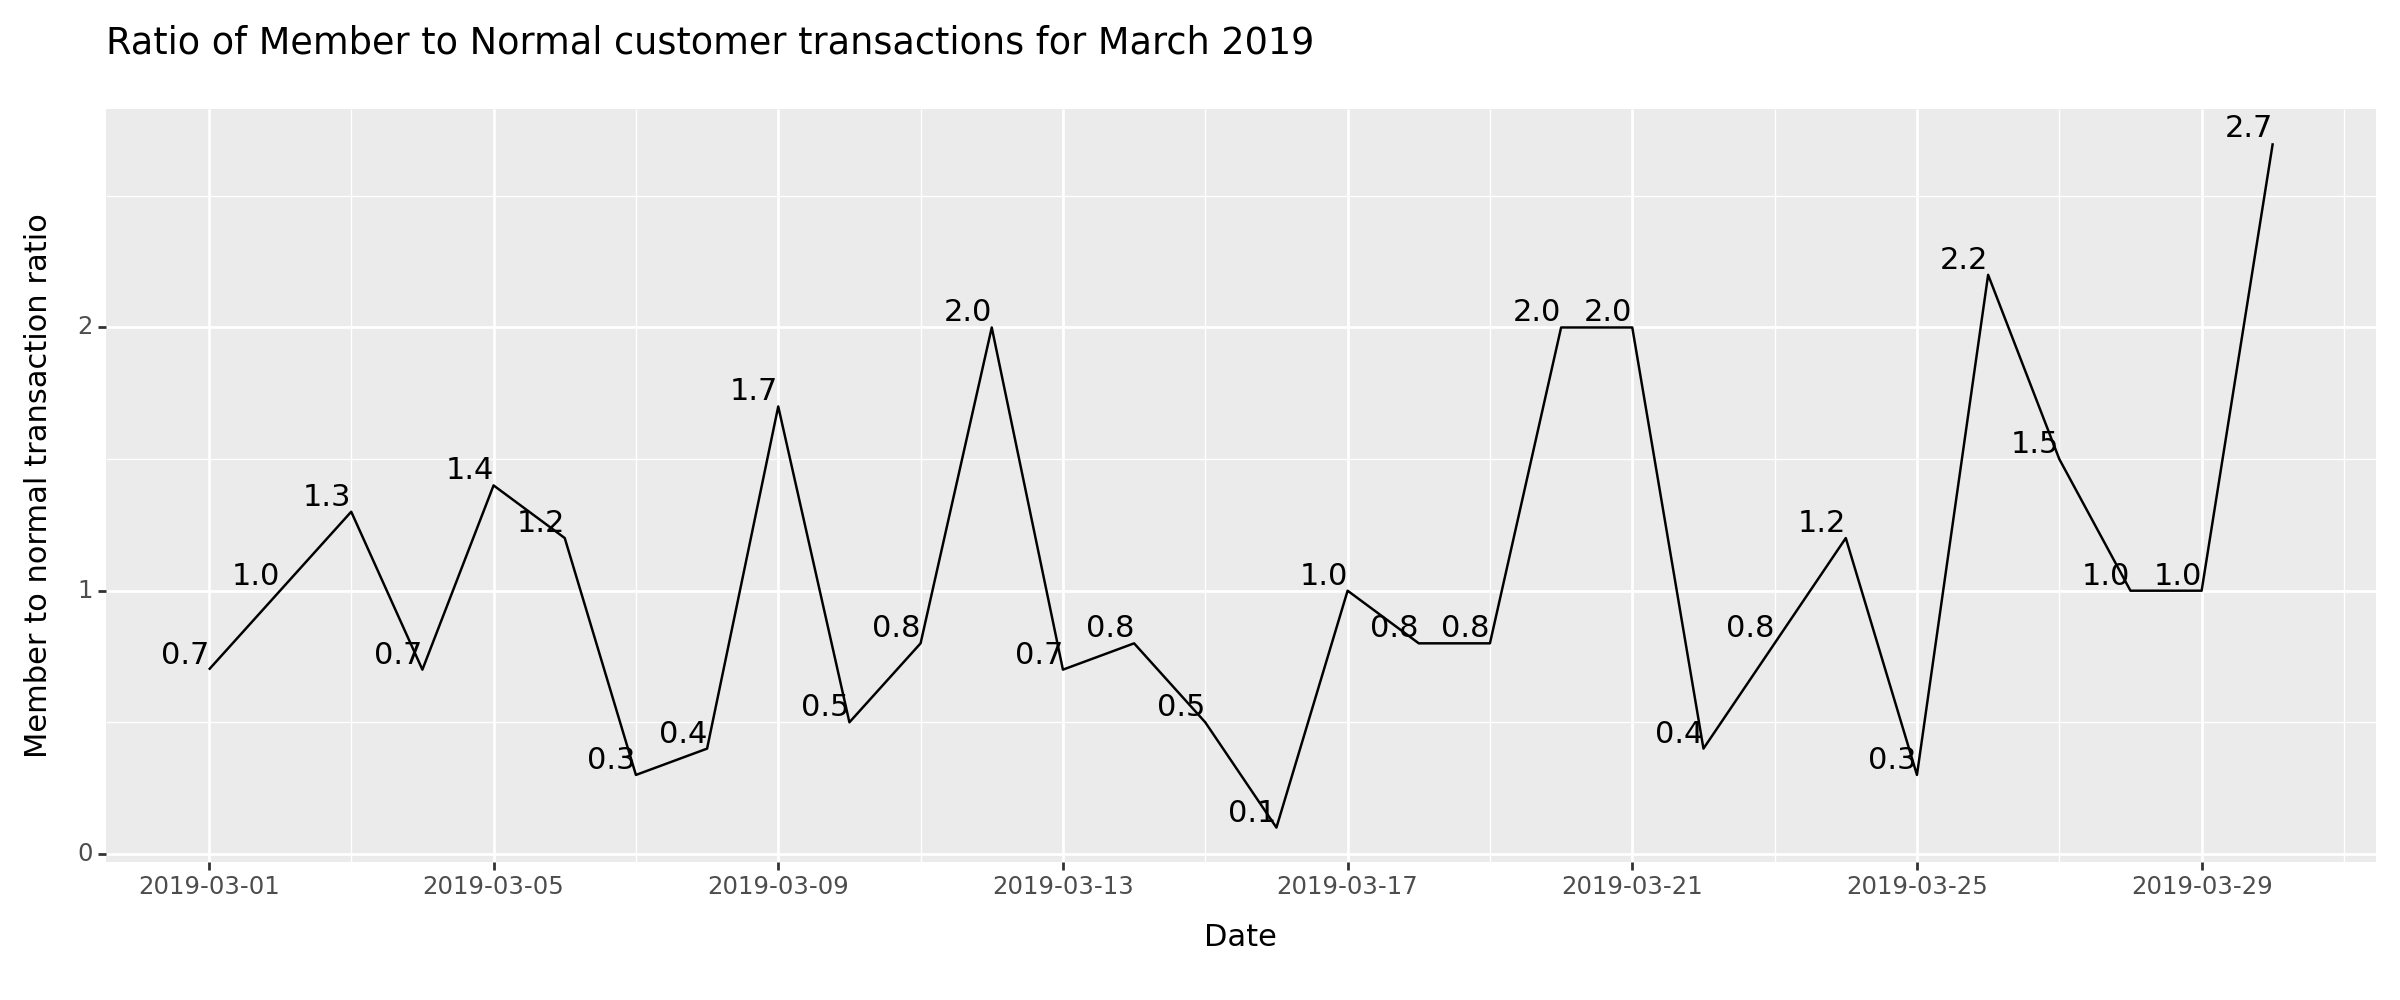

<Figure Size: (1200 x 500)>

In [51]:
(
    ggplot(data=cust_ra.query('month==3'))
    + geom_line(aes(x='Date', y='ratio'))
    + geom_text(aes(x='Date', y='ratio', label='ratio'), ha='right', va='bottom')
    + labs(title='Ratio of Member to Normal customer transactions for March 2019')
    + ylab('Member to normal transaction ratio')
    + theme(figure_size=(12, 5))
)